## Drought mdb - plot

In [1]:
# import things
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cftime
import pandas as pd
import requests
import io

# this is all for plotting...
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap
import cartopy.feature as cfeature
import matplotlib.mlab as mlab
import cartopy.io.shapereader as shapereader
from dask.diagnostics import ProgressBar
import matplotlib
import os

# from matplotlib.offsetbox import AnchoredText

from scipy import stats

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['pdf.fonttype'] = 42 # change font from Arial (used in initial submission) to Helvetica


import sys
# sys.path.append('/Users/nickywright/repos/palaeoclimate-lastmillennium')
# import gmtColormap as gmtColormap

In [2]:
def calculate_cv(ds):
    ds['CV'] = ds.PRECT_mm.std(dim='year') / ds.PRECT_mm.mean(dim='year')
    return ds

In [3]:
# # input_dir = './'
# input_dir = '/Volumes/LaCie/droughts_through_time'


## import bootstrap files

In [3]:
# boots_dir = 'bootstrap_everyyear/mdb'
# bcc_boot_mdb        = xr.open_dataset('%s/%s/bcc_boot_mdb.nc' % (input_dir, boots_dir))
# ccsm4_boot_mdb      = xr.open_dataset('%s/%s/ccsm4_boot_mdb.nc' % (input_dir, boots_dir))
# csiro_mk3l_boot_mdb = xr.open_dataset('%s/%s/csiro_mk3l_boot_mdb.nc' % (input_dir, boots_dir))
# fgoals_gl_boot_mdb  = xr.open_dataset('%s/%s/fgoals_gl_boot_mdb.nc' % (input_dir, boots_dir))
# fgoals_s2_boot_mdb  = xr.open_dataset('%s/%s/fgoals_s2_boot_mdb.nc' % (input_dir, boots_dir))
# giss_21_boot_mdb    = xr.open_dataset('%s/%s/giss_21_boot_mdb.nc' % (input_dir, boots_dir))
# giss_22_boot_mdb    = xr.open_dataset('%s/%s/giss_22_boot_mdb.nc' % (input_dir, boots_dir))
# giss_23_boot_mdb    = xr.open_dataset('%s/%s/giss_23_boot_mdb.nc' % (input_dir, boots_dir))
# giss_24_boot_mdb    = xr.open_dataset('%s/%s/giss_24_boot_mdb.nc' % (input_dir, boots_dir))
# giss_25_boot_mdb    = xr.open_dataset('%s/%s/giss_25_boot_mdb.nc' % (input_dir, boots_dir))
# giss_26_boot_mdb    = xr.open_dataset('%s/%s/giss_26_boot_mdb.nc' % (input_dir, boots_dir))
# giss_27_boot_mdb    = xr.open_dataset('%s/%s/giss_27_boot_mdb.nc' % (input_dir, boots_dir))
# giss_28_boot_mdb    = xr.open_dataset('%s/%s/giss_28_boot_mdb.nc' % (input_dir, boots_dir))
# hadcm3_boot_mdb     = xr.open_dataset('%s/%s/hadcm3_boot_mdb.nc' % (input_dir, boots_dir))
# ipsl_boot_mdb       = xr.open_dataset('%s/%s/ipsl_boot_mdb.nc' % (input_dir, boots_dir))
# miroc_boot_mdb      = xr.open_dataset('%s/%s/miroc_boot_mdb.nc' % (input_dir, boots_dir))
# mpi_boot_mdb        = xr.open_dataset('%s/%s/mpi_boot_mdb.nc' % (input_dir, boots_dir))
# mri_boot_mdb        = xr.open_dataset('%s/%s/mri_boot_mdb.nc' % (input_dir, boots_dir))
# ff2_boot_mdb       = xr.open_dataset('%s/%s/ff2_boot_mdb.nc' % (input_dir, boots_dir))


In [4]:
hist_dir = 'files/historical_1900/mdb'

bcc_precip_hist_mdb        = xr.open_dataset('%s/bcc_precip_hist_annual_mdb.nc' % hist_dir)
ccsm4_precip_hist_mdb      = xr.open_dataset('%s/ccsm4_precip_hist_annual_mdb.nc' % hist_dir)
csiro_mk3l_precip_hist_mdb = xr.open_dataset('%s/csiro_mk3l_precip_hist_annual_mdb.nc' % hist_dir)
fgoals_gl_precip_hist_mdb  = xr.open_dataset('%s/fgoals_gl_precip_hist_annual_mdb.nc' % hist_dir)
fgoals_s2_precip_hist_mdb  = xr.open_dataset('%s/fgoals_s2_precip_hist_annual_mdb.nc' % hist_dir)
giss_21_precip_hist_mdb    = xr.open_dataset('%s/giss_21_precip_hist_annual_mdb.nc' % hist_dir)
giss_22_precip_hist_mdb    = xr.open_dataset('%s/giss_22_precip_hist_annual_mdb.nc' % hist_dir)
giss_23_precip_hist_mdb    = xr.open_dataset('%s/giss_23_precip_hist_annual_mdb.nc' % hist_dir)
giss_24_precip_hist_mdb    = xr.open_dataset('%s/giss_24_precip_hist_annual_mdb.nc' % hist_dir)
giss_25_precip_hist_mdb    = xr.open_dataset('%s/giss_25_precip_hist_annual_mdb.nc' % hist_dir)
giss_26_precip_hist_mdb    = xr.open_dataset('%s/giss_26_precip_hist_annual_mdb.nc' % hist_dir)
giss_27_precip_hist_mdb    = xr.open_dataset('%s/giss_27_precip_hist_annual_mdb.nc' % hist_dir)
giss_28_precip_hist_mdb    = xr.open_dataset('%s/giss_28_precip_hist_annual_mdb.nc' % hist_dir)
hadcm3_precip_hist_mdb     = xr.open_dataset('%s/hadcm3_precip_hist_annual_mdb.nc' % hist_dir)
ipsl_precip_hist_mdb       = xr.open_dataset('%s/ipsl_precip_hist_annual_mdb.nc' % hist_dir)
miroc_precip_hist_mdb      = xr.open_dataset('%s/miroc_precip_hist_annual_mdb.nc' % hist_dir)
mpi_precip_hist_mdb        = xr.open_dataset('%s/mpi_precip_hist_annual_mdb.nc' % hist_dir)
mri_precip_hist_mdb        = xr.open_dataset('%s/mri_precip_hist_annual_mdb.nc' % hist_dir)
ff1_precip_hist_mdb        = xr.open_dataset('%s/cesmlme-ff1_precip_hist_annual_mdb.nc' % hist_dir)
ff2_precip_hist_mdb        = xr.open_dataset('%s/cesmlme-ff2_precip_hist_annual_mdb.nc' % hist_dir)
ff3_precip_hist_mdb        = xr.open_dataset('%s/cesmlme-ff3_precip_hist_annual_mdb.nc' % hist_dir)
ff4_precip_hist_mdb        = xr.open_dataset('%s/cesmlme-ff4_precip_hist_annual_mdb.nc' % hist_dir)
ff5_precip_hist_mdb        = xr.open_dataset('%s/cesmlme-ff5_precip_hist_annual_mdb.nc' % hist_dir)
ff6_precip_hist_mdb        = xr.open_dataset('%s/cesmlme-ff6_precip_hist_annual_mdb.nc' % hist_dir)
ff7_precip_hist_mdb        = xr.open_dataset('%s/cesmlme-ff7_precip_hist_annual_mdb.nc' % hist_dir)
ff8_precip_hist_mdb        = xr.open_dataset('%s/cesmlme-ff8_precip_hist_annual_mdb.nc' % hist_dir)
ff9_precip_hist_mdb        = xr.open_dataset('%s/cesmlme-ff9_precip_hist_annual_mdb.nc' % hist_dir)
ff10_precip_hist_mdb       = xr.open_dataset('%s/cesmlme-ff10_precip_hist_annual_mdb.nc' % hist_dir)
ff11_precip_hist_mdb       = xr.open_dataset('%s/cesmlme-ff11_precip_hist_annual_mdb.nc' % hist_dir)
ff12_precip_hist_mdb       = xr.open_dataset('%s/cesmlme-ff12_precip_hist_annual_mdb.nc' % hist_dir)
ff13_precip_hist_mdb       = xr.open_dataset('%s/cesmlme-ff13_precip_hist_annual_mdb.nc' % hist_dir)
# ff_all_precip_hist_mdb     = xr.open_dataset('%s/cesmlme-ff_all_precip_hist_annual_mdb.nc' % hist_dir)
giss_all_precip_hist_mdb   = xr.open_dataset('%s/giss_all_precip_hist_annual_mdb.nc' % hist_dir)

awap_masked_annual_mdb     = xr.open_dataset('%s/awap_masked_annual_mdb.nc' % hist_dir)

In [5]:
lm_dir = 'files/lastmillennium_threshold_1900-2000/mdb'

bcc_precip_lm_mdb        = xr.open_dataset('%s/bcc_precip_lm_annual_mdb.nc' % lm_dir)
ccsm4_precip_lm_mdb      = xr.open_dataset('%s/ccsm4_precip_lm_annual_mdb.nc' % lm_dir)
csiro_mk3l_precip_lm_mdb = xr.open_dataset('%s/csiro_mk3l_precip_lm_annual_mdb.nc' % lm_dir)
fgoals_gl_precip_lm_mdb  = xr.open_dataset('%s/fgoals_gl_precip_lm_annual_mdb.nc' % lm_dir)
fgoals_s2_precip_lm_mdb  = xr.open_dataset('%s/fgoals_s2_precip_lm_annual_mdb.nc' % lm_dir)
giss_21_precip_lm_mdb    = xr.open_dataset('%s/giss_21_precip_lm_annual_mdb.nc' % lm_dir)
giss_22_precip_lm_mdb    = xr.open_dataset('%s/giss_22_precip_lm_annual_mdb.nc' % lm_dir)
giss_23_precip_lm_mdb    = xr.open_dataset('%s/giss_23_precip_lm_annual_mdb.nc' % lm_dir)
giss_24_precip_lm_mdb    = xr.open_dataset('%s/giss_24_precip_lm_annual_mdb.nc' % lm_dir)
giss_25_precip_lm_mdb    = xr.open_dataset('%s/giss_25_precip_lm_annual_mdb.nc' % lm_dir)
giss_26_precip_lm_mdb    = xr.open_dataset('%s/giss_26_precip_lm_annual_mdb.nc' % lm_dir)
giss_27_precip_lm_mdb    = xr.open_dataset('%s/giss_27_precip_lm_annual_mdb.nc' % lm_dir)
giss_28_precip_lm_mdb    = xr.open_dataset('%s/giss_28_precip_lm_annual_mdb.nc' % lm_dir)
hadcm3_precip_lm_mdb     = xr.open_dataset('%s/hadcm3_precip_lm_annual_mdb.nc' % lm_dir)
ipsl_precip_lm_mdb       = xr.open_dataset('%s/ipsl_precip_lm_annual_mdb.nc' % lm_dir)
miroc_precip_lm_mdb      = xr.open_dataset('%s/miroc_precip_lm_annual_mdb.nc' % lm_dir)
mpi_precip_lm_mdb        = xr.open_dataset('%s/mpi_precip_lm_annual_mdb.nc' % lm_dir)
mri_precip_lm_mdb        = xr.open_dataset('%s/mri_precip_lm_annual_mdb.nc' % lm_dir)
ff1_precip_lm_mdb        = xr.open_dataset('%s/cesmlme-ff1_precip_lm_annual_mdb.nc' % lm_dir)
ff2_precip_lm_mdb        = xr.open_dataset('%s/cesmlme-ff2_precip_lm_annual_mdb.nc' % lm_dir)
ff3_precip_lm_mdb        = xr.open_dataset('%s/cesmlme-ff3_precip_lm_annual_mdb.nc' % lm_dir)
ff4_precip_lm_mdb        = xr.open_dataset('%s/cesmlme-ff4_precip_lm_annual_mdb.nc' % lm_dir)
ff5_precip_lm_mdb        = xr.open_dataset('%s/cesmlme-ff5_precip_lm_annual_mdb.nc' % lm_dir)
ff6_precip_lm_mdb        = xr.open_dataset('%s/cesmlme-ff6_precip_lm_annual_mdb.nc' % lm_dir)
ff7_precip_lm_mdb        = xr.open_dataset('%s/cesmlme-ff7_precip_lm_annual_mdb.nc' % lm_dir)
ff8_precip_lm_mdb        = xr.open_dataset('%s/cesmlme-ff8_precip_lm_annual_mdb.nc' % lm_dir)
ff9_precip_lm_mdb        = xr.open_dataset('%s/cesmlme-ff9_precip_lm_annual_mdb.nc' % lm_dir)
ff10_precip_lm_mdb       = xr.open_dataset('%s/cesmlme-ff10_precip_lm_annual_mdb.nc' % lm_dir)
ff11_precip_lm_mdb       = xr.open_dataset('%s/cesmlme-ff11_precip_lm_annual_mdb.nc' % lm_dir)
ff12_precip_lm_mdb       = xr.open_dataset('%s/cesmlme-ff12_precip_lm_annual_mdb.nc' % lm_dir)
ff13_precip_lm_mdb       = xr.open_dataset('%s/cesmlme-ff13_precip_lm_annual_mdb.nc' % lm_dir)

#giss_all_precip_lm_southern_aus    = xr.open_dataset('%s/%s/giss_all_precip_lm_annual_southern_aus.nc' % (input_dir, lm_dir))
#ff_all_precip_lm_southern_aus      = xr.open_dataset('%s/%s/ff_all_precip_lm_annual_southern_aus.nc' % (input_dir, lm_dir))

In [10]:
cntl_dir = 'files/control/mdb'

bcc_cntl_mdb        = xr.open_dataset('%s/bcc_annual_cntl_mdb.nc' % cntl_dir)
ccsm4_cntl_mdb      = xr.open_dataset('%s/ccsm4_annual_cntl_mdb.nc' % cntl_dir)
csiro_mk3l_cntl_mdb = xr.open_dataset('%s/csiro_mk3l_annual_cntl_mdb.nc' % cntl_dir)
fgoals_s2_cntl_mdb  = xr.open_dataset('%s/fgoals_s2_annual_cntl_mdb.nc' % cntl_dir)
giss_1_cntl_mdb     = xr.open_dataset('%s/giss_1_annual_cntl_mdb.nc' % cntl_dir)
giss_2_cntl_mdb     = xr.open_dataset('%s/giss_2_annual_cntl_mdb.nc' % cntl_dir)
giss_3_cntl_mdb     = xr.open_dataset('%s/giss_3_annual_cntl_mdb.nc' % cntl_dir)
giss_41_cntl_mdb     = xr.open_dataset('%s/giss_41_annual_cntl_mdb.nc' % cntl_dir)
hadcm3_cntl_mdb     = xr.open_dataset('%s/hadcm3_annual_cntl_mdb.nc' % cntl_dir)
ipsl_cntl_mdb       = xr.open_dataset('%s/ipsl_annual_cntl_mdb.nc' % cntl_dir)
miroc_cntl_mdb      = xr.open_dataset('%s/miroc_annual_cntl_mdb.nc' % cntl_dir)
mpi_cntl_mdb        = xr.open_dataset('%s/mpi_annual_cntl_mdb.nc' % cntl_dir)
mri_cntl_mdb        = xr.open_dataset('%s/mri_annual_cntl_mdb.nc' % cntl_dir)
cesmlme_cntl_mdb    = xr.open_dataset('%s/cesmlme_annual_cntl_mdb.nc' % cntl_dir)

In [9]:
calculate_cv(bcc_precip_hist_mdb)       
calculate_cv(ccsm4_precip_hist_mdb)     
calculate_cv(csiro_mk3l_precip_hist_mdb)
calculate_cv(fgoals_gl_precip_hist_mdb) 
calculate_cv(fgoals_s2_precip_hist_mdb) 
calculate_cv(giss_21_precip_hist_mdb)   
calculate_cv(giss_22_precip_hist_mdb)   
calculate_cv(giss_23_precip_hist_mdb)   
calculate_cv(giss_24_precip_hist_mdb)   
calculate_cv(giss_25_precip_hist_mdb)   
calculate_cv(giss_26_precip_hist_mdb)   
calculate_cv(giss_27_precip_hist_mdb)   
calculate_cv(giss_28_precip_hist_mdb)   
calculate_cv(hadcm3_precip_hist_mdb)    
calculate_cv(ipsl_precip_hist_mdb)      
calculate_cv(miroc_precip_hist_mdb)     
calculate_cv(mpi_precip_hist_mdb)       
calculate_cv(mri_precip_hist_mdb)       
calculate_cv(ff1_precip_hist_mdb)       
calculate_cv(ff2_precip_hist_mdb)       
calculate_cv(ff3_precip_hist_mdb)       
calculate_cv(ff4_precip_hist_mdb)       
calculate_cv(ff5_precip_hist_mdb)       
calculate_cv(ff6_precip_hist_mdb)       
calculate_cv(ff7_precip_hist_mdb)       
calculate_cv(ff8_precip_hist_mdb)       
calculate_cv(ff9_precip_hist_mdb)       
calculate_cv(ff10_precip_hist_mdb)      
calculate_cv(ff11_precip_hist_mdb)      
calculate_cv(ff12_precip_hist_mdb)      
calculate_cv(ff13_precip_hist_mdb)      
# calculate_cv(ff_all_precip_hist_mdb)    
calculate_cv(giss_all_precip_hist_mdb)  
calculate_cv(awap_masked_annual_mdb)    

calculate_cv(bcc_precip_lm_mdb)       
calculate_cv(ccsm4_precip_lm_mdb)     
calculate_cv(csiro_mk3l_precip_lm_mdb)
calculate_cv(fgoals_gl_precip_lm_mdb) 
calculate_cv(fgoals_s2_precip_lm_mdb) 
calculate_cv(giss_21_precip_lm_mdb)  
calculate_cv(giss_22_precip_lm_mdb)  
calculate_cv(giss_23_precip_lm_mdb)  
calculate_cv(giss_24_precip_lm_mdb)  
calculate_cv(giss_25_precip_lm_mdb)  
calculate_cv(giss_26_precip_lm_mdb)  
calculate_cv(giss_27_precip_lm_mdb)  
calculate_cv(giss_28_precip_lm_mdb)  
calculate_cv(hadcm3_precip_lm_mdb)    
calculate_cv(ipsl_precip_lm_mdb)      
calculate_cv(miroc_precip_lm_mdb)     
calculate_cv(mpi_precip_lm_mdb)       
calculate_cv(mri_precip_lm_mdb)       
calculate_cv(ff1_precip_lm_mdb)       
calculate_cv(ff2_precip_lm_mdb)       
calculate_cv(ff3_precip_lm_mdb)       
calculate_cv(ff4_precip_lm_mdb)       
calculate_cv(ff5_precip_lm_mdb)       
calculate_cv(ff6_precip_lm_mdb)       
calculate_cv(ff7_precip_lm_mdb)       
calculate_cv(ff8_precip_lm_mdb)       
calculate_cv(ff9_precip_lm_mdb)       
calculate_cv(ff10_precip_lm_mdb)      
calculate_cv(ff11_precip_lm_mdb)      
calculate_cv(ff12_precip_lm_mdb)      
calculate_cv(ff13_precip_lm_mdb)      

<xarray.Dataset>
Dimensions:                           (year: 1151)
Coordinates:
  * year                              (year) int64 850 851 852 ... 1999 2000
    quantile                          float64 ...
Data variables: (12/42)
    PRECT_mm                          (year) float64 471.8 492.4 ... 517.3
    drought_years_2s2e                (year) int64 ...
    drought_years_median              (year) float64 ...
    drought_years_20perc              (year) float64 ...
    drought_years_120pc_2med          (year) int64 ...
    drought_years_220pc_1med          (year) int64 ...
    ...                                ...
    droughts_2s2e_severity            (year) float64 ...
    droughts_median_severity          (year) float64 ...
    droughts_20perc_severity          (year) float64 ...
    droughts_120pc_2med_severity      (year) float64 ...
    droughts_220pc_1med_severity      (year) float64 ...
    CV                                float64 0.2256

In [11]:
calculate_cv(bcc_cntl_mdb) 
calculate_cv(ccsm4_cntl_mdb)
calculate_cv(csiro_mk3l_cntl_mdb)
calculate_cv(fgoals_s2_cntl_mdb)  
calculate_cv(giss_1_cntl_mdb)
calculate_cv(giss_2_cntl_mdb)
calculate_cv(giss_3_cntl_mdb)
calculate_cv(giss_41_cntl_mdb)
calculate_cv(hadcm3_cntl_mdb)
calculate_cv(ipsl_cntl_mdb)
calculate_cv(miroc_cntl_mdb)
calculate_cv(mpi_cntl_mdb)
calculate_cv(mri_cntl_mdb)
calculate_cv(cesmlme_cntl_mdb)

<xarray.Dataset>
Dimensions:                           (year: 1156)
Coordinates:
  * year                              (year) int64 850 851 852 ... 2004 2005
    quantile                          float64 ...
Data variables: (12/42)
    PRECT_mm                          (year) float64 493.0 783.7 ... 438.6 676.9
    drought_years_2s2e                (year) int64 ...
    drought_years_median              (year) float64 ...
    drought_years_20perc              (year) float64 ...
    drought_years_120pc_2med          (year) int64 ...
    drought_years_220pc_1med          (year) int64 ...
    ...                                ...
    droughts_2s2e_severity            (year) float64 ...
    droughts_median_severity          (year) float64 ...
    droughts_20perc_severity          (year) float64 ...
    droughts_120pc_2med_severity      (year) float64 ...
    droughts_220pc_1med_severity      (year) float64 ...
    CV                                float64 0.2223

In [12]:
def mean_intensity_severity_percentage(ds, threshold_start, threshold_end):
    ds_clim = ds.where((ds['year'] >= threshold_start) & (ds['year'] <= threshold_end), drop=True)
#     ds_clim = ds.where((ds.year >= threshold_start and ds.year < threshold_end), drop=True)
    ds['droughts_2s2e_intensity_pc'] = ds.droughts_2s2e_intensity / ds_clim.PRECT_mm.mean(dim='year')
    ds['droughts_2s2e_intensity_pc_mean'] = ds.droughts_2s2e_intensity_pc.mean(dim='year') * -100
    ds['droughts_2s2e_severity_pc'] = ds.droughts_2s2e_severity / ds_clim.PRECT_mm.mean(dim='year')
    ds['droughts_2s2e_severity_pc_mean'] = ds.droughts_2s2e_severity_pc.mean(dim='year') * -100

    ds['droughts_median_intensity_pc'] = ds.droughts_median_intensity / ds_clim.PRECT_mm.mean(dim='year')
    ds['droughts_median_intensity_pc_mean'] = ds.droughts_median_intensity_pc.mean(dim='year') * -100
    ds['droughts_median_severity_pc'] = ds.droughts_median_severity / ds_clim.PRECT_mm.mean(dim='year')
    ds['droughts_median_severity_pc_mean'] = ds.droughts_median_severity_pc.mean(dim='year') * -100
    
    ds['droughts_20perc_intensity_pc'] = ds.droughts_20perc_intensity / ds_clim.PRECT_mm.mean(dim='year')
    ds['droughts_20perc_intensity_pc_mean'] = ds.droughts_20perc_intensity_pc.mean(dim='year') * -100
    ds['droughts_20perc_severity_pc'] = ds.droughts_20perc_severity / ds_clim.PRECT_mm.mean(dim='year')
    ds['droughts_20perc_severity_pc_mean'] = ds.droughts_20perc_severity_pc.mean(dim='year') * -100
    
    ds['droughts_120pc_2med_intensity_pc'] = ds.droughts_120pc_2med_intensity / ds_clim.PRECT_mm.mean(dim='year')
    ds['droughts_120pc_2med_intensity_pc_mean'] = ds.droughts_120pc_2med_intensity_pc.mean(dim='year') * -100
    ds['droughts_120pc_2med_severity_pc'] = ds.droughts_120pc_2med_severity / ds_clim.PRECT_mm.mean(dim='year')
    ds['droughts_120pc_2med_severity_pc_mean'] = ds.droughts_120pc_2med_severity_pc.mean(dim='year') * -100
    
    ds['droughts_220pc_1med_intensity_pc'] = ds.droughts_220pc_1med_intensity / ds_clim.PRECT_mm.mean(dim='year')
    ds['droughts_220pc_1med_intensity_pc_mean'] = ds.droughts_220pc_1med_intensity_pc.mean(dim='year') * -100
    ds['droughts_220pc_1med_severity_pc'] = ds.droughts_220pc_1med_severity / ds_clim.PRECT_mm.mean(dim='year')
    ds['droughts_220pc_1med_severity_pc_mean'] = ds.droughts_220pc_1med_severity_pc.mean(dim='year') * -100

In [13]:
mean_intensity_severity_percentage(bcc_precip_hist_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ccsm4_precip_hist_mdb, 1900, 2000)     
mean_intensity_severity_percentage(csiro_mk3l_precip_hist_mdb, 1900, 2000)
mean_intensity_severity_percentage(fgoals_gl_precip_hist_mdb, 1900, 2000) 
mean_intensity_severity_percentage(fgoals_s2_precip_hist_mdb, 1900, 2000) 
mean_intensity_severity_percentage(giss_21_precip_hist_mdb, 1900, 2000)   
mean_intensity_severity_percentage(giss_22_precip_hist_mdb, 1900, 2000)   
mean_intensity_severity_percentage(giss_23_precip_hist_mdb, 1900, 2000)   
mean_intensity_severity_percentage(giss_24_precip_hist_mdb, 1900, 2000)   
mean_intensity_severity_percentage(giss_25_precip_hist_mdb, 1900, 2000)   
mean_intensity_severity_percentage(giss_26_precip_hist_mdb, 1900, 2000)   
mean_intensity_severity_percentage(giss_27_precip_hist_mdb, 1900, 2000)   
mean_intensity_severity_percentage(giss_28_precip_hist_mdb, 1900, 2000)   
mean_intensity_severity_percentage(hadcm3_precip_hist_mdb, 1900, 2000)    
mean_intensity_severity_percentage(ipsl_precip_hist_mdb, 1900, 2000)      
mean_intensity_severity_percentage(miroc_precip_hist_mdb, 1900, 2000)     
mean_intensity_severity_percentage(mpi_precip_hist_mdb, 1900, 2000)       
mean_intensity_severity_percentage(mri_precip_hist_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff1_precip_hist_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff2_precip_hist_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff3_precip_hist_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff4_precip_hist_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff5_precip_hist_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff6_precip_hist_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff7_precip_hist_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff8_precip_hist_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff9_precip_hist_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff10_precip_hist_mdb, 1900, 2000)      
mean_intensity_severity_percentage(ff11_precip_hist_mdb, 1900, 2000)      
mean_intensity_severity_percentage(ff12_precip_hist_mdb, 1900, 2000)      
mean_intensity_severity_percentage(ff13_precip_hist_mdb, 1900, 2000)      
# mean_intensity_severity_percentage(ff_all_precip_hist_mdb, 1900, 2000)    
mean_intensity_severity_percentage(giss_all_precip_hist_mdb, 1900, 2000)  
mean_intensity_severity_percentage(awap_masked_annual_mdb, 1900, 2000)    

mean_intensity_severity_percentage(bcc_precip_lm_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ccsm4_precip_lm_mdb, 1900, 2000)     
mean_intensity_severity_percentage(csiro_mk3l_precip_lm_mdb, 1900, 2000)
mean_intensity_severity_percentage(fgoals_gl_precip_lm_mdb, 1900, 2000) 
mean_intensity_severity_percentage(fgoals_s2_precip_lm_mdb, 1900, 2000) 
mean_intensity_severity_percentage(giss_21_precip_lm_mdb, 1900, 2000)  
mean_intensity_severity_percentage(giss_22_precip_lm_mdb, 1900, 2000)  
mean_intensity_severity_percentage(giss_23_precip_lm_mdb, 1900, 2000)  
mean_intensity_severity_percentage(giss_24_precip_lm_mdb, 1900, 2000)  
mean_intensity_severity_percentage(giss_25_precip_lm_mdb, 1900, 2000)  
mean_intensity_severity_percentage(giss_26_precip_lm_mdb, 1900, 2000)  
mean_intensity_severity_percentage(giss_27_precip_lm_mdb, 1900, 2000)  
mean_intensity_severity_percentage(giss_28_precip_lm_mdb, 1900, 2000)  
mean_intensity_severity_percentage(hadcm3_precip_lm_mdb, 1900, 2000)    
mean_intensity_severity_percentage(ipsl_precip_lm_mdb, 1900, 2000)      
mean_intensity_severity_percentage(miroc_precip_lm_mdb, 1900, 2000)     
mean_intensity_severity_percentage(mpi_precip_lm_mdb, 1900, 2000)       
mean_intensity_severity_percentage(mri_precip_lm_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff1_precip_lm_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff2_precip_lm_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff3_precip_lm_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff4_precip_lm_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff5_precip_lm_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff6_precip_lm_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff7_precip_lm_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff8_precip_lm_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff9_precip_lm_mdb, 1900, 2000)       
mean_intensity_severity_percentage(ff10_precip_lm_mdb, 1900, 2000)      
mean_intensity_severity_percentage(ff11_precip_lm_mdb, 1900, 2000)      
mean_intensity_severity_percentage(ff12_precip_lm_mdb, 1900, 2000)      
mean_intensity_severity_percentage(ff13_precip_lm_mdb, 1900, 2000)      


mean_intensity_severity_percentage(bcc_cntl_mdb       , bcc_cntl_mdb.year[0], bcc_cntl_mdb.year[-1])
mean_intensity_severity_percentage(ccsm4_cntl_mdb     , ccsm4_cntl_mdb.year[0], ccsm4_cntl_mdb.year[-1])
mean_intensity_severity_percentage(csiro_mk3l_cntl_mdb, csiro_mk3l_cntl_mdb.year[0], csiro_mk3l_cntl_mdb.year[-1]) 
mean_intensity_severity_percentage(fgoals_s2_cntl_mdb , fgoals_s2_cntl_mdb.year[0], fgoals_s2_cntl_mdb.year[-1]) 
mean_intensity_severity_percentage(giss_1_cntl_mdb    , giss_1_cntl_mdb.year[0], giss_1_cntl_mdb.year[-1])
mean_intensity_severity_percentage(giss_2_cntl_mdb    , giss_2_cntl_mdb.year[0], giss_2_cntl_mdb.year[-1])
mean_intensity_severity_percentage(giss_3_cntl_mdb    , giss_3_cntl_mdb.year[0], giss_3_cntl_mdb.year[-1])
mean_intensity_severity_percentage(giss_41_cntl_mdb   , giss_41_cntl_mdb.year[0], giss_41_cntl_mdb.year[-1])
mean_intensity_severity_percentage(hadcm3_cntl_mdb    , hadcm3_cntl_mdb.year[0], hadcm3_cntl_mdb.year[-1]) 
mean_intensity_severity_percentage(ipsl_cntl_mdb      , ipsl_cntl_mdb.year[0], ipsl_cntl_mdb.year[-1]) 
mean_intensity_severity_percentage(miroc_cntl_mdb     , miroc_cntl_mdb.year[0], miroc_cntl_mdb.year[-1]) 
mean_intensity_severity_percentage(mpi_cntl_mdb       , mpi_cntl_mdb.year[0], mpi_cntl_mdb.year[-1]) 
mean_intensity_severity_percentage(mri_cntl_mdb       , mri_cntl_mdb.year[0], mri_cntl_mdb.year[-1]) 
mean_intensity_severity_percentage(cesmlme_cntl_mdb   , cesmlme_cntl_mdb.year[0], cesmlme_cntl_mdb.year[-1])

In [14]:
def process_lm_files_pre1850(ds):
    ds_pre1850 = ds.where(ds.year < 1850, drop=True)
    ds_pre1850['droughts_2s2e_max'] = ds_pre1850.droughts_2s2e.max(dim='year', skipna=True)
    ds_pre1850['droughts_2s2e_mean'] = ds_pre1850.droughts_2s2e.mean(dim='year', skipna=True)
    ds_pre1850['droughts_2s2e_std'] = ds_pre1850.droughts_2s2e.std(dim='year', skipna=True)
    ds_pre1850['droughts_2s2e_intensity_pc_mean'] = ds_pre1850.droughts_2s2e_intensity_pc.mean(dim='year') * -100
    ds_pre1850['droughts_2s2e_severity_pc_mean'] = ds_pre1850.droughts_2s2e_severity_pc.mean(dim='year') * -100
    ds_pre1850['CV'] = ds_pre1850.PRECT_mm.std(dim='year') / ds_pre1850.PRECT_mm.mean(dim='year')
    ds_pre1850['droughts_2s2e_no_of_events'] = np.count_nonzero(~np.isnan(ds_pre1850.droughts_2s2e))
    ds_pre1850['droughts_2s2e_no_events_100yrs'] = (ds_pre1850.droughts_2s2e_no_of_events / len(ds_pre1850.year)) * 100
    ds_pre1850['droughts_2s2e_sum_100yrs'] = (ds_pre1850.drought_years_2s2e.sum(dim='year') / len(ds_pre1850.year)) * 100
    return ds_pre1850

In [15]:
bcc_precip_lm_mdb_pre1850         = process_lm_files_pre1850(bcc_precip_lm_mdb)       
ccsm4_precip_lm_mdb_pre1850       = process_lm_files_pre1850(ccsm4_precip_lm_mdb)     
csiro_mk3l_precip_lm_mdb_pre1850  = process_lm_files_pre1850(csiro_mk3l_precip_lm_mdb)
fgoals_gl_precip_lm_mdb_pre1850   = process_lm_files_pre1850(fgoals_gl_precip_lm_mdb) 
fgoals_s2_precip_lm_mdb_pre1850   = process_lm_files_pre1850(fgoals_s2_precip_lm_mdb) 
giss_21_precip_lm_mdb_pre1850     = process_lm_files_pre1850(giss_21_precip_lm_mdb)  
giss_22_precip_lm_mdb_pre1850     = process_lm_files_pre1850(giss_22_precip_lm_mdb)  
giss_23_precip_lm_mdb_pre1850     = process_lm_files_pre1850(giss_23_precip_lm_mdb)  
giss_24_precip_lm_mdb_pre1850     = process_lm_files_pre1850(giss_24_precip_lm_mdb)  
giss_25_precip_lm_mdb_pre1850     = process_lm_files_pre1850(giss_25_precip_lm_mdb)  
giss_26_precip_lm_mdb_pre1850     = process_lm_files_pre1850(giss_26_precip_lm_mdb)  
giss_27_precip_lm_mdb_pre1850     = process_lm_files_pre1850(giss_27_precip_lm_mdb)  
giss_28_precip_lm_mdb_pre1850     = process_lm_files_pre1850(giss_28_precip_lm_mdb)  
hadcm3_precip_lm_mdb_pre1850      = process_lm_files_pre1850(hadcm3_precip_lm_mdb)    
ipsl_precip_lm_mdb_pre1850        = process_lm_files_pre1850(ipsl_precip_lm_mdb)      
miroc_precip_lm_mdb_pre1850       = process_lm_files_pre1850(miroc_precip_lm_mdb)     
mpi_precip_lm_mdb_pre1850         = process_lm_files_pre1850(mpi_precip_lm_mdb)       
mri_precip_lm_mdb_pre1850         = process_lm_files_pre1850(mri_precip_lm_mdb)       
ff1_precip_lm_mdb_pre1850         = process_lm_files_pre1850(ff1_precip_lm_mdb)       
ff2_precip_lm_mdb_pre1850         = process_lm_files_pre1850(ff2_precip_lm_mdb)       
ff3_precip_lm_mdb_pre1850         = process_lm_files_pre1850(ff3_precip_lm_mdb)       
ff4_precip_lm_mdb_pre1850         = process_lm_files_pre1850(ff4_precip_lm_mdb)       
ff5_precip_lm_mdb_pre1850         = process_lm_files_pre1850(ff5_precip_lm_mdb)       
ff6_precip_lm_mdb_pre1850         = process_lm_files_pre1850(ff6_precip_lm_mdb)       
ff7_precip_lm_mdb_pre1850         = process_lm_files_pre1850(ff7_precip_lm_mdb)       
ff8_precip_lm_mdb_pre1850         = process_lm_files_pre1850(ff8_precip_lm_mdb)       
ff9_precip_lm_mdb_pre1850         = process_lm_files_pre1850(ff9_precip_lm_mdb)       
ff10_precip_lm_mdb_pre1850        = process_lm_files_pre1850(ff10_precip_lm_mdb)      
ff11_precip_lm_mdb_pre1850        = process_lm_files_pre1850(ff11_precip_lm_mdb)      
ff12_precip_lm_mdb_pre1850        = process_lm_files_pre1850(ff12_precip_lm_mdb)      
ff13_precip_lm_mdb_pre1850        = process_lm_files_pre1850(ff13_precip_lm_mdb) 

In [12]:
# ar1_101 = xr.open_dataset('%s/ar1/ar1_N101_merged.nc' % input_dir)
# ar1_101.load()

# ar1_101_n1   = ar1_101.where(ar1_101.theta == -1, drop=True)
# ar1_101_n075 = ar1_101.where(ar1_101.theta == -0.75, drop=True)
# ar1_101_n05  = ar1_101.where(ar1_101.theta == -0.5, drop=True)
# ar1_101_n025 = ar1_101.where(ar1_101.theta == -0.25, drop=True)
# ar1_101_0    = ar1_101.where(ar1_101.theta == 0, drop=True)
# ar1_101_025  = ar1_101.where(ar1_101.theta == 0.25, drop=True)
# ar1_101_05   = ar1_101.where(ar1_101.theta == 0.5, drop=True)
# ar1_101_075  = ar1_101.where(ar1_101.theta == 0.75, drop=True)
# ar1_101_1    = ar1_101.where(ar1_101.theta == 1, drop=True)

In [14]:
# ar1_101 = xr.open_dataset('%s/ar1/ar1_N101_v2.nc' % input_dir)
# ar1_101.load()

# ar1_101_n1   = ar1_101.where(ar1_101.theta == -1, drop=True)
# ar1_101_n075 = ar1_101.where(ar1_101.theta == -0.75, drop=True)
# ar1_101_n05  = ar1_101.where(ar1_101.theta == -0.5, drop=True)
# ar1_101_n025 = ar1_101.where(ar1_101.theta == -0.25, drop=True)
# ar1_101_0    = ar1_101.where(ar1_101.theta == 0, drop=True)
# ar1_101_025  = ar1_101.where(ar1_101.theta == 0.25, drop=True)
# ar1_101_05   = ar1_101.where(ar1_101.theta == 0.5, drop=True)
# ar1_101_075  = ar1_101.where(ar1_101.theta == 0.75, drop=True)
# ar1_101_1    = ar1_101.where(ar1_101.theta == 1, drop=True)

In [13]:
# # #southern aus awap lag1:  0.07527482519616015
# # #se aus awap lag 1:  -0.004531114612457832
# # #northern aus awap lag 1:  0.298476436572031
# # #mdb awap lag 1:  0.002106105993119847
# # #eastern awap lag 1:  0.13571541380750804
# ar1_101_0075 = ar1_101.where(((ar1_101['theta'] < 0.01) & (ar1_101['theta'] >= 0.00)), drop=True) 

In [14]:
# ar1_1151_1 = xr.open_dataset('%s/ar1/ar1_n1151_1_merged.nc' % input_dir)
# ar1_1151_2 = xr.open_dataset('%s/ar1/ar1_n1151_2_merged.nc' % input_dir)
# ar1_1151_3 = xr.open_dataset('%s/ar1/ar1_n1151_3_merged.nc' % input_dir)
# ar1_1151_4 = xr.open_dataset('%s/ar1/ar1_n1151_4_merged.nc' % input_dir)
# ar1_1151_5 = xr.open_dataset('%s/ar1/ar1_n1151_5_merged.nc' % input_dir)
# ar1_1151_6 = xr.open_dataset('%s/ar1/ar1_n1151_6_merged.nc' % input_dir)
# ar1_1151_7 = xr.open_dataset('%s/ar1/ar1_n1151_7_merged.nc' % input_dir)
# ar1_1151_8 = xr.open_dataset('%s/ar1/ar1_n1151_8_merged.nc' % input_dir)
# ar1_1151_9 = xr.open_dataset('%s/ar1/ar1_n1151_9_merged.nc' % input_dir)
# ar1_1151_10 = xr.open_dataset('%s/ar1/ar1_n1151_10_merged.nc' % input_dir)
# ar1_1151_11 = xr.open_dataset('%s/ar1/ar1_n1151_11_merged.nc' % input_dir)


In [15]:
# ar1_1151 = xr.concat([ar1_1151_1, ar1_1151_2, ar1_1151_3, ar1_1151_4, ar1_1151_5,
#                       ar1_1151_6, ar1_1151_7, ar1_1151_8, ar1_1151_9, ar1_1151_10,
#                       ar1_1151_11], dim='n')

# # to match MDB
# ar1_1151_0075 = ar1_1151.where(((ar1_1151['theta'] < 0.01) & (ar1_1151['theta'] >= 0.00)), drop=True) 

In [18]:
# ar1_1151_n1   = ar1_1151.where(ar1_1151.theta == -1, drop=True)
# ar1_1151_n075 = ar1_1151.where(ar1_1151.theta == -0.75, drop=True)
# ar1_1151_n05  = ar1_1151.where(ar1_1151.theta == -0.5, drop=True)
# ar1_1151_n025 = ar1_1151.where(ar1_1151.theta == -0.25, drop=True)
# ar1_1151_0    = ar1_1151.where(ar1_1151.theta == 0, drop=True)
# ar1_1151_025  = ar1_1151.where(ar1_1151.theta == 0.25, drop=True)
# ar1_1151_05   = ar1_1151.where(ar1_1151.theta == 0.5, drop=True)
# ar1_1151_075  = ar1_1151.where(ar1_1151.theta == 0.75, drop=True)
# ar1_1151_1    = ar1_1151.where(ar1_1151.theta == 1, drop=True)

# plot heatmap

In [16]:
# copied from: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [17]:
# models = ['bcc-csm1-1', 'CCSM4', 'CSIRO-Mk3L-1-2', 'FGOALS-gl', 'FGOALS-s2', 
#           'GISS-E2-R_', 'HadCM3', 'IPSL-CM5A-LR', 'MIROC-ESM',   'MPI-ESM-P', 'MRI-CGCM3', 'CESM-LME', 'AWAP']

# metric = ['CV', 'historical mean', 'past1000 mean', 'cntl mean',
#           'historical max', 'past1000 max', 'cntl max',
#           'historical std', 'past1000 std', 'cntl std']

# col1_2 = 'droughts_2s2e_mean'
# col3_4 = 'droughts_2s2e_max'
# col5_6 = 'droughts_2s2e_std'

# data = np.array([[bcc_precip_hist_mdb.CV, bcc_precip_hist_mdb[col1_2], bcc_precip_lm_mdb[col1_2], bcc_cntl_mdb[col1_2], bcc_precip_hist_mdb[col3_4], bcc_precip_lm_mdb[col3_4], bcc_cntl_mdb[col3_4], bcc_precip_hist_mdb[col5_6], bcc_precip_lm_mdb[col5_6], bcc_cntl_mdb[col5_6]],
#                  [ccsm4_precip_hist_mdb.CV, ccsm4_precip_hist_mdb[col1_2], ccsm4_precip_lm_mdb[col1_2], ccsm4_cntl_mdb[col1_2], ccsm4_precip_hist_mdb[col3_4], ccsm4_precip_lm_mdb[col3_4], ccsm4_cntl_mdb[col3_4], ccsm4_precip_hist_mdb[col5_6], ccsm4_precip_lm_mdb[col5_6], ccsm4_cntl_mdb[col5_6]],
#                  [csiro_mk3l_precip_hist_mdb.CV, csiro_mk3l_precip_hist_mdb[col1_2], csiro_mk3l_precip_lm_mdb[col1_2], csiro_mk3l_cntl_mdb[col1_2], csiro_mk3l_precip_hist_mdb[col3_4], csiro_mk3l_precip_lm_mdb[col3_4],  csiro_mk3l_cntl_mdb[col3_4], csiro_mk3l_precip_hist_mdb[col5_6], csiro_mk3l_precip_lm_mdb[col5_6], csiro_mk3l_cntl_mdb[col5_6]], 
#                  [fgoals_gl_precip_hist_mdb.CV, fgoals_gl_precip_hist_mdb[col1_2], fgoals_gl_precip_lm_mdb[col1_2], np.nan, fgoals_gl_precip_hist_mdb[col3_4], fgoals_gl_precip_lm_mdb[col3_4], np.nan, fgoals_gl_precip_hist_mdb[col5_6], fgoals_gl_precip_lm_mdb[col5_6], np.nan], 
#                  [fgoals_s2_precip_hist_mdb.CV, fgoals_s2_precip_hist_mdb[col1_2], fgoals_s2_precip_lm_mdb[col1_2], fgoals_s2_cntl_mdb[col1_2], fgoals_s2_precip_hist_mdb[col3_4], fgoals_s2_precip_lm_mdb[col3_4], fgoals_s2_cntl_mdb[col3_4], fgoals_s2_precip_hist_mdb[col5_6], fgoals_s2_precip_lm_mdb[col5_6], fgoals_s2_cntl_mdb[col5_6]],
#                  [giss_28_precip_hist_mdb.CV, giss_28_precip_hist_mdb[col1_2], giss_28_precip_lm_mdb[col1_2], giss_cntl_mdb[col1_2], giss_28_precip_hist_mdb[col3_4], giss_28_precip_lm_mdb[col3_4], giss_cntl_mdb[col3_4], giss_28_precip_hist_mdb[col5_6], giss_28_precip_lm_mdb[col5_6], giss_cntl_mdb[col5_6]],
#                  [hadcm3_precip_hist_mdb.CV, hadcm3_precip_hist_mdb[col1_2], hadcm3_precip_lm_mdb[col1_2], hadcm3_cntl_mdb[col1_2], hadcm3_precip_hist_mdb[col3_4], hadcm3_precip_lm_mdb[col3_4], hadcm3_cntl_mdb[col3_4], hadcm3_precip_hist_mdb[col5_6], hadcm3_precip_lm_mdb[col5_6], hadcm3_cntl_mdb[col5_6]],
#                  [ipsl_precip_hist_mdb.CV, ipsl_precip_hist_mdb[col1_2], ipsl_precip_lm_mdb[col1_2], ipsl_cntl_mdb[col1_2], ipsl_precip_hist_mdb[col3_4], ipsl_precip_lm_mdb[col3_4], ipsl_cntl_mdb[col3_4], ipsl_precip_hist_mdb[col5_6], ipsl_precip_lm_mdb[col5_6], ipsl_cntl_mdb[col5_6]],
#                  [miroc_precip_hist_mdb.CV, miroc_precip_hist_mdb[col1_2], miroc_precip_lm_mdb[col1_2], miroc_cntl_mdb[col1_2], miroc_precip_hist_mdb[col3_4], miroc_precip_lm_mdb[col3_4], miroc_cntl_mdb[col3_4], miroc_precip_hist_mdb[col5_6], miroc_precip_lm_mdb[col5_6], miroc_cntl_mdb[col5_6]],
#                  [mpi_precip_hist_mdb.CV, mpi_precip_hist_mdb[col1_2], mpi_precip_lm_mdb[col1_2], mpi_cntl_mdb[col1_2], mpi_precip_hist_mdb[col3_4], mpi_precip_lm_mdb[col3_4], mpi_cntl_mdb[col3_4], mpi_precip_hist_mdb[col5_6], mpi_precip_lm_mdb[col5_6], mpi_cntl_mdb[col5_6]],
#                  [mri_precip_hist_mdb.CV, mri_precip_hist_mdb[col1_2], mri_precip_lm_mdb[col1_2], mri_cntl_mdb[col1_2], mri_precip_hist_mdb[col3_4], mri_precip_lm_mdb[col3_4], mri_cntl_mdb[col3_4], mri_precip_hist_mdb[col5_6], mri_precip_lm_mdb[col5_6], mri_cntl_mdb[col5_6]],
#                  [ff2_precip_hist_mdb.CV, ff2_precip_hist_mdb[col1_2], ff2_precip_lm_mdb[col1_2], cesmlme_cntl_mdb[col1_2], ff2_precip_hist_mdb[col3_4], ff2_precip_lm_mdb[col3_4], cesmlme_cntl_mdb[col3_4], ff2_precip_hist_mdb[col5_6], ff2_precip_lm_mdb[col5_6], cesmlme_cntl_mdb[col5_6]],
#                  [awap_masked_annual_mdb.CV, awap_masked_annual_mdb[col1_2], np.nan,np.nan,  awap_masked_annual_mdb[col3_4], np.nan, np.nan, awap_masked_annual_mdb[col5_6], np.nan, np.nan]])


# fig, ax = plt.subplots(figsize=(8,10))

# im, cbar = heatmap(data, models, metric, ax=ax, cmap="YlOrRd", cbarlabel="Drought length (years)")
# texts = annotate_heatmap(im, valfmt="{x:.1f}")

# fig.tight_layout()
# plt.show()
                

In [18]:
def plot_text(im, data, valfmt, textcolour):
    # for formatting text
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
    # plotting
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, valfmt(data[i, j], None), color=textcolour, horizontalalignment="center", verticalalignment="center")
            texts.append(text)



1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


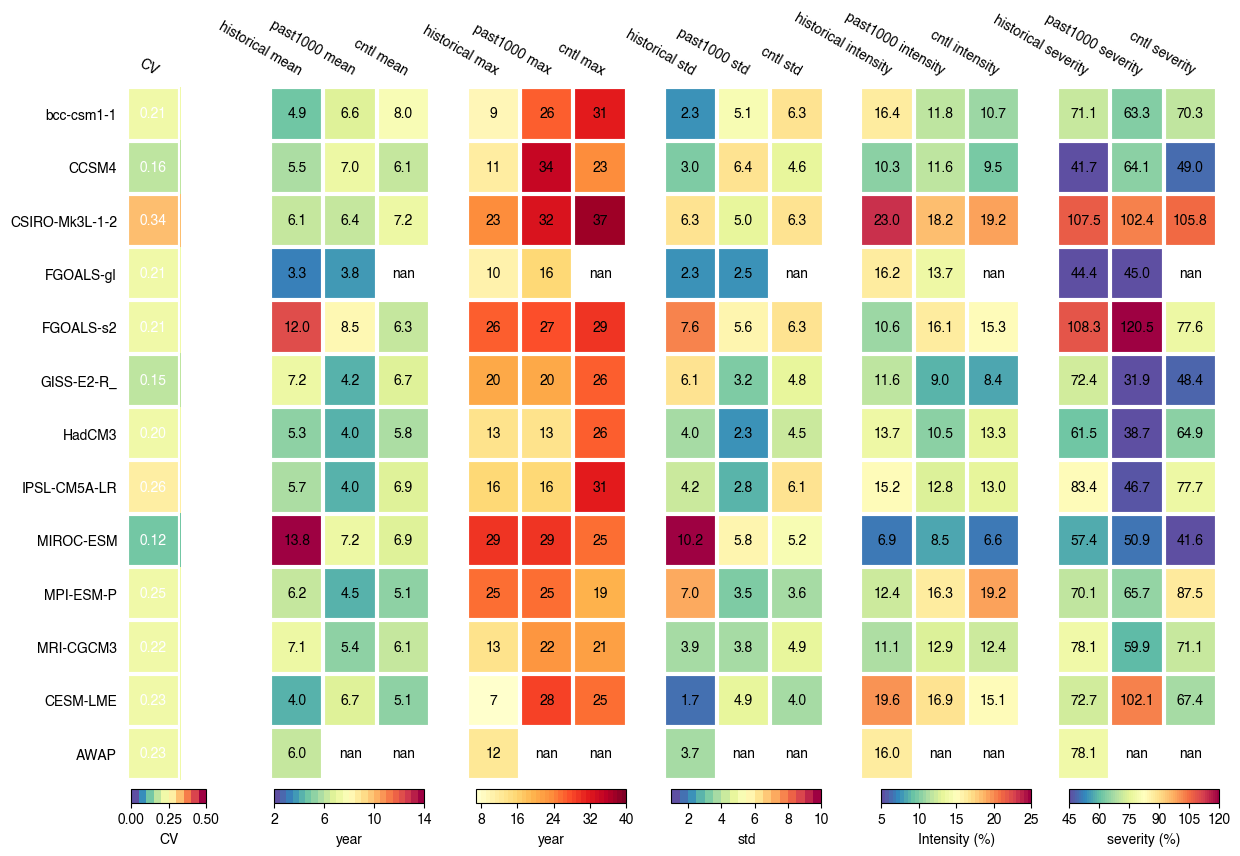

In [23]:
models = ['bcc-csm1-1', 'CCSM4', 'CSIRO-Mk3L-1-2', 'FGOALS-gl', 'FGOALS-s2', 
          'GISS-E2-R_', 'HadCM3', 'IPSL-CM5A-LR', 'MIROC-ESM',   'MPI-ESM-P', 'MRI-CGCM3', 'CESM-LME', 'AWAP']

metric = ['CV', 'historical mean', 'past1000 mean', 'cntl mean',
          'historical max', 'past1000 max', 'cntl max',
          'historical std', 'past1000 std', 'cntl std', 
          'historical intensity', 'past1000 intensity', 'cntl intensity',
          'historical severity', 'past1000 severity', 'cntl severity']
          #'historical events', 'past1000 events ', 'cntl events']

col1_2 = 'droughts_2s2e_mean'
col3_4 = 'droughts_2s2e_max'
col5_6 = 'droughts_2s2e_std'
col7_8 = 'droughts_2s2e_intensity_pc_mean'
col9 = 'droughts_2s2e_severity_pc_mean'
col10 = 'droughts_2s2e_no_of_events'

data_all = np.array([[bcc_precip_hist_mdb.CV, bcc_precip_hist_mdb[col1_2], bcc_precip_lm_mdb[col1_2], bcc_cntl_mdb[col1_2], bcc_precip_hist_mdb[col3_4], 
                      bcc_precip_lm_mdb[col3_4], bcc_cntl_mdb[col3_4], bcc_precip_hist_mdb[col5_6], bcc_precip_lm_mdb[col5_6], bcc_cntl_mdb[col5_6], 
                      bcc_precip_hist_mdb[col7_8], bcc_precip_lm_mdb[col7_8], bcc_cntl_mdb[col7_8], bcc_precip_hist_mdb[col9], bcc_precip_lm_mdb[col9], bcc_cntl_mdb[col9]],
                     [ccsm4_precip_hist_mdb.CV, ccsm4_precip_hist_mdb[col1_2], ccsm4_precip_lm_mdb[col1_2], ccsm4_cntl_mdb[col1_2], ccsm4_precip_hist_mdb[col3_4],
                      ccsm4_precip_lm_mdb[col3_4], ccsm4_cntl_mdb[col3_4], ccsm4_precip_hist_mdb[col5_6], ccsm4_precip_lm_mdb[col5_6], ccsm4_cntl_mdb[col5_6],
                      ccsm4_precip_hist_mdb[col7_8], ccsm4_precip_lm_mdb[col7_8], ccsm4_cntl_mdb[col7_8],ccsm4_precip_hist_mdb[col9], ccsm4_precip_lm_mdb[col9], ccsm4_cntl_mdb[col9]],
                     [csiro_mk3l_precip_hist_mdb.CV, csiro_mk3l_precip_hist_mdb[col1_2], csiro_mk3l_precip_lm_mdb[col1_2], csiro_mk3l_cntl_mdb[col1_2], csiro_mk3l_precip_hist_mdb[col3_4],
                      csiro_mk3l_precip_lm_mdb[col3_4],  csiro_mk3l_cntl_mdb[col3_4], csiro_mk3l_precip_hist_mdb[col5_6], csiro_mk3l_precip_lm_mdb[col5_6], csiro_mk3l_cntl_mdb[col5_6],
                      csiro_mk3l_precip_hist_mdb[col7_8], csiro_mk3l_precip_lm_mdb[col7_8], csiro_mk3l_cntl_mdb[col7_8], csiro_mk3l_precip_hist_mdb[col9], csiro_mk3l_precip_lm_mdb[col9], csiro_mk3l_cntl_mdb[col9]], 
                     [fgoals_gl_precip_hist_mdb.CV, fgoals_gl_precip_hist_mdb[col1_2], fgoals_gl_precip_lm_mdb[col1_2], np.nan, fgoals_gl_precip_hist_mdb[col3_4],
                      fgoals_gl_precip_lm_mdb[col3_4], np.nan, fgoals_gl_precip_hist_mdb[col5_6], fgoals_gl_precip_lm_mdb[col5_6], np.nan, fgoals_gl_precip_hist_mdb[col7_8],
                      fgoals_gl_precip_lm_mdb[col7_8], np.nan, fgoals_gl_precip_hist_mdb[col9], fgoals_gl_precip_lm_mdb[col9], np.nan], 
                     [fgoals_s2_precip_hist_mdb.CV, fgoals_s2_precip_hist_mdb[col1_2], fgoals_s2_precip_lm_mdb[col1_2], fgoals_s2_cntl_mdb[col1_2], fgoals_s2_precip_hist_mdb[col3_4],
                      fgoals_s2_precip_lm_mdb[col3_4], fgoals_s2_cntl_mdb[col3_4], fgoals_s2_precip_hist_mdb[col5_6], fgoals_s2_precip_lm_mdb[col5_6], fgoals_s2_cntl_mdb[col5_6],
                      fgoals_s2_precip_hist_mdb[col7_8], fgoals_s2_precip_lm_mdb[col7_8], fgoals_s2_cntl_mdb[col7_8], fgoals_s2_precip_hist_mdb[col9], fgoals_s2_precip_lm_mdb[col9], fgoals_s2_cntl_mdb[col9]],
                     [giss_28_precip_hist_mdb.CV, giss_28_precip_hist_mdb[col1_2], giss_28_precip_lm_mdb[col1_2], giss_2_cntl_mdb[col1_2], giss_28_precip_hist_mdb[col3_4],
                      giss_28_precip_lm_mdb[col3_4], giss_2_cntl_mdb[col3_4], giss_28_precip_hist_mdb[col5_6], giss_28_precip_lm_mdb[col5_6], giss_2_cntl_mdb[col5_6],
                      giss_28_precip_hist_mdb[col7_8], giss_28_precip_lm_mdb[col7_8], giss_2_cntl_mdb[col7_8], giss_28_precip_hist_mdb[col9], giss_28_precip_lm_mdb[col9], giss_2_cntl_mdb[col9]],
                     [hadcm3_precip_hist_mdb.CV, hadcm3_precip_hist_mdb[col1_2], hadcm3_precip_lm_mdb[col1_2], hadcm3_cntl_mdb[col1_2], hadcm3_precip_hist_mdb[col3_4],
                      hadcm3_precip_lm_mdb[col3_4], hadcm3_cntl_mdb[col3_4], hadcm3_precip_hist_mdb[col5_6], hadcm3_precip_lm_mdb[col5_6], hadcm3_cntl_mdb[col5_6],
                      hadcm3_precip_hist_mdb[col7_8], hadcm3_precip_lm_mdb[col7_8], hadcm3_cntl_mdb[col7_8], hadcm3_precip_hist_mdb[col9], hadcm3_precip_lm_mdb[col9], hadcm3_cntl_mdb[col9]],
                     [ipsl_precip_hist_mdb.CV, ipsl_precip_hist_mdb[col1_2], ipsl_precip_lm_mdb[col1_2], ipsl_cntl_mdb[col1_2], ipsl_precip_hist_mdb[col3_4],
                      ipsl_precip_lm_mdb[col3_4], ipsl_cntl_mdb[col3_4], ipsl_precip_hist_mdb[col5_6], ipsl_precip_lm_mdb[col5_6], ipsl_cntl_mdb[col5_6],
                      ipsl_precip_hist_mdb[col7_8], ipsl_precip_lm_mdb[col7_8], ipsl_cntl_mdb[col7_8], ipsl_precip_hist_mdb[col9], ipsl_precip_lm_mdb[col9], ipsl_cntl_mdb[col9]],
                     [miroc_precip_hist_mdb.CV, miroc_precip_hist_mdb[col1_2], miroc_precip_lm_mdb[col1_2], miroc_cntl_mdb[col1_2], miroc_precip_hist_mdb[col3_4],
                      miroc_precip_lm_mdb[col3_4], miroc_cntl_mdb[col3_4], miroc_precip_hist_mdb[col5_6], miroc_precip_lm_mdb[col5_6], miroc_cntl_mdb[col5_6],
                      miroc_precip_hist_mdb[col7_8], miroc_precip_lm_mdb[col7_8], miroc_cntl_mdb[col7_8], miroc_precip_hist_mdb[col9], miroc_precip_lm_mdb[col9], miroc_cntl_mdb[col9]],
                     [mpi_precip_hist_mdb.CV, mpi_precip_hist_mdb[col1_2], mpi_precip_lm_mdb[col1_2], mpi_cntl_mdb[col1_2], mpi_precip_hist_mdb[col3_4],
                      mpi_precip_lm_mdb[col3_4], mpi_cntl_mdb[col3_4], mpi_precip_hist_mdb[col5_6], mpi_precip_lm_mdb[col5_6], mpi_cntl_mdb[col5_6],
                      mpi_precip_hist_mdb[col7_8], mpi_precip_lm_mdb[col7_8], mpi_cntl_mdb[col7_8], mpi_precip_hist_mdb[col9], mpi_precip_lm_mdb[col9], mpi_cntl_mdb[col9]],
                     [mri_precip_hist_mdb.CV, mri_precip_hist_mdb[col1_2], mri_precip_lm_mdb[col1_2], mri_cntl_mdb[col1_2], mri_precip_hist_mdb[col3_4],
                      mri_precip_lm_mdb[col3_4], mri_cntl_mdb[col3_4], mri_precip_hist_mdb[col5_6], mri_precip_lm_mdb[col5_6], mri_cntl_mdb[col5_6],
                      mri_precip_hist_mdb[col7_8], mri_precip_lm_mdb[col7_8], mri_cntl_mdb[col7_8], mri_precip_hist_mdb[col9], mri_precip_lm_mdb[col9], mri_cntl_mdb[col9]],
                     [ff2_precip_hist_mdb.CV, ff2_precip_hist_mdb[col1_2], ff2_precip_lm_mdb[col1_2], cesmlme_cntl_mdb[col1_2], ff2_precip_hist_mdb[col3_4],
                      ff2_precip_lm_mdb[col3_4], cesmlme_cntl_mdb[col3_4], ff2_precip_hist_mdb[col5_6], ff2_precip_lm_mdb[col5_6], cesmlme_cntl_mdb[col5_6],
                      ff2_precip_hist_mdb[col7_8], ff2_precip_lm_mdb[col7_8], cesmlme_cntl_mdb[col7_8], ff2_precip_hist_mdb[col9], ff2_precip_lm_mdb[col9], cesmlme_cntl_mdb[col9]],
                     [awap_masked_annual_mdb.CV, awap_masked_annual_mdb[col1_2], np.nan,np.nan,  awap_masked_annual_mdb[col3_4], np.nan, np.nan,
                      awap_masked_annual_mdb[col5_6], np.nan, np.nan, awap_masked_annual_mdb[col7_8], np.nan, np.nan, awap_masked_annual_mdb[col9], np.nan, np.nan]])






# modify heat map

CV_plot = data_all[:,0:1]
means_plot = data_all[:,1:4]
max_plot = data_all[:,4:7]
std_plot = data_all[:,7:10]
intensity_plot = data_all[:,10:13]
severity_plot = data_all[:,13:17]
cbar_height = 0.015

# ----------------------------------------------------------
# --- initial
fig, ax = plt.subplots(1, 6, sharey=True, figsize=(15,9))
plt.subplots_adjust(wspace=0.1)


# --- first columns
ax_n = 0
data = CV_plot
xlabels = metric[0:1]
valfmt="{x:.2f}"

# cpt = gmtColormap.gmtColormap('/Users/nickywright/Data/ColourPalettes/temperature-1.cpt')
# palette = LinearSegmentedColormap('my_colormap', cpt)
contour_levels = np.arange(0, 0.55, 0.05)
# cmaps = palette
cmaps = plt.cm.get_cmap('Spectral_r')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)

# Plot the heatmap
im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms )
cax = fig.add_axes([0.17, 0.085, 0.05, cbar_height])
# Create colorbar
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.03, ticks=[0,0.25,0.5])
cbar.set_label('CV')

# ticks & abels
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_yticks(np.arange(data.shape[0]))
ax[ax_n].set_xticklabels(xlabels)
ax[ax_n].set_yticklabels(models)

ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on top of plot
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor") # Rotate the tick labels and set their alignment.

# Turn spines off and create white grid.
for edge, spine in ax[0].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
ax[ax_n].set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'white')

# ------ second column
ax_n = 1
data = means_plot
xlabels = metric[1:4]
valfmt="{x:.1f}"
# cpt = gmtColormap.gmtColormap('/Users/nickywright/Data/ColourPalettes/temperature-1.cpt')
# palette = LinearSegmentedColormap('my_colormap', cpt)

contour_levels = np.arange(2, 14.5, 0.5)
cmaps = plt.cm.get_cmap('Spectral_r')

norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)

im1 = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax2 = fig.add_axes([0.265, 0.085, 0.10, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im1, cax=cax2, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=[2,6,10,14])
# cbar.ax.set_xlabel('years', rotation=0, va="bottom")
cbar.set_label('year')

# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(metric[1:4])
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
# ax[ax_n].set_yticks(np.arange(means_plot.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im1, data, valfmt, 'black')

# # # --- third column
ax_n=2
data = max_plot
labels = metric[4:7]
valfmt="{x:.0f}"

contour_levels = np.arange(7, 41, 1)
cmaps = plt.cm.get_cmap('YlOrRd')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)

im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax = fig.add_axes([0.4, 0.085, 0.10, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=[8,16,24,32,40])
# cbar.ax.set_xlabel('years', rotation=0, va="bottom")
cbar.set_label('year')

# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(labels)
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'black')

# # # # --- fourth column
ax_n = 3
data = std_plot
labels = metric[7:10]
valfmt="{x:.1f}"
contour_levels = np.arange(1, 10.5, 0.5)
cmaps = plt.cm.get_cmap('Spectral_r')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)



im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax = fig.add_axes([0.53, 0.085, 0.1, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=[2,4,6,8,10])
cbar.set_label('std')

# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(labels)
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
# ax[ax_n].set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'black')

# fourth column
ax_n = 4
data = intensity_plot
labels = metric[10:13]
valfmt="{x:.1f}"
contour_levels = np.arange(5, 25.5, 0.5)
cmaps = plt.cm.get_cmap('Spectral_r')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)



im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax = fig.add_axes([0.67, 0.085, 0.1, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=[5,10,15,20,25])
cbar.set_label('Intensity (%)')

# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(labels)
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
# ax[ax_n].set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'black')

# ----------------
# fourth column
ax_n = 5
data = severity_plot
labels = metric[13:17]
valfmt="{x:.1f}"
contour_levels = np.arange(45, 121, 1)
cmaps = plt.cm.get_cmap('Spectral_r')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)



im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax = fig.add_axes([0.795, 0.085, 0.1, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=[45,60,75,90,105,120])
cbar.set_label('severity (%)')

# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(labels)
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
# ax[ax_n].set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'black')

plt.savefig('mdb_hm_2s2e_lm-including-hist.pdf', bbox_inches='tight')
plt.show()


In [24]:
def no_events_100yrs(ds):
    ds['droughts_2s2e_no_events_100yrs'] = (ds.droughts_2s2e_no_of_events / len(ds.year)) * 100
    ds['droughts_2s2e_sum_100yrs'] = (ds.drought_years_2s2e.sum(dim='year') / len(ds.year)) * 100

In [25]:
no_events_100yrs(bcc_precip_hist_mdb)
no_events_100yrs(ccsm4_precip_hist_mdb)
no_events_100yrs(csiro_mk3l_precip_hist_mdb)
no_events_100yrs(fgoals_gl_precip_hist_mdb) 
no_events_100yrs(fgoals_s2_precip_hist_mdb) 
no_events_100yrs(giss_28_precip_hist_mdb)   
no_events_100yrs(hadcm3_precip_hist_mdb)    
no_events_100yrs(ipsl_precip_hist_mdb)      
no_events_100yrs(miroc_precip_hist_mdb)     
no_events_100yrs(mpi_precip_hist_mdb)       
no_events_100yrs(mri_precip_hist_mdb)       
no_events_100yrs(ff2_precip_hist_mdb)       
no_events_100yrs(awap_masked_annual_mdb)    

In [27]:
no_events_100yrs(bcc_cntl_mdb)       
no_events_100yrs(ccsm4_cntl_mdb)     
no_events_100yrs(csiro_mk3l_cntl_mdb)                  
no_events_100yrs(fgoals_s2_cntl_mdb) 
no_events_100yrs(giss_1_cntl_mdb)
no_events_100yrs(giss_2_cntl_mdb)
no_events_100yrs(giss_3_cntl_mdb)
no_events_100yrs(giss_41_cntl_mdb)
no_events_100yrs(hadcm3_cntl_mdb)    
no_events_100yrs(ipsl_cntl_mdb)      
no_events_100yrs(miroc_cntl_mdb)     
no_events_100yrs(mpi_cntl_mdb)       
no_events_100yrs(mri_cntl_mdb)       
no_events_100yrs(cesmlme_cntl_mdb)   

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


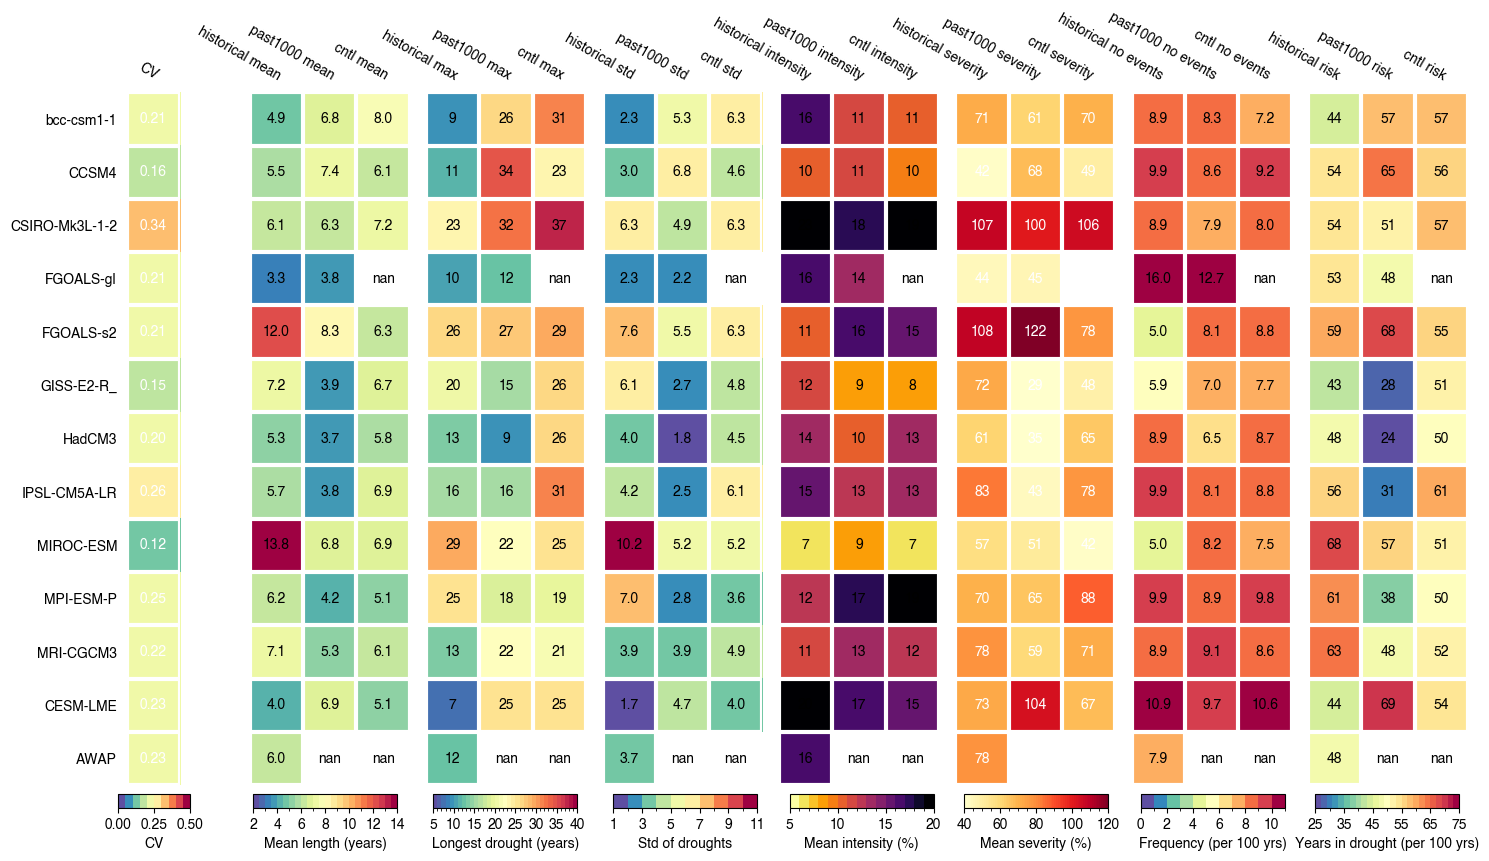

In [31]:
models = ['bcc-csm1-1', 'CCSM4', 'CSIRO-Mk3L-1-2', 'FGOALS-gl', 'FGOALS-s2', 
          'GISS-E2-R_', 'HadCM3', 'IPSL-CM5A-LR', 'MIROC-ESM',   'MPI-ESM-P', 'MRI-CGCM3', 'CESM-LME', 'AWAP']

metric = ['CV', 'historical mean', 'past1000 mean', 'cntl mean',
          'historical max', 'past1000 max', 'cntl max',
          'historical std', 'past1000 std', 'cntl std', 
          'historical intensity', 'past1000 intensity', 'cntl intensity',
          'historical severity', 'past1000 severity', 'cntl severity',
          'historical no events', 'past1000 no events', 'cntl no events',
          'historical risk', 'past1000 risk', 'cntl risk']

col1_2 = 'droughts_2s2e_mean'
col3_4 = 'droughts_2s2e_max'
col5_6 = 'droughts_2s2e_std'
col7_8 = 'droughts_2s2e_intensity_pc_mean'
col9 = 'droughts_2s2e_severity_pc_mean'
col10 = 'droughts_2s2e_no_events_100yrs'
col11 = 'droughts_2s2e_sum_100yrs'

data_all = np.array([[bcc_precip_hist_mdb.CV,    bcc_precip_hist_mdb[col1_2],        bcc_precip_lm_mdb_pre1850[col1_2],        bcc_cntl_mdb[col1_2],        bcc_precip_hist_mdb[col3_4],        bcc_precip_lm_mdb_pre1850[col3_4],        bcc_cntl_mdb[col3_4],        bcc_precip_hist_mdb[col5_6],        bcc_precip_lm_mdb_pre1850[col5_6],        bcc_cntl_mdb[col5_6],        bcc_precip_hist_mdb[col7_8],        bcc_precip_lm_mdb_pre1850[col7_8],        bcc_cntl_mdb[col7_8],        bcc_precip_hist_mdb[col9],        bcc_precip_lm_mdb_pre1850[col9],        bcc_cntl_mdb[col9],        bcc_precip_hist_mdb[col10],        bcc_precip_lm_mdb_pre1850[col10],        bcc_cntl_mdb[col10]       , bcc_precip_hist_mdb[col11],        bcc_precip_lm_mdb_pre1850[col11],        bcc_cntl_mdb[col11]         ],
                 [ccsm4_precip_hist_mdb.CV,      ccsm4_precip_hist_mdb[col1_2],      ccsm4_precip_lm_mdb_pre1850[col1_2],      ccsm4_cntl_mdb[col1_2],      ccsm4_precip_hist_mdb[col3_4],      ccsm4_precip_lm_mdb_pre1850[col3_4],      ccsm4_cntl_mdb[col3_4],      ccsm4_precip_hist_mdb[col5_6],      ccsm4_precip_lm_mdb_pre1850[col5_6],      ccsm4_cntl_mdb[col5_6],      ccsm4_precip_hist_mdb[col7_8],      ccsm4_precip_lm_mdb_pre1850[col7_8],      ccsm4_cntl_mdb[col7_8],      ccsm4_precip_hist_mdb[col9],      ccsm4_precip_lm_mdb_pre1850[col9],      ccsm4_cntl_mdb[col9],      ccsm4_precip_hist_mdb[col10],      ccsm4_precip_lm_mdb_pre1850[col10],      ccsm4_cntl_mdb[col10]     , ccsm4_precip_hist_mdb[col11],      ccsm4_precip_lm_mdb_pre1850[col11],      ccsm4_cntl_mdb[col11]       ],
                 [csiro_mk3l_precip_hist_mdb.CV, csiro_mk3l_precip_hist_mdb[col1_2], csiro_mk3l_precip_lm_mdb_pre1850[col1_2], csiro_mk3l_cntl_mdb[col1_2], csiro_mk3l_precip_hist_mdb[col3_4], csiro_mk3l_precip_lm_mdb_pre1850[col3_4], csiro_mk3l_cntl_mdb[col3_4], csiro_mk3l_precip_hist_mdb[col5_6], csiro_mk3l_precip_lm_mdb_pre1850[col5_6], csiro_mk3l_cntl_mdb[col5_6], csiro_mk3l_precip_hist_mdb[col7_8], csiro_mk3l_precip_lm_mdb_pre1850[col7_8], csiro_mk3l_cntl_mdb[col7_8], csiro_mk3l_precip_hist_mdb[col9], csiro_mk3l_precip_lm_mdb_pre1850[col9], csiro_mk3l_cntl_mdb[col9], csiro_mk3l_precip_hist_mdb[col10], csiro_mk3l_precip_lm_mdb_pre1850[col10], csiro_mk3l_cntl_mdb[col10], csiro_mk3l_precip_hist_mdb[col11], csiro_mk3l_precip_lm_mdb_pre1850[col11], csiro_mk3l_cntl_mdb[col11]  ], 
                 [fgoals_gl_precip_hist_mdb.CV,  fgoals_gl_precip_hist_mdb[col1_2],  fgoals_gl_precip_lm_mdb_pre1850[col1_2],  np.nan,                      fgoals_gl_precip_hist_mdb[col3_4],  fgoals_gl_precip_lm_mdb_pre1850[col3_4],  np.nan,                      fgoals_gl_precip_hist_mdb[col5_6],  fgoals_gl_precip_lm_mdb_pre1850[col5_6],  np.nan,                      fgoals_gl_precip_hist_mdb[col7_8],  fgoals_gl_precip_lm_mdb_pre1850[col7_8],  np.nan,                      fgoals_gl_precip_hist_mdb[col9],  fgoals_gl_precip_lm_mdb_pre1850[col9],  np.nan,                    fgoals_gl_precip_hist_mdb[col10],  fgoals_gl_precip_lm_mdb_pre1850[col10],  np.nan                    , fgoals_gl_precip_hist_mdb[col11],  fgoals_gl_precip_lm_mdb_pre1850[col11],  np.nan                      ], 
                 [fgoals_s2_precip_hist_mdb.CV,  fgoals_s2_precip_hist_mdb[col1_2],  fgoals_s2_precip_lm_mdb_pre1850[col1_2],  fgoals_s2_cntl_mdb[col1_2],  fgoals_s2_precip_hist_mdb[col3_4],  fgoals_s2_precip_lm_mdb_pre1850[col3_4],  fgoals_s2_cntl_mdb[col3_4],  fgoals_s2_precip_hist_mdb[col5_6],  fgoals_s2_precip_lm_mdb_pre1850[col5_6],  fgoals_s2_cntl_mdb[col5_6],  fgoals_s2_precip_hist_mdb[col7_8],  fgoals_s2_precip_lm_mdb_pre1850[col7_8],  fgoals_s2_cntl_mdb[col7_8],  fgoals_s2_precip_hist_mdb[col9],  fgoals_s2_precip_lm_mdb_pre1850[col9],  fgoals_s2_cntl_mdb[col9],  fgoals_s2_precip_hist_mdb[col10],  fgoals_s2_precip_lm_mdb_pre1850[col10],  fgoals_s2_cntl_mdb[col10] , fgoals_s2_precip_hist_mdb[col11],  fgoals_s2_precip_lm_mdb_pre1850[col11],  fgoals_s2_cntl_mdb[col11]   ],
                 [giss_28_precip_hist_mdb.CV,    giss_28_precip_hist_mdb[col1_2],    giss_28_precip_lm_mdb_pre1850[col1_2],    giss_2_cntl_mdb[col1_2],     giss_28_precip_hist_mdb[col3_4],    giss_28_precip_lm_mdb_pre1850[col3_4],    giss_2_cntl_mdb[col3_4],     giss_28_precip_hist_mdb[col5_6],    giss_28_precip_lm_mdb_pre1850[col5_6],    giss_2_cntl_mdb[col5_6],     giss_28_precip_hist_mdb[col7_8],    giss_28_precip_lm_mdb_pre1850[col7_8],    giss_2_cntl_mdb[col7_8],     giss_28_precip_hist_mdb[col9],    giss_28_precip_lm_mdb_pre1850[col9],    giss_2_cntl_mdb[col9],     giss_28_precip_hist_mdb[col10],    giss_28_precip_lm_mdb_pre1850[col10],    giss_2_cntl_mdb[col10]    , giss_28_precip_hist_mdb[col11],    giss_28_precip_lm_mdb_pre1850[col11],    giss_2_cntl_mdb[col11]        ],
                 [hadcm3_precip_hist_mdb.CV,     hadcm3_precip_hist_mdb[col1_2],     hadcm3_precip_lm_mdb_pre1850[col1_2],     hadcm3_cntl_mdb[col1_2],     hadcm3_precip_hist_mdb[col3_4],     hadcm3_precip_lm_mdb_pre1850[col3_4],     hadcm3_cntl_mdb[col3_4],     hadcm3_precip_hist_mdb[col5_6],     hadcm3_precip_lm_mdb_pre1850[col5_6],     hadcm3_cntl_mdb[col5_6],     hadcm3_precip_hist_mdb[col7_8],     hadcm3_precip_lm_mdb_pre1850[col7_8],     hadcm3_cntl_mdb[col7_8],     hadcm3_precip_hist_mdb[col9],     hadcm3_precip_lm_mdb_pre1850[col9],     hadcm3_cntl_mdb[col9],     hadcm3_precip_hist_mdb[col10],     hadcm3_precip_lm_mdb_pre1850[col10],     hadcm3_cntl_mdb[col10]    , hadcm3_precip_hist_mdb[col11],     hadcm3_precip_lm_mdb_pre1850[col11],     hadcm3_cntl_mdb[col11]      ],
                 [ipsl_precip_hist_mdb.CV,       ipsl_precip_hist_mdb[col1_2],       ipsl_precip_lm_mdb_pre1850[col1_2],       ipsl_cntl_mdb[col1_2],       ipsl_precip_hist_mdb[col3_4],       ipsl_precip_lm_mdb_pre1850[col3_4],       ipsl_cntl_mdb[col3_4],       ipsl_precip_hist_mdb[col5_6],       ipsl_precip_lm_mdb_pre1850[col5_6],       ipsl_cntl_mdb[col5_6],       ipsl_precip_hist_mdb[col7_8],       ipsl_precip_lm_mdb_pre1850[col7_8],       ipsl_cntl_mdb[col7_8],       ipsl_precip_hist_mdb[col9],       ipsl_precip_lm_mdb_pre1850[col9],       ipsl_cntl_mdb[col9],       ipsl_precip_hist_mdb[col10],       ipsl_precip_lm_mdb_pre1850[col10],       ipsl_cntl_mdb[col10]      , ipsl_precip_hist_mdb[col11],       ipsl_precip_lm_mdb_pre1850[col11],       ipsl_cntl_mdb[col11]        ],
                 [miroc_precip_hist_mdb.CV,      miroc_precip_hist_mdb[col1_2],      miroc_precip_lm_mdb_pre1850[col1_2],      miroc_cntl_mdb[col1_2],      miroc_precip_hist_mdb[col3_4],      miroc_precip_lm_mdb_pre1850[col3_4],      miroc_cntl_mdb[col3_4],      miroc_precip_hist_mdb[col5_6],      miroc_precip_lm_mdb_pre1850[col5_6],      miroc_cntl_mdb[col5_6],      miroc_precip_hist_mdb[col7_8],      miroc_precip_lm_mdb_pre1850[col7_8],      miroc_cntl_mdb[col7_8],      miroc_precip_hist_mdb[col9],      miroc_precip_lm_mdb_pre1850[col9],      miroc_cntl_mdb[col9],      miroc_precip_hist_mdb[col10],      miroc_precip_lm_mdb_pre1850[col10],      miroc_cntl_mdb[col10]     , miroc_precip_hist_mdb[col11],      miroc_precip_lm_mdb_pre1850[col11],      miroc_cntl_mdb[col11]       ],
                 [mpi_precip_hist_mdb.CV,        mpi_precip_hist_mdb[col1_2],        mpi_precip_lm_mdb_pre1850[col1_2],        mpi_cntl_mdb[col1_2],        mpi_precip_hist_mdb[col3_4],        mpi_precip_lm_mdb_pre1850[col3_4],        mpi_cntl_mdb[col3_4],        mpi_precip_hist_mdb[col5_6],        mpi_precip_lm_mdb_pre1850[col5_6],        mpi_cntl_mdb[col5_6],        mpi_precip_hist_mdb[col7_8],        mpi_precip_lm_mdb_pre1850[col7_8],        mpi_cntl_mdb[col7_8],        mpi_precip_hist_mdb[col9],        mpi_precip_lm_mdb_pre1850[col9],        mpi_cntl_mdb[col9],        mpi_precip_hist_mdb[col10],        mpi_precip_lm_mdb_pre1850[col10],        mpi_cntl_mdb[col10]       , mpi_precip_hist_mdb[col11],        mpi_precip_lm_mdb_pre1850[col11],        mpi_cntl_mdb[col11]         ],
                 [mri_precip_hist_mdb.CV,        mri_precip_hist_mdb[col1_2],        mri_precip_lm_mdb_pre1850[col1_2],        mri_cntl_mdb[col1_2],        mri_precip_hist_mdb[col3_4],        mri_precip_lm_mdb_pre1850[col3_4],        mri_cntl_mdb[col3_4],        mri_precip_hist_mdb[col5_6],        mri_precip_lm_mdb_pre1850[col5_6],        mri_cntl_mdb[col5_6],        mri_precip_hist_mdb[col7_8],        mri_precip_lm_mdb_pre1850[col7_8],        mri_cntl_mdb[col7_8],        mri_precip_hist_mdb[col9],        mri_precip_lm_mdb_pre1850[col9],        mri_cntl_mdb[col9],        mri_precip_hist_mdb[col10],        mri_precip_lm_mdb_pre1850[col10],        mri_cntl_mdb[col10]       , mri_precip_hist_mdb[col11],        mri_precip_lm_mdb_pre1850[col11],        mri_cntl_mdb[col11]         ],
                 [ff2_precip_hist_mdb.CV,        ff2_precip_hist_mdb[col1_2],        ff2_precip_lm_mdb_pre1850[col1_2],        cesmlme_cntl_mdb[col1_2],    ff2_precip_hist_mdb[col3_4],        ff2_precip_lm_mdb_pre1850[col3_4],        cesmlme_cntl_mdb[col3_4],    ff2_precip_hist_mdb[col5_6],        ff2_precip_lm_mdb_pre1850[col5_6],        cesmlme_cntl_mdb[col5_6],    ff2_precip_hist_mdb[col7_8],        ff2_precip_lm_mdb_pre1850[col7_8],        cesmlme_cntl_mdb[col7_8],    ff2_precip_hist_mdb[col9],        ff2_precip_lm_mdb_pre1850[col9],        cesmlme_cntl_mdb[col9],    ff2_precip_hist_mdb[col10],        ff2_precip_lm_mdb_pre1850[col10],        cesmlme_cntl_mdb[col10]   , ff2_precip_hist_mdb[col11],        ff2_precip_lm_mdb_pre1850[col11],        cesmlme_cntl_mdb[col11]     ],
                 [awap_masked_annual_mdb.CV,     awap_masked_annual_mdb[col1_2],     np.nan,                                   np.nan,                      awap_masked_annual_mdb[col3_4],     np.nan,                                   np.nan,                      awap_masked_annual_mdb[col5_6],     np.nan,                                   np.nan,                      awap_masked_annual_mdb[col7_8],     np.nan,                                   np.nan,                      awap_masked_annual_mdb[col9],     np.nan,                                 np.nan,                    awap_masked_annual_mdb[col10],     np.nan,                                  np.nan                    , awap_masked_annual_mdb[col11],     np.nan,                                   np.nan,                    ]])
 
 

# modify heat map

CV_plot = data_all[:,0:1]
means_plot = data_all[:,1:4]
max_plot = data_all[:,4:7]
std_plot = data_all[:,7:10]
intensity_plot = data_all[:,10:13]
severity_plot = data_all[:,13:16]
events_plot = data_all[:,16:19]
risk_plot = data_all[:,19:22]
cbar_height = 0.015
cbar_length = 0.08

# ----------------------------------------------------------
# --- initial
fig, ax = plt.subplots(1, 8, sharey=True, figsize=(18,9))
plt.subplots_adjust(wspace=0.1)


# --- first columns
ax_n = 0
data = CV_plot
xlabels = metric[0:1]
valfmt="{x:.2f}"

# cpt = gmtColormap.gmtColormap('/Users/nickywright/Data/ColourPalettes/temperature-1.cpt')
# palette = LinearSegmentedColormap('my_colormap', cpt)
contour_levels = np.arange(0, 0.55, 0.05)
# cmaps = palette
cmaps = plt.cm.get_cmap('Spectral_r')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)

# Plot the heatmap
im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms )
cax = fig.add_axes([0.15, 0.085, 0.04, cbar_height])
# Create colorbar
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.03, ticks=[0,0.25,0.5])
cbar.set_label('CV')

# ticks & abels
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_yticks(np.arange(data.shape[0]))
ax[ax_n].set_xticklabels(xlabels)
ax[ax_n].set_yticklabels(models)

ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on top of plot
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor") # Rotate the tick labels and set their alignment.

# Turn spines off and create white grid.
for edge, spine in ax[0].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
ax[ax_n].set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'white')

# ------ second column
ax_n = 1
data = means_plot
xlabels = metric[1:4]
valfmt="{x:.1f}"
# cpt = gmtColormap.gmtColormap('/Users/nickywright/Data/ColourPalettes/temperature-1.cpt')
# palette = LinearSegmentedColormap('my_colormap', cpt)

contour_levels = np.arange(2, 14.5, 0.5)
cmaps = plt.cm.get_cmap('Spectral_r')

norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)

im1 = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax2 = fig.add_axes([0.225, 0.085, cbar_length, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im1, cax=cax2, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=np.arange(2,16,2))
# cbar.ax.set_xlabel('years', rotation=0, va="bottom")
cbar.set_label('Mean length (years)')
cbar.ax.xaxis.set_ticks(np.arange(2, 14, 1), minor=True)

# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(metric[1:4])
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
# ax[ax_n].set_yticks(np.arange(means_plot.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im1, data, valfmt, 'black')

# # # --- third column
ax_n=2
data = max_plot
labels = metric[4:7]
valfmt="{x:.0f}"

contour_levels = np.arange(5, 41, 1)
cmaps = plt.cm.get_cmap('Spectral_r')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)

im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax = fig.add_axes([0.325, 0.085, cbar_length, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=np.arange(5, 45, 5))
# cbar.ax.set_xlabel('years', rotation=0, va="bottom")
cbar.set_label('Longest drought (years)')
cbar.ax.xaxis.set_ticks(np.arange(5, 41, 1), minor=True)

# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(labels)
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'black')

# # # # --- fourth column
ax_n = 3
data = std_plot
labels = metric[7:10]
valfmt="{x:.1f}"
contour_levels = np.arange(1, 12, 1)
cmaps = plt.cm.get_cmap('Spectral_r')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)



im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax = fig.add_axes([0.425, 0.085, cbar_length, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=np.arange(1,13,2))
cbar.set_label('Std of droughts')
cbar.ax.xaxis.set_ticks(np.arange(1, 12, 1), minor=True)

# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(labels)
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
# ax[ax_n].set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'black')

# fourth column
ax_n = 4
data = intensity_plot
labels = metric[10:13]
valfmt="{x:.0f}"
contour_levels = np.arange(5, 21, 1)
cmaps = plt.cm.get_cmap('inferno_r')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)



im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax = fig.add_axes([0.523, 0.085, cbar_length, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=[5,10,15,20])
cbar.set_label('Mean intensity (%)')
cbar.ax.xaxis.set_ticks(np.arange(5, 20, 1), minor=True)


# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(labels)
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
# ax[ax_n].set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'black')

# ----------------
# fourth column
ax_n = 5
data = severity_plot
labels = metric[13:16]
valfmt="{x:.0f}"
contour_levels = np.arange(40, 121, 1)
cmaps = plt.cm.get_cmap('YlOrRd')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)



im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax = fig.add_axes([0.62, 0.085, cbar_length, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=np.arange(40, 140, 20))
cbar.set_label('Mean severity (%)')
cbar.ax.xaxis.set_ticks(np.arange(40, 120, 5), minor=True)

# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(labels)
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
# ax[ax_n].set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'white')



# fifth column
ax_n=6
data = events_plot

labels = metric[16:19]
valfmt="{x:.1f}"
contour_levels = np.arange(0, 12, 1)
cmaps = plt.cm.get_cmap('Spectral_r')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)

im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax = fig.add_axes([0.718, 0.085, cbar_length, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=np.arange(0,12,2))
cbar.set_label('Frequency (per 100 yrs)')
cbar.ax.xaxis.set_ticks(np.arange(0, 12, 1), minor=True)

# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(labels)
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
# ax[ax_n].set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'black')

# fifth column
ax_n=7
data = risk_plot

labels = metric[19:22]
valfmt="{x:.0f}"
contour_levels = np.arange(25, 76, 2)
cmaps = plt.cm.get_cmap('Spectral_r')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)



im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax = fig.add_axes([0.815, 0.085, cbar_length, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=np.arange(25, 85, 10))
cbar.ax.xaxis.set_ticks(np.arange(30, 80, 10), minor=True)
cbar.set_label('Years in drought (per 100 yrs)')

# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(labels)
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
# ax[ax_n].set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'black')

plt.savefig('mdb_hm_2s2e_lm-excluding-hist.pdf', bbox_inches='tight')
plt.show()




1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


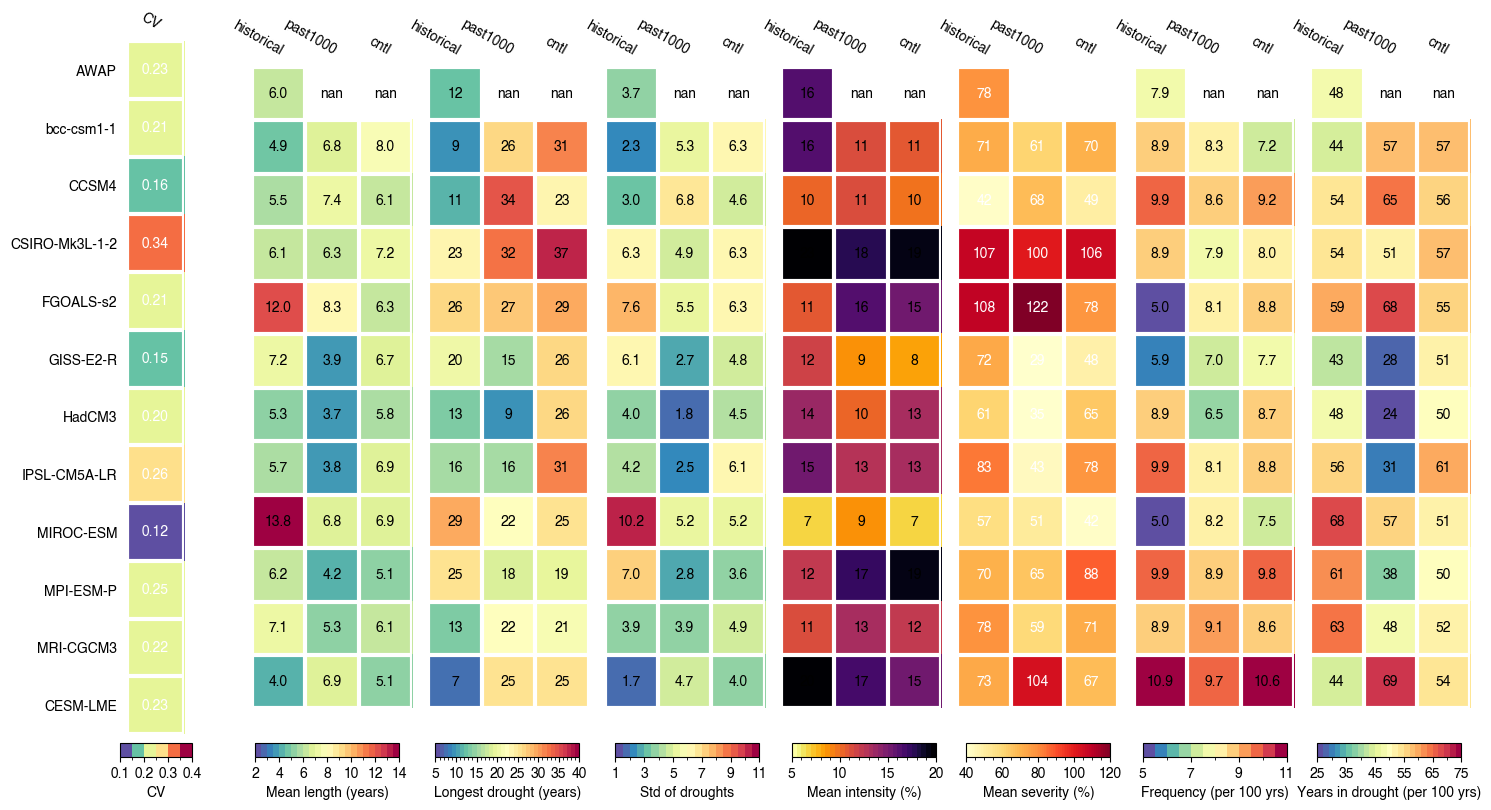

In [32]:
models = ['AWAP', 'bcc-csm1-1', 'CCSM4', 'CSIRO-Mk3L-1-2', 'FGOALS-s2', 
          'GISS-E2-R', 'HadCM3', 'IPSL-CM5A-LR', 'MIROC-ESM',   'MPI-ESM-P', 'MRI-CGCM3', 'CESM-LME']

metric = ['CV', 'historical', 'past1000', 'cntl',
          'historical', 'past1000', 'cntl',
          'historical', 'past1000', 'cntl', 
          'historical', 'past1000', 'cntl',
          'historical', 'past1000', 'cntl',
          'historical', 'past1000', 'cntl',
          'historical', 'past1000', 'cntl']

col1_2 = 'droughts_2s2e_mean'
col3_4 = 'droughts_2s2e_max'
col5_6 = 'droughts_2s2e_std'
col7_8 = 'droughts_2s2e_intensity_pc_mean'
col9 = 'droughts_2s2e_severity_pc_mean'
col10 = 'droughts_2s2e_no_events_100yrs'
col11 = 'droughts_2s2e_sum_100yrs'

data_all = np.array([[awap_masked_annual_mdb.CV,     awap_masked_annual_mdb[col1_2],     np.nan,                                   np.nan,                      awap_masked_annual_mdb[col3_4],     np.nan,                                   np.nan,                      awap_masked_annual_mdb[col5_6],     np.nan,                                   np.nan,                      awap_masked_annual_mdb[col7_8],     np.nan,                                   np.nan,                      awap_masked_annual_mdb[col9],     np.nan,                                 np.nan,                    awap_masked_annual_mdb[col10],     np.nan,                                  np.nan                    , awap_masked_annual_mdb[col11],     np.nan,                                   np.nan,                    ],
                     [bcc_precip_hist_mdb.CV,    bcc_precip_hist_mdb[col1_2],        bcc_precip_lm_mdb_pre1850[col1_2],        bcc_cntl_mdb[col1_2],        bcc_precip_hist_mdb[col3_4],        bcc_precip_lm_mdb_pre1850[col3_4],        bcc_cntl_mdb[col3_4],        bcc_precip_hist_mdb[col5_6],        bcc_precip_lm_mdb_pre1850[col5_6],        bcc_cntl_mdb[col5_6],        bcc_precip_hist_mdb[col7_8],        bcc_precip_lm_mdb_pre1850[col7_8],        bcc_cntl_mdb[col7_8],        bcc_precip_hist_mdb[col9],        bcc_precip_lm_mdb_pre1850[col9],        bcc_cntl_mdb[col9],        bcc_precip_hist_mdb[col10],        bcc_precip_lm_mdb_pre1850[col10],        bcc_cntl_mdb[col10]       , bcc_precip_hist_mdb[col11],        bcc_precip_lm_mdb_pre1850[col11],        bcc_cntl_mdb[col11]         ],
                 [ccsm4_precip_hist_mdb.CV,      ccsm4_precip_hist_mdb[col1_2],      ccsm4_precip_lm_mdb_pre1850[col1_2],      ccsm4_cntl_mdb[col1_2],      ccsm4_precip_hist_mdb[col3_4],      ccsm4_precip_lm_mdb_pre1850[col3_4],      ccsm4_cntl_mdb[col3_4],      ccsm4_precip_hist_mdb[col5_6],      ccsm4_precip_lm_mdb_pre1850[col5_6],      ccsm4_cntl_mdb[col5_6],      ccsm4_precip_hist_mdb[col7_8],      ccsm4_precip_lm_mdb_pre1850[col7_8],      ccsm4_cntl_mdb[col7_8],      ccsm4_precip_hist_mdb[col9],      ccsm4_precip_lm_mdb_pre1850[col9],      ccsm4_cntl_mdb[col9],      ccsm4_precip_hist_mdb[col10],      ccsm4_precip_lm_mdb_pre1850[col10],      ccsm4_cntl_mdb[col10]     , ccsm4_precip_hist_mdb[col11],      ccsm4_precip_lm_mdb_pre1850[col11],      ccsm4_cntl_mdb[col11]       ],
                 [csiro_mk3l_precip_hist_mdb.CV, csiro_mk3l_precip_hist_mdb[col1_2], csiro_mk3l_precip_lm_mdb_pre1850[col1_2], csiro_mk3l_cntl_mdb[col1_2], csiro_mk3l_precip_hist_mdb[col3_4], csiro_mk3l_precip_lm_mdb_pre1850[col3_4], csiro_mk3l_cntl_mdb[col3_4], csiro_mk3l_precip_hist_mdb[col5_6], csiro_mk3l_precip_lm_mdb_pre1850[col5_6], csiro_mk3l_cntl_mdb[col5_6], csiro_mk3l_precip_hist_mdb[col7_8], csiro_mk3l_precip_lm_mdb_pre1850[col7_8], csiro_mk3l_cntl_mdb[col7_8], csiro_mk3l_precip_hist_mdb[col9], csiro_mk3l_precip_lm_mdb_pre1850[col9], csiro_mk3l_cntl_mdb[col9], csiro_mk3l_precip_hist_mdb[col10], csiro_mk3l_precip_lm_mdb_pre1850[col10], csiro_mk3l_cntl_mdb[col10], csiro_mk3l_precip_hist_mdb[col11], csiro_mk3l_precip_lm_mdb_pre1850[col11], csiro_mk3l_cntl_mdb[col11]  ], 
                 [fgoals_s2_precip_hist_mdb.CV,  fgoals_s2_precip_hist_mdb[col1_2],  fgoals_s2_precip_lm_mdb_pre1850[col1_2],  fgoals_s2_cntl_mdb[col1_2],  fgoals_s2_precip_hist_mdb[col3_4],  fgoals_s2_precip_lm_mdb_pre1850[col3_4],  fgoals_s2_cntl_mdb[col3_4],  fgoals_s2_precip_hist_mdb[col5_6],  fgoals_s2_precip_lm_mdb_pre1850[col5_6],  fgoals_s2_cntl_mdb[col5_6],  fgoals_s2_precip_hist_mdb[col7_8],  fgoals_s2_precip_lm_mdb_pre1850[col7_8],  fgoals_s2_cntl_mdb[col7_8],  fgoals_s2_precip_hist_mdb[col9],  fgoals_s2_precip_lm_mdb_pre1850[col9],  fgoals_s2_cntl_mdb[col9],  fgoals_s2_precip_hist_mdb[col10],  fgoals_s2_precip_lm_mdb_pre1850[col10],  fgoals_s2_cntl_mdb[col10] , fgoals_s2_precip_hist_mdb[col11],  fgoals_s2_precip_lm_mdb_pre1850[col11],  fgoals_s2_cntl_mdb[col11]   ],
                 [giss_28_precip_hist_mdb.CV,    giss_28_precip_hist_mdb[col1_2],    giss_28_precip_lm_mdb_pre1850[col1_2],    giss_2_cntl_mdb[col1_2],     giss_28_precip_hist_mdb[col3_4],    giss_28_precip_lm_mdb_pre1850[col3_4],    giss_2_cntl_mdb[col3_4],     giss_28_precip_hist_mdb[col5_6],    giss_28_precip_lm_mdb_pre1850[col5_6],    giss_2_cntl_mdb[col5_6],     giss_28_precip_hist_mdb[col7_8],    giss_28_precip_lm_mdb_pre1850[col7_8],    giss_2_cntl_mdb[col7_8],     giss_28_precip_hist_mdb[col9],    giss_28_precip_lm_mdb_pre1850[col9],    giss_2_cntl_mdb[col9],     giss_28_precip_hist_mdb[col10],    giss_28_precip_lm_mdb_pre1850[col10],    giss_2_cntl_mdb[col10]    , giss_28_precip_hist_mdb[col11],    giss_28_precip_lm_mdb_pre1850[col11],    giss_2_cntl_mdb[col11]      ],
                 [hadcm3_precip_hist_mdb.CV,     hadcm3_precip_hist_mdb[col1_2],     hadcm3_precip_lm_mdb_pre1850[col1_2],     hadcm3_cntl_mdb[col1_2],     hadcm3_precip_hist_mdb[col3_4],     hadcm3_precip_lm_mdb_pre1850[col3_4],     hadcm3_cntl_mdb[col3_4],     hadcm3_precip_hist_mdb[col5_6],     hadcm3_precip_lm_mdb_pre1850[col5_6],     hadcm3_cntl_mdb[col5_6],     hadcm3_precip_hist_mdb[col7_8],     hadcm3_precip_lm_mdb_pre1850[col7_8],     hadcm3_cntl_mdb[col7_8],     hadcm3_precip_hist_mdb[col9],     hadcm3_precip_lm_mdb_pre1850[col9],     hadcm3_cntl_mdb[col9],     hadcm3_precip_hist_mdb[col10],     hadcm3_precip_lm_mdb_pre1850[col10],     hadcm3_cntl_mdb[col10]    , hadcm3_precip_hist_mdb[col11],     hadcm3_precip_lm_mdb_pre1850[col11],     hadcm3_cntl_mdb[col11]      ],
                 [ipsl_precip_hist_mdb.CV,       ipsl_precip_hist_mdb[col1_2],       ipsl_precip_lm_mdb_pre1850[col1_2],       ipsl_cntl_mdb[col1_2],       ipsl_precip_hist_mdb[col3_4],       ipsl_precip_lm_mdb_pre1850[col3_4],       ipsl_cntl_mdb[col3_4],       ipsl_precip_hist_mdb[col5_6],       ipsl_precip_lm_mdb_pre1850[col5_6],       ipsl_cntl_mdb[col5_6],       ipsl_precip_hist_mdb[col7_8],       ipsl_precip_lm_mdb_pre1850[col7_8],       ipsl_cntl_mdb[col7_8],       ipsl_precip_hist_mdb[col9],       ipsl_precip_lm_mdb_pre1850[col9],       ipsl_cntl_mdb[col9],       ipsl_precip_hist_mdb[col10],       ipsl_precip_lm_mdb_pre1850[col10],       ipsl_cntl_mdb[col10]      , ipsl_precip_hist_mdb[col11],       ipsl_precip_lm_mdb_pre1850[col11],       ipsl_cntl_mdb[col11]        ],
                 [miroc_precip_hist_mdb.CV,      miroc_precip_hist_mdb[col1_2],      miroc_precip_lm_mdb_pre1850[col1_2],      miroc_cntl_mdb[col1_2],      miroc_precip_hist_mdb[col3_4],      miroc_precip_lm_mdb_pre1850[col3_4],      miroc_cntl_mdb[col3_4],      miroc_precip_hist_mdb[col5_6],      miroc_precip_lm_mdb_pre1850[col5_6],      miroc_cntl_mdb[col5_6],      miroc_precip_hist_mdb[col7_8],      miroc_precip_lm_mdb_pre1850[col7_8],      miroc_cntl_mdb[col7_8],      miroc_precip_hist_mdb[col9],      miroc_precip_lm_mdb_pre1850[col9],      miroc_cntl_mdb[col9],      miroc_precip_hist_mdb[col10],      miroc_precip_lm_mdb_pre1850[col10],      miroc_cntl_mdb[col10]     , miroc_precip_hist_mdb[col11],      miroc_precip_lm_mdb_pre1850[col11],      miroc_cntl_mdb[col11]       ],
                 [mpi_precip_hist_mdb.CV,        mpi_precip_hist_mdb[col1_2],        mpi_precip_lm_mdb_pre1850[col1_2],        mpi_cntl_mdb[col1_2],        mpi_precip_hist_mdb[col3_4],        mpi_precip_lm_mdb_pre1850[col3_4],        mpi_cntl_mdb[col3_4],        mpi_precip_hist_mdb[col5_6],        mpi_precip_lm_mdb_pre1850[col5_6],        mpi_cntl_mdb[col5_6],        mpi_precip_hist_mdb[col7_8],        mpi_precip_lm_mdb_pre1850[col7_8],        mpi_cntl_mdb[col7_8],        mpi_precip_hist_mdb[col9],        mpi_precip_lm_mdb_pre1850[col9],        mpi_cntl_mdb[col9],        mpi_precip_hist_mdb[col10],        mpi_precip_lm_mdb_pre1850[col10],        mpi_cntl_mdb[col10]       , mpi_precip_hist_mdb[col11],        mpi_precip_lm_mdb_pre1850[col11],        mpi_cntl_mdb[col11]         ],
                 [mri_precip_hist_mdb.CV,        mri_precip_hist_mdb[col1_2],        mri_precip_lm_mdb_pre1850[col1_2],        mri_cntl_mdb[col1_2],        mri_precip_hist_mdb[col3_4],        mri_precip_lm_mdb_pre1850[col3_4],        mri_cntl_mdb[col3_4],        mri_precip_hist_mdb[col5_6],        mri_precip_lm_mdb_pre1850[col5_6],        mri_cntl_mdb[col5_6],        mri_precip_hist_mdb[col7_8],        mri_precip_lm_mdb_pre1850[col7_8],        mri_cntl_mdb[col7_8],        mri_precip_hist_mdb[col9],        mri_precip_lm_mdb_pre1850[col9],        mri_cntl_mdb[col9],        mri_precip_hist_mdb[col10],        mri_precip_lm_mdb_pre1850[col10],        mri_cntl_mdb[col10]       , mri_precip_hist_mdb[col11],        mri_precip_lm_mdb_pre1850[col11],        mri_cntl_mdb[col11]         ],
                 [ff2_precip_hist_mdb.CV,        ff2_precip_hist_mdb[col1_2],        ff2_precip_lm_mdb_pre1850[col1_2],        cesmlme_cntl_mdb[col1_2],    ff2_precip_hist_mdb[col3_4],        ff2_precip_lm_mdb_pre1850[col3_4],        cesmlme_cntl_mdb[col3_4],    ff2_precip_hist_mdb[col5_6],        ff2_precip_lm_mdb_pre1850[col5_6],        cesmlme_cntl_mdb[col5_6],    ff2_precip_hist_mdb[col7_8],        ff2_precip_lm_mdb_pre1850[col7_8],        cesmlme_cntl_mdb[col7_8],    ff2_precip_hist_mdb[col9],        ff2_precip_lm_mdb_pre1850[col9],        cesmlme_cntl_mdb[col9],    ff2_precip_hist_mdb[col10],        ff2_precip_lm_mdb_pre1850[col10],        cesmlme_cntl_mdb[col10]   , ff2_precip_hist_mdb[col11],        ff2_precip_lm_mdb_pre1850[col11],        cesmlme_cntl_mdb[col11]     ]])
 
 

# modify heat map

CV_plot = data_all[:,0:1]
means_plot = data_all[:,1:4]
max_plot = data_all[:,4:7]
std_plot = data_all[:,7:10]
intensity_plot = data_all[:,10:13]
severity_plot = data_all[:,13:16]
events_plot = data_all[:,16:19]
risk_plot = data_all[:,19:22]
cbar_height = 0.015
cbar_length = 0.08

# ----------------------------------------------------------
# --- initial
fig, ax = plt.subplots(1, 8, sharey=True, figsize=(18,9))
plt.subplots_adjust(wspace=0.1)


# --- first columns
ax_n = 0
data = CV_plot
xlabels = metric[0:1]
valfmt="{x:.2f}"

# cpt = gmtColormap.gmtColormap('/Users/nickywright/Data/ColourPalettes/temperature-1.cpt')
# palette = LinearSegmentedColormap('my_colormap', cpt)
contour_levels = np.arange(0.1, 0.45, 0.05)
# cmaps = palette 
cmaps = plt.cm.get_cmap('Spectral_r')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)

# Plot the heatmap
im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms )
cax = fig.add_axes([0.15, 0.085, 0.04, cbar_height])
# Create colorbar
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.03, ticks=np.arange(0.1,0.5,0.1))
cbar.ax.xaxis.set_ticks(np.arange(0.1, 0.45, 0.05), minor=True)
cbar.set_label('CV')

# ticks & abels
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_yticks(np.arange(data.shape[0]))
ax[ax_n].set_xticklabels(xlabels)
ax[ax_n].set_yticklabels(models)

ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on top of plot
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor") # Rotate the tick labels and set their alignment.

# Turn spines off and create white grid.
for edge, spine in ax[0].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
ax[ax_n].set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'white')

# ------ second column
ax_n = 1
data = means_plot
xlabels = metric[1:4]
valfmt="{x:.1f}"
# cpt = gmtColormap.gmtColormap('/Users/nickywright/Data/ColourPalettes/temperature-1.cpt')
# palette = LinearSegmentedColormap('my_colormap', cpt)

contour_levels = np.arange(2, 14.5, 0.5)
cmaps = plt.cm.get_cmap('Spectral_r')

norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)

im1 = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax2 = fig.add_axes([0.225, 0.085, cbar_length, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im1, cax=cax2, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=np.arange(2,16,2))
# cbar.ax.set_xlabel('years', rotation=0, va="bottom")
cbar.set_label('Mean length (years)')
cbar.ax.xaxis.set_ticks(np.arange(2, 14, 1), minor=True)

# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(metric[1:4])
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
# ax[ax_n].set_yticks(np.arange(means_plot.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im1, data, valfmt, 'black')

# # # --- third column
ax_n=2
data = max_plot
labels = metric[4:7]
valfmt="{x:.0f}"

contour_levels = np.arange(5, 41, 1)
cmaps = plt.cm.get_cmap('Spectral_r')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)

im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax = fig.add_axes([0.325, 0.085, cbar_length, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=np.arange(5, 45, 5))
# cbar.ax.set_xlabel('years', rotation=0, va="bottom")
cbar.set_label('Longest drought (years)')
cbar.ax.xaxis.set_ticks(np.arange(5, 41, 1), minor=True)

# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(labels)
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'black')

# # # # --- fourth column
ax_n = 3
data = std_plot
labels = metric[7:10]
valfmt="{x:.1f}"
contour_levels = np.arange(1, 11.5, 0.5)
cmaps = plt.cm.get_cmap('Spectral_r')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)



im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax = fig.add_axes([0.425, 0.085, cbar_length, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=np.arange(1,13,2))
cbar.set_label('Std of droughts')
cbar.ax.xaxis.set_ticks(np.arange(1, 12, 1), minor=True)

# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(labels)
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
# ax[ax_n].set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'black')

# fourth column
ax_n = 4
data = intensity_plot
labels = metric[10:13]
valfmt="{x:.0f}"
contour_levels = np.arange(5, 20.5, 0.5)
cmaps = plt.cm.get_cmap('inferno_r')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)



im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax = fig.add_axes([0.523, 0.085, cbar_length, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=[5,10,15,20])
cbar.set_label('Mean intensity (%)')
cbar.ax.xaxis.set_ticks(np.arange(5, 20, 1), minor=True)


# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(labels)
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
# ax[ax_n].set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'black')

# ----------------
# fourth column
ax_n = 5
data = severity_plot
labels = metric[13:16]
valfmt="{x:.0f}"
contour_levels = np.arange(40, 121, 1)
cmaps = plt.cm.get_cmap('YlOrRd')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)



im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax = fig.add_axes([0.62, 0.085, cbar_length, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=np.arange(40, 140, 20))
cbar.set_label('Mean severity (%)')
cbar.ax.xaxis.set_ticks(np.arange(40, 120, 5), minor=True)

# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(labels)
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
# ax[ax_n].set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'white')



# fifth column
ax_n=6
data = events_plot

labels = metric[16:19]
valfmt="{x:.1f}"
contour_levels = np.arange(5, 11.5, 0.5)
cmaps = plt.cm.get_cmap('Spectral_r')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)

im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax = fig.add_axes([0.718, 0.085, cbar_length, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=np.arange(5,12,2))
cbar.set_label('Frequency (per 100 yrs)')
cbar.ax.xaxis.set_ticks(np.arange(5, 12, 1), minor=True)

# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(labels)
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
# ax[ax_n].set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'black')

# fifth column
ax_n=7
data = risk_plot

labels = metric[19:22]
valfmt="{x:.0f}"
contour_levels = np.arange(25, 76, 2)
cmaps = plt.cm.get_cmap('Spectral_r')
norms = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=False)



im = ax[ax_n].imshow(data, cmap=cmaps, norm=norms)
# Create colorbar
cax = fig.add_axes([0.815, 0.085, cbar_length, cbar_height])  # x, y, width, height
cbar = plt.colorbar(im, cax=cax, orientation='horizontal', fraction=0.1, aspect=10, pad=0.0, ticks=np.arange(25, 85, 10))
cbar.ax.xaxis.set_ticks(np.arange(30, 80, 10), minor=True)
cbar.set_label('Years in drought (per 100 yrs)')

# We want to show all ticks...
ax[ax_n].set_xticks(np.arange(data.shape[1]))
ax[ax_n].set_xticklabels(labels)
ax[ax_n].tick_params(top=False, bottom=False, labeltop=True, labelbottom=False, left=False) # ticks on plot

# Rotate the tick labels and set their alignment.
plt.setp(ax[ax_n].get_xticklabels(), rotation=-30, ha="right",
         rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax[ax_n].spines.items():
    spine.set_visible(False)

ax[ax_n].set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
# ax[ax_n].set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax[ax_n].grid(which="minor", color="w", linestyle='-', linewidth=3)
ax[ax_n].tick_params(which="minor", bottom=False, left=False)

plot_text(im, data, valfmt, 'black')

plt.savefig('mdb_hm_2s2e_lm-excluding-hist_v2.pdf', bbox_inches='tight')
plt.show()





---

# HAVE NOT TOUCHED BELOW HERE

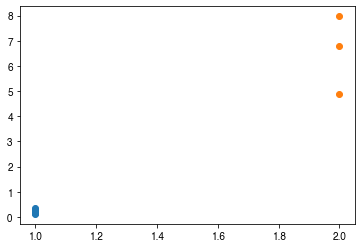

In [27]:
data_all = np.array([[bcc_precip_hist_mdb.CV,    bcc_precip_hist_mdb[col1_2],        bcc_precip_lm_mdb_pre1850[col1_2],        bcc_cntl_mdb[col1_2],        bcc_precip_hist_mdb[col3_4],        bcc_precip_lm_mdb_pre1850[col3_4],        bcc_cntl_mdb[col3_4],        bcc_precip_hist_mdb[col5_6],        bcc_precip_lm_mdb_pre1850[col5_6],        bcc_cntl_mdb[col5_6],        bcc_precip_hist_mdb[col7_8],        bcc_precip_lm_mdb_pre1850[col7_8],        bcc_cntl_mdb[col7_8],        bcc_precip_hist_mdb[col9],        bcc_precip_lm_mdb_pre1850[col9],        bcc_cntl_mdb[col9],        bcc_precip_hist_mdb[col10],        bcc_precip_lm_mdb_pre1850[col10],        bcc_cntl_mdb[col10]       , bcc_precip_hist_mdb[col11],        bcc_precip_lm_mdb_pre1850[col11],        bcc_cntl_mdb[col11]         ],
                 [ccsm4_precip_hist_mdb.CV,      ccsm4_precip_hist_mdb[col1_2],      ccsm4_precip_lm_mdb_pre1850[col1_2],      ccsm4_cntl_mdb[col1_2],      ccsm4_precip_hist_mdb[col3_4],      ccsm4_precip_lm_mdb_pre1850[col3_4],      ccsm4_cntl_mdb[col3_4],      ccsm4_precip_hist_mdb[col5_6],      ccsm4_precip_lm_mdb_pre1850[col5_6],      ccsm4_cntl_mdb[col5_6],      ccsm4_precip_hist_mdb[col7_8],      ccsm4_precip_lm_mdb_pre1850[col7_8],      ccsm4_cntl_mdb[col7_8],      ccsm4_precip_hist_mdb[col9],      ccsm4_precip_lm_mdb_pre1850[col9],      ccsm4_cntl_mdb[col9],      ccsm4_precip_hist_mdb[col10],      ccsm4_precip_lm_mdb_pre1850[col10],      ccsm4_cntl_mdb[col10]     , ccsm4_precip_hist_mdb[col11],      ccsm4_precip_lm_mdb_pre1850[col11],      ccsm4_cntl_mdb[col11]       ],
                 [csiro_mk3l_precip_hist_mdb.CV, csiro_mk3l_precip_hist_mdb[col1_2], csiro_mk3l_precip_lm_mdb_pre1850[col1_2], csiro_mk3l_cntl_mdb[col1_2], csiro_mk3l_precip_hist_mdb[col3_4], csiro_mk3l_precip_lm_mdb_pre1850[col3_4], csiro_mk3l_cntl_mdb[col3_4], csiro_mk3l_precip_hist_mdb[col5_6], csiro_mk3l_precip_lm_mdb_pre1850[col5_6], csiro_mk3l_cntl_mdb[col5_6], csiro_mk3l_precip_hist_mdb[col7_8], csiro_mk3l_precip_lm_mdb_pre1850[col7_8], csiro_mk3l_cntl_mdb[col7_8], csiro_mk3l_precip_hist_mdb[col9], csiro_mk3l_precip_lm_mdb_pre1850[col9], csiro_mk3l_cntl_mdb[col9], csiro_mk3l_precip_hist_mdb[col10], csiro_mk3l_precip_lm_mdb_pre1850[col10], csiro_mk3l_cntl_mdb[col10], csiro_mk3l_precip_hist_mdb[col11], csiro_mk3l_precip_lm_mdb_pre1850[col11], csiro_mk3l_cntl_mdb[col11]  ], 
                 [fgoals_gl_precip_hist_mdb.CV,  fgoals_gl_precip_hist_mdb[col1_2],  fgoals_gl_precip_lm_mdb_pre1850[col1_2],  np.nan,                      fgoals_gl_precip_hist_mdb[col3_4],  fgoals_gl_precip_lm_mdb_pre1850[col3_4],  np.nan,                      fgoals_gl_precip_hist_mdb[col5_6],  fgoals_gl_precip_lm_mdb_pre1850[col5_6],  np.nan,                      fgoals_gl_precip_hist_mdb[col7_8],  fgoals_gl_precip_lm_mdb_pre1850[col7_8],  np.nan,                      fgoals_gl_precip_hist_mdb[col9],  fgoals_gl_precip_lm_mdb_pre1850[col9],  np.nan,                    fgoals_gl_precip_hist_mdb[col10],  fgoals_gl_precip_lm_mdb_pre1850[col10],  np.nan                    , fgoals_gl_precip_hist_mdb[col11],  fgoals_gl_precip_lm_mdb_pre1850[col11],  np.nan                      ], 
                 [fgoals_s2_precip_hist_mdb.CV,  fgoals_s2_precip_hist_mdb[col1_2],  fgoals_s2_precip_lm_mdb_pre1850[col1_2],  fgoals_s2_cntl_mdb[col1_2],  fgoals_s2_precip_hist_mdb[col3_4],  fgoals_s2_precip_lm_mdb_pre1850[col3_4],  fgoals_s2_cntl_mdb[col3_4],  fgoals_s2_precip_hist_mdb[col5_6],  fgoals_s2_precip_lm_mdb_pre1850[col5_6],  fgoals_s2_cntl_mdb[col5_6],  fgoals_s2_precip_hist_mdb[col7_8],  fgoals_s2_precip_lm_mdb_pre1850[col7_8],  fgoals_s2_cntl_mdb[col7_8],  fgoals_s2_precip_hist_mdb[col9],  fgoals_s2_precip_lm_mdb_pre1850[col9],  fgoals_s2_cntl_mdb[col9],  fgoals_s2_precip_hist_mdb[col10],  fgoals_s2_precip_lm_mdb_pre1850[col10],  fgoals_s2_cntl_mdb[col10] , fgoals_s2_precip_hist_mdb[col11],  fgoals_s2_precip_lm_mdb_pre1850[col11],  fgoals_s2_cntl_mdb[col11]   ],
                 [giss_28_precip_hist_mdb.CV,    giss_28_precip_hist_mdb[col1_2],    giss_28_precip_lm_mdb_pre1850[col1_2],    giss_cntl_mdb[col1_2],       giss_28_precip_hist_mdb[col3_4],    giss_28_precip_lm_mdb_pre1850[col3_4],    giss_cntl_mdb[col3_4],       giss_28_precip_hist_mdb[col5_6],    giss_28_precip_lm_mdb_pre1850[col5_6],    giss_cntl_mdb[col5_6],       giss_28_precip_hist_mdb[col7_8],    giss_28_precip_lm_mdb_pre1850[col7_8],    giss_cntl_mdb[col7_8],       giss_28_precip_hist_mdb[col9],    giss_28_precip_lm_mdb_pre1850[col9],    giss_cntl_mdb[col9],       giss_28_precip_hist_mdb[col10],    giss_28_precip_lm_mdb_pre1850[col10],    giss_cntl_mdb[col10]      , giss_28_precip_hist_mdb[col11],    giss_28_precip_lm_mdb_pre1850[col11],    giss_cntl_mdb[col11]        ],
                 [hadcm3_precip_hist_mdb.CV,     hadcm3_precip_hist_mdb[col1_2],     hadcm3_precip_lm_mdb_pre1850[col1_2],     hadcm3_cntl_mdb[col1_2],     hadcm3_precip_hist_mdb[col3_4],     hadcm3_precip_lm_mdb_pre1850[col3_4],     hadcm3_cntl_mdb[col3_4],     hadcm3_precip_hist_mdb[col5_6],     hadcm3_precip_lm_mdb_pre1850[col5_6],     hadcm3_cntl_mdb[col5_6],     hadcm3_precip_hist_mdb[col7_8],     hadcm3_precip_lm_mdb_pre1850[col7_8],     hadcm3_cntl_mdb[col7_8],     hadcm3_precip_hist_mdb[col9],     hadcm3_precip_lm_mdb_pre1850[col9],     hadcm3_cntl_mdb[col9],     hadcm3_precip_hist_mdb[col10],     hadcm3_precip_lm_mdb_pre1850[col10],     hadcm3_cntl_mdb[col10]    , hadcm3_precip_hist_mdb[col11],     hadcm3_precip_lm_mdb_pre1850[col11],     hadcm3_cntl_mdb[col11]      ],
                 [ipsl_precip_hist_mdb.CV,       ipsl_precip_hist_mdb[col1_2],       ipsl_precip_lm_mdb_pre1850[col1_2],       ipsl_cntl_mdb[col1_2],       ipsl_precip_hist_mdb[col3_4],       ipsl_precip_lm_mdb_pre1850[col3_4],       ipsl_cntl_mdb[col3_4],       ipsl_precip_hist_mdb[col5_6],       ipsl_precip_lm_mdb_pre1850[col5_6],       ipsl_cntl_mdb[col5_6],       ipsl_precip_hist_mdb[col7_8],       ipsl_precip_lm_mdb_pre1850[col7_8],       ipsl_cntl_mdb[col7_8],       ipsl_precip_hist_mdb[col9],       ipsl_precip_lm_mdb_pre1850[col9],       ipsl_cntl_mdb[col9],       ipsl_precip_hist_mdb[col10],       ipsl_precip_lm_mdb_pre1850[col10],       ipsl_cntl_mdb[col10]      , ipsl_precip_hist_mdb[col11],       ipsl_precip_lm_mdb_pre1850[col11],       ipsl_cntl_mdb[col11]        ],
                 [miroc_precip_hist_mdb.CV,      miroc_precip_hist_mdb[col1_2],      miroc_precip_lm_mdb_pre1850[col1_2],      miroc_cntl_mdb[col1_2],      miroc_precip_hist_mdb[col3_4],      miroc_precip_lm_mdb_pre1850[col3_4],      miroc_cntl_mdb[col3_4],      miroc_precip_hist_mdb[col5_6],      miroc_precip_lm_mdb_pre1850[col5_6],      miroc_cntl_mdb[col5_6],      miroc_precip_hist_mdb[col7_8],      miroc_precip_lm_mdb_pre1850[col7_8],      miroc_cntl_mdb[col7_8],      miroc_precip_hist_mdb[col9],      miroc_precip_lm_mdb_pre1850[col9],      miroc_cntl_mdb[col9],      miroc_precip_hist_mdb[col10],      miroc_precip_lm_mdb_pre1850[col10],      miroc_cntl_mdb[col10]     , miroc_precip_hist_mdb[col11],      miroc_precip_lm_mdb_pre1850[col11],      miroc_cntl_mdb[col11]       ],
                 [mpi_precip_hist_mdb.CV,        mpi_precip_hist_mdb[col1_2],        mpi_precip_lm_mdb_pre1850[col1_2],        mpi_cntl_mdb[col1_2],        mpi_precip_hist_mdb[col3_4],        mpi_precip_lm_mdb_pre1850[col3_4],        mpi_cntl_mdb[col3_4],        mpi_precip_hist_mdb[col5_6],        mpi_precip_lm_mdb_pre1850[col5_6],        mpi_cntl_mdb[col5_6],        mpi_precip_hist_mdb[col7_8],        mpi_precip_lm_mdb_pre1850[col7_8],        mpi_cntl_mdb[col7_8],        mpi_precip_hist_mdb[col9],        mpi_precip_lm_mdb_pre1850[col9],        mpi_cntl_mdb[col9],        mpi_precip_hist_mdb[col10],        mpi_precip_lm_mdb_pre1850[col10],        mpi_cntl_mdb[col10]       , mpi_precip_hist_mdb[col11],        mpi_precip_lm_mdb_pre1850[col11],        mpi_cntl_mdb[col11]         ],
                 [mri_precip_hist_mdb.CV,        mri_precip_hist_mdb[col1_2],        mri_precip_lm_mdb_pre1850[col1_2],        mri_cntl_mdb[col1_2],        mri_precip_hist_mdb[col3_4],        mri_precip_lm_mdb_pre1850[col3_4],        mri_cntl_mdb[col3_4],        mri_precip_hist_mdb[col5_6],        mri_precip_lm_mdb_pre1850[col5_6],        mri_cntl_mdb[col5_6],        mri_precip_hist_mdb[col7_8],        mri_precip_lm_mdb_pre1850[col7_8],        mri_cntl_mdb[col7_8],        mri_precip_hist_mdb[col9],        mri_precip_lm_mdb_pre1850[col9],        mri_cntl_mdb[col9],        mri_precip_hist_mdb[col10],        mri_precip_lm_mdb_pre1850[col10],        mri_cntl_mdb[col10]       , mri_precip_hist_mdb[col11],        mri_precip_lm_mdb_pre1850[col11],        mri_cntl_mdb[col11]         ],
                 [ff2_precip_hist_mdb.CV,        ff2_precip_hist_mdb[col1_2],        ff2_precip_lm_mdb_pre1850[col1_2],        cesmlme_cntl_mdb[col1_2],    ff2_precip_hist_mdb[col3_4],        ff2_precip_lm_mdb_pre1850[col3_4],        cesmlme_cntl_mdb[col3_4],    ff2_precip_hist_mdb[col5_6],        ff2_precip_lm_mdb_pre1850[col5_6],        cesmlme_cntl_mdb[col5_6],    ff2_precip_hist_mdb[col7_8],        ff2_precip_lm_mdb_pre1850[col7_8],        cesmlme_cntl_mdb[col7_8],    ff2_precip_hist_mdb[col9],        ff2_precip_lm_mdb_pre1850[col9],        cesmlme_cntl_mdb[col9],    ff2_precip_hist_mdb[col10],        ff2_precip_lm_mdb_pre1850[col10],        cesmlme_cntl_mdb[col10]   , ff2_precip_hist_mdb[col11],        ff2_precip_lm_mdb_pre1850[col11],        cesmlme_cntl_mdb[col11]     ],
                 [awap_masked_annual_mdb.CV,     awap_masked_annual_mdb[col1_2],     np.nan,                                   np.nan,                      awap_masked_annual_mdb[col3_4],     np.nan,                                   np.nan,                      awap_masked_annual_mdb[col5_6],     np.nan,                                   np.nan,                      awap_masked_annual_mdb[col7_8],     np.nan,                                   np.nan,                      awap_masked_annual_mdb[col9],     np.nan,                                 np.nan,                    awap_masked_annual_mdb[col10],     np.nan,                                  np.nan                    , awap_masked_annual_mdb[col11],     np.nan,                                   np.nan,                    ]])
 
 

# modify heat map

CV_plot = data_all[:,0:1]
means_plot = data_all[:,1:4]
max_plot = data_all[:,4:7]
std_plot = data_all[:,7:10]
intensity_plot = data_all[:,10:13]
severity_plot = data_all[:,13:16]
events_plot = data_all[:,16:19]
risk_plot = data_all[:,19:22]
cbar_height = 0.015
cbar_length = 0.08


plt.scatter(np.ones(len(CV_plot)), CV_plot)
plt.scatter(np.ones(len(means_plot[0]))* 2, means_plot[0])

In [98]:
(len(CV_plot))

13

# Moving average through time

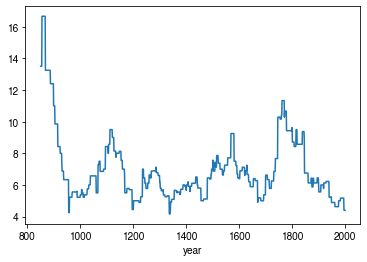

In [24]:
bcc_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=2).mean().plot()

In [25]:
np.shape(bcc_precip_lm_mdb.year)

(1151,)

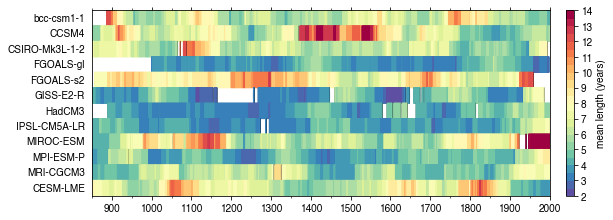

In [28]:
fig = plt.figure(figsize=(10,5))
gs = matplotlib.gridspec.GridSpec(2,1, height_ratios=[3,1])
ax = plt.subplot(gs[0])

# --- cmap etc
contour_levels = np.arange(2, 14.5, 0.5)
cmap = plt.cm.get_cmap('Spectral_r')
# contour_levels = np.arange(-0.5, 0.6, 0.1)
# cmap = plt.cm.get_cmap('RdBu_r')
norm = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=True)

shading = 'gouraud'

# plot - mean
min_periods=5
# what I'm plotting here...
bcc_plot = bcc_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).mean()
ccsm4_plot = ccsm4_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).mean()
csiro_plot = csiro_mk3l_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).mean()
fgoals_gl_plot = fgoals_gl_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).mean()
fgoals_s2_plot = fgoals_s2_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).mean()
giss28_plot = giss_28_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).mean()
hadcm3_plot = hadcm3_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).mean()
ipsl_plot = ipsl_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).mean()
miroc_plot = miroc_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).mean()
mpi_plot = mpi_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).mean()
mri_plot = mri_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).mean()
ff2_plot = ff2_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).mean()

p = ax.pcolormesh(bcc_precip_lm_mdb.year, [0, 1], [bcc_plot, bcc_plot], cmap=cmap, norm=norm, shading=shading)    
ax.pcolormesh(ccsm4_precip_lm_mdb.year,   [1, 2], [ccsm4_plot, ccsm4_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(csiro_mk3l_precip_lm_mdb.year, [2, 3], [csiro_plot, csiro_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(fgoals_gl_precip_lm_mdb.year, [3, 4], [fgoals_gl_plot, fgoals_gl_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(fgoals_s2_precip_lm_mdb.year, [4, 5], [fgoals_s2_plot, fgoals_s2_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(giss_28_precip_lm_mdb.year, [5, 6], [giss28_plot, giss28_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(hadcm3_precip_lm_mdb.year, [6, 7], [hadcm3_plot, hadcm3_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(ipsl_precip_lm_mdb.year,   [7, 8], [ipsl_plot, ipsl_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(miroc_precip_lm_mdb.year, [8, 9], [miroc_plot, miroc_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(mpi_precip_lm_mdb.year, [9, 10], [mpi_plot, mpi_plot], cmap=cmap,  norm=norm, shading=shading)
ax.pcolormesh(mri_precip_lm_mdb.year, [10, 11], [mri_plot, mri_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(ff2_precip_lm_mdb.year, [11, 12], [ff2_plot, ff2_plot], cmap=cmap, norm=norm, shading=shading)

cbar = plt.colorbar(p, aspect=25, ticks=np.arange(2,15,1), pad=0.03)
cbar.set_label('mean length (years)')

# ax.hlines(12.7,850,2000, linewidth=0.7, linestyle=':')
# ax.hlines(9.5,850,2000, linewidth=0.7, linestyle=':')
# ax.hlines(6.3,850,2000, linewidth=0.7, linestyle=':')
# ax.hlines(3.1,850,2000, linewidth=0.7, linestyle=':')


# custom labels
models = ['bcc-csm1-1', 'CCSM4', 'CSIRO-Mk3L-1-2', 'FGOALS-gl', 'FGOALS-s2', 
          'GISS-E2-R', 'HadCM3', 'IPSL-CM5A-LR', 'MIROC-ESM',   'MPI-ESM-P', 'MRI-CGCM3', 'CESM-LME',]


yticks_pos = np.arange(0.5, 12.5, 1)

# # yticks_pos

plt.yticks(yticks_pos, models, rotation=0, va='center')
plt.xticks(np.arange(900,2100,100))
plt.xlim(850,2000) 
plt.ylim(12, 0)
ax.set_xticks(np.arange(850,2000,50), minor=True)
ax.tick_params(axis='y',which='major', left='off', color='white')
ax.tick_params(axis='x',which='major', top='on', bottom='on')
ax.tick_params(axis='x',which='minor', top='on', bottom='on')

plt.savefig('mdb_droughts2s2e_movingaverage_101_mean.pdf', bbox_inches='tight')                                                   
plt.show()

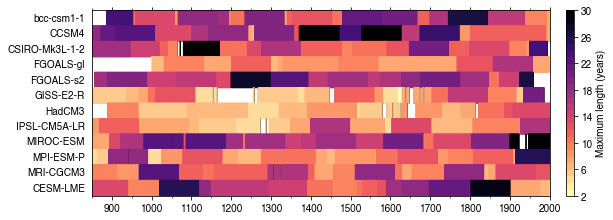

In [29]:
fig = plt.figure(figsize=(10,5))
gs = matplotlib.gridspec.GridSpec(2,1, height_ratios=[3,1])
ax = plt.subplot(gs[0])

# --- cmap etc
contour_levels = np.arange(2, 31, 1)
cmap = plt.cm.get_cmap('magma_r')

norm = BoundaryNorm(contour_levels, ncolors=cmap.N, clip=True)


shading = 'gouraud'

# plot - max
min_periods=5
# what I'm plotting here...
bcc_plot = bcc_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).max()
ccsm4_plot = ccsm4_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).max()
csiro_plot = csiro_mk3l_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).max()
fgoals_gl_plot = fgoals_gl_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).max()
fgoals_s2_plot = fgoals_s2_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).max()
giss28_plot = giss_28_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).max()
hadcm3_plot = hadcm3_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).max()
ipsl_plot = ipsl_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).max()
miroc_plot = miroc_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).max()
mpi_plot = mpi_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).max()
mri_plot = mri_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).max()
ff2_plot = ff2_precip_lm_mdb.droughts_2s2e.rolling(year=101, center=True, min_periods=min_periods).max()

p = ax.pcolormesh(bcc_precip_lm_mdb.year, [0, 1], [bcc_plot, bcc_plot], cmap=cmap, norm=norm, shading=shading)    
ax.pcolormesh(ccsm4_precip_lm_mdb.year,   [1, 2], [ccsm4_plot, ccsm4_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(csiro_mk3l_precip_lm_mdb.year, [2, 3], [csiro_plot, csiro_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(fgoals_gl_precip_lm_mdb.year, [3, 4], [fgoals_gl_plot, fgoals_gl_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(fgoals_s2_precip_lm_mdb.year, [4, 5], [fgoals_s2_plot, fgoals_s2_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(giss_28_precip_lm_mdb.year, [5, 6], [giss28_plot, giss28_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(hadcm3_precip_lm_mdb.year, [6, 7], [hadcm3_plot, hadcm3_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(ipsl_precip_lm_mdb.year,   [7, 8], [ipsl_plot, ipsl_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(miroc_precip_lm_mdb.year, [8, 9], [miroc_plot, miroc_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(mpi_precip_lm_mdb.year, [9, 10], [mpi_plot, mpi_plot], cmap=cmap,  norm=norm, shading=shading)
ax.pcolormesh(mri_precip_lm_mdb.year, [10, 11], [mri_plot, mri_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(ff2_precip_lm_mdb.year, [11, 12], [ff2_plot, ff2_plot], cmap=cmap, norm=norm, shading=shading)

cbar = plt.colorbar(p, aspect=25, ticks=np.arange(2,34,4), pad=0.03)
cbar.set_label('Maximum length (years)')
# ax.hlines(12.7,850,2000, linewidth=0.7, linestyle=':')
# ax.hlines(9.5,850,2000, linewidth=0.7, linestyle=':')
# ax.hlines(6.3,850,2000, linewidth=0.7, linestyle=':')
# ax.hlines(3.1,850,2000, linewidth=0.7, linestyle=':')


# custom labels
models = ['bcc-csm1-1', 'CCSM4', 'CSIRO-Mk3L-1-2', 'FGOALS-gl', 'FGOALS-s2', 
          'GISS-E2-R', 'HadCM3', 'IPSL-CM5A-LR', 'MIROC-ESM',   'MPI-ESM-P', 'MRI-CGCM3', 'CESM-LME',]


yticks_pos = np.arange(0.5, 12.5, 1)

# # yticks_pos

plt.yticks(yticks_pos, models, rotation=0, va='center')
plt.xticks(np.arange(900,2100,100))
plt.xlim(850,2000) 
plt.ylim(12, 0)
ax.set_xticks(np.arange(850,2000,50), minor=True)
ax.tick_params(axis='y',which='major', left='off', color='white')
ax.tick_params(axis='x',which='major', top='on', bottom='on')
ax.tick_params(axis='x',which='minor', top='on', bottom='on')
   
plt.savefig('mdb_droughts2s2e_movingaverage_101_max.pdf', bbox_inches='tight')         
plt.show()

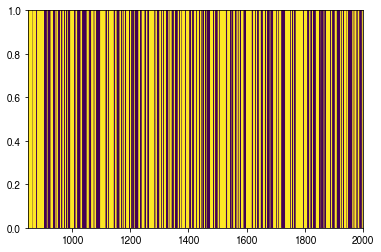

In [30]:
plt.pcolormesh(bcc_precip_lm_mdb.year, [0,1], [bcc_precip_lm_mdb.drought_years_2s2e, bcc_precip_lm_mdb.drought_years_2s2e], shading='gouraud')
plt.show()

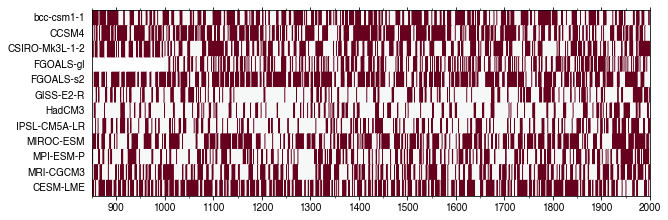

In [31]:
fig = plt.figure(figsize=(10,5))
gs = matplotlib.gridspec.GridSpec(2,1, height_ratios=[3,1])
ax = plt.subplot(gs[0])

# --- cmap etc
contour_levels = np.arange(-1, 2, 0.5)
cmap = plt.cm.get_cmap('RdBu_r')
# contour_levels = np.arange(-0.5, 0.6, 0.1)
# cmap = plt.cm.get_cmap('RdBu_r')
norm = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=True)

shading = 'gouraud'

# plot - mean
min_periods=101
# what I'm plotting here...
metric='drought_years_2s2e'
bcc_plot = bcc_precip_lm_mdb[metric]
ccsm4_plot = ccsm4_precip_lm_mdb[metric]
csiro_plot = csiro_mk3l_precip_lm_mdb[metric]
fgoals_gl_plot = fgoals_gl_precip_lm_mdb[metric]
fgoals_s2_plot = fgoals_s2_precip_lm_mdb[metric]
giss28_plot = giss_28_precip_lm_mdb[metric]
hadcm3_plot = hadcm3_precip_lm_mdb[metric]
ipsl_plot = ipsl_precip_lm_mdb[metric]
miroc_plot = miroc_precip_lm_mdb[metric]
mpi_plot = mpi_precip_lm_mdb[metric]
mri_plot = mri_precip_lm_mdb[metric]
ff2_plot = ff2_precip_lm_mdb[metric]

p = ax.pcolormesh(bcc_precip_lm_mdb.year, [0, 1], [bcc_plot, bcc_plot], cmap=cmap, norm=norm, shading=shading)    
ax.pcolormesh(ccsm4_precip_lm_mdb.year,   [1, 2], [ccsm4_plot, ccsm4_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(csiro_mk3l_precip_lm_mdb.year, [2, 3], [csiro_plot, csiro_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(fgoals_gl_precip_lm_mdb.year, [3, 4], [fgoals_gl_plot, fgoals_gl_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(fgoals_s2_precip_lm_mdb.year, [4, 5], [fgoals_s2_plot, fgoals_s2_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(giss_28_precip_lm_mdb.year, [5, 6], [giss28_plot, giss28_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(hadcm3_precip_lm_mdb.year, [6, 7], [hadcm3_plot, hadcm3_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(ipsl_precip_lm_mdb.year,   [7, 8], [ipsl_plot, ipsl_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(miroc_precip_lm_mdb.year, [8, 9], [miroc_plot, miroc_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(mpi_precip_lm_mdb.year, [9, 10], [mpi_plot, mpi_plot], cmap=cmap,  norm=norm, shading=shading)
ax.pcolormesh(mri_precip_lm_mdb.year, [10, 11], [mri_plot, mri_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(ff2_precip_lm_mdb.year, [11, 12], [ff2_plot, ff2_plot], cmap=cmap, norm=norm, shading=shading)

# cbar = plt.colorbar(p, aspect=25, ticks=np.arange(0,1.5,0.5), pad=0.03)
# cbar.set_label('mean length (years)')

# ax.hlines(12.7,850,2000, linewidth=0.7, linestyle=':')
# ax.hlines(9.5,850,2000, linewidth=0.7, linestyle=':')
# ax.hlines(6.3,850,2000, linewidth=0.7, linestyle=':')
# ax.hlines(3.1,850,2000, linewidth=0.7, linestyle=':')


# custom labels
models = ['bcc-csm1-1', 'CCSM4', 'CSIRO-Mk3L-1-2', 'FGOALS-gl', 'FGOALS-s2', 
          'GISS-E2-R', 'HadCM3', 'IPSL-CM5A-LR', 'MIROC-ESM',   'MPI-ESM-P', 'MRI-CGCM3', 'CESM-LME',]


yticks_pos = np.arange(0.5, 12.5, 1)

# # yticks_pos

plt.yticks(yticks_pos, models, rotation=0, va='center')
plt.xticks(np.arange(900,2100,100))
plt.xlim(850,2000) 
plt.ylim(12, 0)
ax.set_xticks(np.arange(850,2000,50), minor=True)
ax.tick_params(axis='y',which='major', left='off', color='white')
ax.tick_params(axis='x',which='major', top='on', bottom='on')
ax.tick_params(axis='x',which='minor', top='on', bottom='on')

plt.savefig('mdb_droughts2s2e_movingaverage_101_droughts.pdf', bbox_inches='tight')                                                   
plt.show()

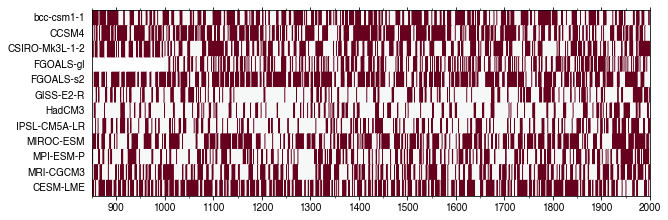

In [33]:
fig = plt.figure(figsize=(10,5))
gs = matplotlib.gridspec.GridSpec(2,1, height_ratios=[3,1])
ax = plt.subplot(gs[0])

# --- cmap etc
contour_levels = np.arange(-1, 2, 0.5)
cmap = plt.cm.get_cmap('RdBu_r')
# contour_levels = np.arange(-0.5, 0.6, 0.1)
# cmap = plt.cm.get_cmap('RdBu_r')
norm = BoundaryNorm(contour_levels, ncolors=cmaps.N, clip=True)

shading = 'gouraud'

# plot - mean
min_periods=101
# what I'm plotting here...
metric='drought_years_2s2e'
bcc_plot = bcc_precip_lm_mdb[metric]
ccsm4_plot = ccsm4_precip_lm_mdb[metric]
csiro_plot = csiro_mk3l_precip_lm_mdb[metric]
fgoals_gl_plot = fgoals_gl_precip_lm_mdb[metric]
fgoals_s2_plot = fgoals_s2_precip_lm_mdb[metric]
giss28_plot = giss_28_precip_lm_mdb[metric]
hadcm3_plot = hadcm3_precip_lm_mdb[metric]
ipsl_plot = ipsl_precip_lm_mdb[metric]
miroc_plot = miroc_precip_lm_mdb[metric]
mpi_plot = mpi_precip_lm_mdb[metric]
mri_plot = mri_precip_lm_mdb[metric]
ff2_plot = ff2_precip_lm_mdb[metric]

p = ax.pcolormesh(bcc_precip_lm_mdb.year, [0, 1], [bcc_plot, bcc_plot], cmap=cmap, norm=norm, shading=shading)    
ax.pcolormesh(ccsm4_precip_lm_mdb.year,   [1, 2], [ccsm4_plot, ccsm4_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(csiro_mk3l_precip_lm_mdb.year, [2, 3], [csiro_plot, csiro_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(fgoals_gl_precip_lm_mdb.year, [3, 4], [fgoals_gl_plot, fgoals_gl_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(fgoals_s2_precip_lm_mdb.year, [4, 5], [fgoals_s2_plot, fgoals_s2_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(giss_28_precip_lm_mdb.year, [5, 6], [giss28_plot, giss28_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(hadcm3_precip_lm_mdb.year, [6, 7], [hadcm3_plot, hadcm3_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(ipsl_precip_lm_mdb.year,   [7, 8], [ipsl_plot, ipsl_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(miroc_precip_lm_mdb.year, [8, 9], [miroc_plot, miroc_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(mpi_precip_lm_mdb.year, [9, 10], [mpi_plot, mpi_plot], cmap=cmap,  norm=norm, shading=shading)
ax.pcolormesh(mri_precip_lm_mdb.year, [10, 11], [mri_plot, mri_plot], cmap=cmap, norm=norm, shading=shading)
ax.pcolormesh(ff2_precip_lm_mdb.year, [11, 12], [ff2_plot, ff2_plot], cmap=cmap, norm=norm, shading=shading)

# cbar = plt.colorbar(p, aspect=25, ticks=np.arange(0,1.5,0.5), pad=0.03)
# cbar.set_label('mean length (years)')

# ax.hlines(12.7,850,2000, linewidth=0.7, linestyle=':')
# ax.hlines(9.5,850,2000, linewidth=0.7, linestyle=':')
# ax.hlines(6.3,850,2000, linewidth=0.7, linestyle=':')
# ax.hlines(3.1,850,2000, linewidth=0.7, linestyle=':')


# custom labels
models = ['bcc-csm1-1', 'CCSM4', 'CSIRO-Mk3L-1-2', 'FGOALS-gl', 'FGOALS-s2', 
          'GISS-E2-R', 'HadCM3', 'IPSL-CM5A-LR', 'MIROC-ESM',   'MPI-ESM-P', 'MRI-CGCM3', 'CESM-LME',]


yticks_pos = np.arange(0.5, 12.5, 1)

# # yticks_pos

plt.yticks(yticks_pos, models, rotation=0, va='center')
plt.xticks(np.arange(900,2100,100))
plt.xlim(850,2000) 
plt.ylim(12, 0)
ax.set_xticks(np.arange(850,2000,50), minor=True)
ax.tick_params(axis='y',which='major', left='off', color='white')
ax.tick_params(axis='x',which='major', top='on', bottom='on')
ax.tick_params(axis='x',which='minor', top='on', bottom='on')

plt.savefig('mdb_droughts2s2e_movingaverage_101_droughts_above_1sd.pdf', bbox_inches='tight')                                                   
plt.show()

# plot histograms of this

In [34]:
from matplotlib.ticker import ScalarFormatter

ar1 range
labels and legends
ar1 range
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 rang

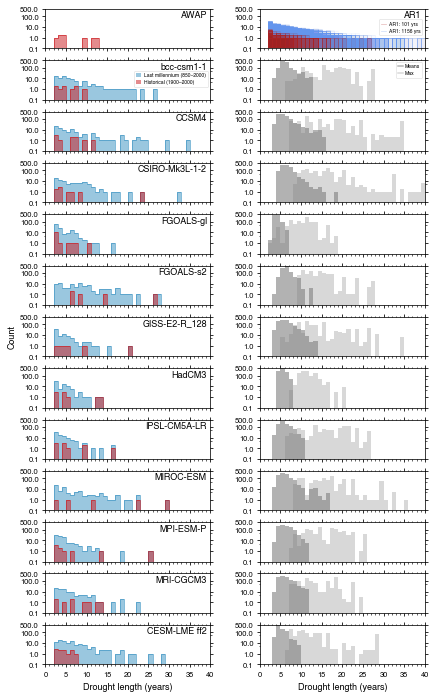

CPU times: user 3min 20s, sys: 4.28 s, total: 3min 24s
Wall time: 3min 32s


In [76]:
%%time

# plot histogram of drought lengths for historical
linewidth_border=0.75
mpl.rcParams['axes.linewidth'] = linewidth_border

fig = plt.figure(figsize=(6.8,13))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

rows = 14
cols = 2

text_x = 0.98
text_y = 0.73
label_fontsize=9
tick_fontsize=7.5
histogram_fill_color_hist='#cb181d'
histogram_fill_color_lm='#3690c0'

alpha_fill = 0.5
linewidth = 0.75
alpha_linewidth = 0.8

# ---- data
drought_type = 'droughts_2s2e'

subplot_title = ['AWAP', 'bcc-csm1-1', 'CCSM4', 'CSIRO-Mk3L-1-2', 'FGOALS-gl', 'FGOALS-s2', 'GISS-E2-R_128', 'HadCM3', 
                 'IPSL-CM5A-LR', 'MIROC-ESM',   'MPI-ESM-P', 'MRI-CGCM3', 'CESM-LME ff2', 'AR1']

# NEED TO REPLACE GISS all and FF all lm with hist
# need to bring in awap
data_hist = [awap_masked_annual_mdb[drought_type].dropna(dim='year').values,
             bcc_precip_hist_mdb[drought_type].dropna(dim='year').values,
        ccsm4_precip_hist_mdb[drought_type].dropna(dim='year').values,
        csiro_mk3l_precip_hist_mdb[drought_type].dropna(dim='year').values,
        fgoals_gl_precip_hist_mdb[drought_type].dropna(dim='year').values,
        fgoals_s2_precip_hist_mdb[drought_type].dropna(dim='year').values,
        giss_28_precip_hist_mdb[drought_type].dropna(dim='year').values,
        hadcm3_precip_hist_mdb[drought_type].dropna(dim='year').values,
        ipsl_precip_hist_mdb[drought_type].dropna(dim='year').values,
        miroc_precip_hist_mdb[drought_type].dropna(dim='year').values,
        mpi_precip_hist_mdb[drought_type].dropna(dim='year').values,
        mri_precip_hist_mdb[drought_type].dropna(dim='year').values,
        ff2_precip_hist_mdb[drought_type].dropna(dim='year').values]

data_lm = [awap_masked_annual_mdb[drought_type].dropna(dim='year').values,
           bcc_precip_lm_mdb[drought_type].dropna(dim='year').values,
        ccsm4_precip_lm_mdb[drought_type].dropna(dim='year').values,
        csiro_mk3l_precip_lm_mdb[drought_type].dropna(dim='year').values,
        fgoals_gl_precip_lm_mdb[drought_type].dropna(dim='year').values,
        fgoals_s2_precip_lm_mdb[drought_type].dropna(dim='year').values,
        giss_28_precip_lm_mdb[drought_type].dropna(dim='year').values,
        hadcm3_precip_lm_mdb[drought_type].dropna(dim='year').values,
        ipsl_precip_lm_mdb[drought_type].dropna(dim='year').values,
        miroc_precip_lm_mdb[drought_type].dropna(dim='year').values,
        mpi_precip_lm_mdb[drought_type].dropna(dim='year').values,
        mri_precip_lm_mdb[drought_type].dropna(dim='year').values,
        ff2_precip_lm_mdb[drought_type].dropna(dim='year').values]

data_boots = [awap_masked_annual_mdb[drought_type].dropna(dim='year').values,
              bcc_boot_mdb[drought_type], 
              ccsm4_boot_mdb[drought_type],
              csiro_mk3l_boot_mdb[drought_type],
              fgoals_gl_boot_mdb[drought_type],
              fgoals_s2_boot_mdb[drought_type],
              giss_21_boot_mdb[drought_type],
              hadcm3_boot_mdb[drought_type],
              ipsl_boot_mdb[drought_type],
              miroc_boot_mdb[drought_type],
              mpi_boot_mdb[drought_type],
              mri_boot_mdb[drought_type],
              ff2_boot_mdb[drought_type]]

data_ar1 = [ar1_101_0075[drought_type]]

data_ar1_1151 = [ar1_1151_0075[drought_type]]

# set bins
bins = np.arange(0,41,1)

density=False
cumulative=False
log=True
# 



# density = gaussian_kde(bcc_precip_hist_mdb[drought_type].dropna(dim='year').values)
# xs = np.arange(0,41,0.5) # np.linspace(0,40,40)

# density.covariance_factor = lambda : .25
# density._compute_covariance()
# plt.plot(xs, density(xs))
# bins = np.arange(0,41,1)


def plot_things(i):
    

    if i > 1 and i <= 25 and i % 2 == 1 :
#         for j in range(len(data_boots[i][:,0])):
#         hist = data_boots[i].dropna(dim='year').values
        ax.hist(data_boots[i//2].mean(dim='year'), bins=bins, alpha=0.3, density=density, cumulative=cumulative, log=log, color='k')
        ax.hist(data_boots[i//2].max(dim='year'), bins=bins, alpha=0.3, density=density, cumulative=cumulative, log=log, color='grey')
    
    # ---- lm plot
    if i > 1 and  i <= 25 and i % 2 == 0:
        # histogram
        ax.hist(data_lm[i//2], bins=bins, color=histogram_fill_color_lm, alpha=alpha_fill, density=density,  cumulative=cumulative, log=log, label='Last millennium (850–2000)')
        ax.hist(data_lm[i//2], bins=bins, histtype='step', color=histogram_fill_color_lm, alpha=alpha_linewidth, density=density,  cumulative=cumulative, log=log, linewidth=linewidth)
        
        # kde
#         density = gaussian_kde(data_lm[i],bw_method = 0.1)
#         density.covariance_factor = lambda : .25
#         density._compute_covariance()
#         plt.plot(bins, gaussian_kde(data_lm[i])(bins), color=histogram_fill_color_lm, linewidth=1.5, alpha=0.7)
#         plt.plot(bins, density(bins), color=histogram_fill_color_lm, linewidth=1.5, alpha=0.7)
        
    if i % 2 == 0:
        # historical plot
        ax.hist(data_hist[i//2], bins=bins, color=histogram_fill_color_hist, alpha=alpha_fill, density=density, cumulative=cumulative, log=log, label='Historical (1900–2000)')
        ax.hist(data_hist[i//2], bins=bins, histtype='step', color=histogram_fill_color_hist, alpha=alpha_linewidth, density=density,  cumulative=cumulative, log=log, linewidth=linewidth)

#         density = gaussian_kde(data[i],bw_method = 0.1)
#         plt.plot(bins, density(bins), color=histogram_fill_color_hist, linewidth=1.5, alpha=0.7)
        
    print('ar1 range')

    if i == 1:
        for l in range(len(data_ar1_1151)):
            
            count_collection = []
            for m in range(len(data_ar1_1151[l])):
                hist = data_ar1_1151[l][m,:].dropna(dim='year').values
                count, division = np.histogram(hist, bins=bins) 
                count_collection.append(count)
                ax.hist(hist, bins=bins, color='cornflowerblue', alpha=0.01, density=density, cumulative=cumulative, log=log)
                ax.hist(hist, bins=bins, color='cornflowerblue', histtype='step', alpha=0.05, density=density, cumulative=cumulative, log=log)
            
#             print(np.shape(count_collection))
#             count_collection = np.array(count_collection)
#             mx = np.max(count_collection,0)
#             mn = np.min(count_collection,0)
#             sm = np.sum(count_collection, 0)
            
#             n90 = np.quantile(count_collection, 0.9, axis=0)
#             n10 = np.quantile(count_collection, 0.1, axis=0)
            
            
#             # transform into step
# #             left,right = bins[:-1],bins[1:]
# #             X = np.array([left,right]).T.flatten()
            
# #             leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='#2171b5', alpha=0.5, linewidth=0.75)
# #             ax.plot(X, np.array([mn,mn]).T.flatten(), color='#2171b5', alpha=0.5, linewidth=0.75)
# #             leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='#9ecae1', alpha=0.5, linewidth=0.75)
            
# #             ax.hist(n90, bins=bins, color='#9ecae1', alpha=0.5, density=True, cumulative=cumulative, log=log)
# #             ax.hist(n90, bins=bins, histtype='step', color='#9ecae1', alpha=1, density=True,  cumulative=cumulative, log=log)
    
# #             density = gaussian_kde(np.array([n90, n90]).T.flatten(), bw_method = 0.2)
#             #         density.covariance_factor = lambda : .1
#             #         density._compute_covariance()
#             #         plt.plot(bins, gaussian_kde(data[i])(bins), color=histogram_fill_color_hist, linewidth=1.5, alpha=0.7)
# #             plt.plot(bins, density(bins), color='#9ecae1', linewidth=1.5, alpha=0.7)
            
#             ax.hist(mx, bins=bins, color='k', alpha=alpha_fill, density=density, cumulative=cumulative, log=log)
# #             ax.hist(mx, bins=bins, histtype='step', color='k', alpha=1, density=True,  cumulative=cumulative, log=log)


# #             density = gaussian_kde(mx, bw_method = 0.2)
# #             plt.plot(bins, density(bins), color='k')

# #             print(np.shape(count_collection.flatten()))
# #             density = gaussian_kde(count_collection.flatten(), bw_method = 0.2)
# #             print('plot')
# #             plt.plot(bins, density(bins), color='g')
            
#             ax.hist(sm, bins=bins, color='r', alpha=alpha_fill, density=density, cumulative=cumulative, log=log)
# #             ax.hist(sm, bins=bins, histtype='step', color='r', alpha=1, density=True,  cumulative=cumulative, log=log)

# #             density = gaussian_kde(sm, bw_method=0.1)
# #             plt.plot(bins, density(bins), color='r')

        
#         y = ar1_1151_0075.droughts_2s2e.values.flatten()
#         x = y[~np.isnan(y)]
#         density = gaussian_kde(x, bw_method=0.2)
#         plt.plot(bins, density(bins), color='yellow')   
      
    
    # plot ar1 range
    if i == 1:
        # hist
        for k in range(len(data_ar1)):
            count_collection = []
            print(k)
            for j in range(len(data_ar1[k][0,:])):
                print(j)
                hist = data_ar1[k][j,:].dropna(dim='year').values
                count, division = np.histogram(hist, bins=bins)
                count_collection.append(count)
                ax.hist(hist, bins=bins, color='firebrick', alpha=0.05, density=density, cumulative=cumulative, log=log)
                ax.hist(hist, bins=bins, color='firebrick', histtype='step', alpha=0.1, density=density, cumulative=cumulative, log=log)
            
#             count_collection = np.array(count_collection)
# #             print(count_collection)
#             mx = np.max(count_collection,0)
# #             print(mx)
#             mn = np.min(count_collection,0)
#             sm = np.sum(count_collection, 0)
            
#             n90 = np.quantile(count_collection, 0.9, axis=0)
#             n10 = np.quantile(count_collection, 0.1, axis=0)
            
#             # transform into step
#             left,right = bins[:-1],bins[1:]
#             X = np.array([left,right]).T.flatten()
            
            
#             leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='k', alpha=0.5, linewidth=0.75)
#             ax.plot(X, np.array([mn,mn]).T.flatten(), color='k', alpha=0.5, linewidth=0.75)
#             leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='grey', alpha=0.5, linewidth=0.75)

        leg_ar_hist, = ax.plot([0, -1],[0, 0], color='firebrick', alpha=0.3, linewidth=0.75, label='AR1: 101 yrs')
        leg_ar_lm, = ax.plot([0, -1],[0, 0], color='cornflowerblue', alpha=0.3, linewidth=0.75, label='AR1: 1156 yrs')

        leg = ax.legend(fontsize=5, 
                handlelength=1, handletextpad=0.5,  loc='upper right', 
                labelspacing=0.4, 
               bbox_to_anchor=(1,0.8))
        leg.get_frame().set_linewidth(0.5) 

      
    
    # xaxis
    plt.xlim(0,40)
    plt.xticks(np.arange(0, 45, 5), fontsize=tick_fontsize)
    xticks_minor_spacing = np.arange(0, 41, 1)
    ax.set_xticks(xticks_minor_spacing, minor=True)
    
    # yaxis
#     plt.ylim(0.1,20)
#     plt.yticks(np.arange(0, 25, 5), fontsize=tick_fontsize)
#     yticks_minor_spacing = np.arange(0, 21, 1)
#     ax.set_yticks(yticks_minor_spacing, minor=True)

#     plt.ylim(0,0.2)
#     plt.yticks(np.arange(0, 0.3, 0.1), fontsize=tick_fontsize)
#     yticks_minor_spacing = np.arange(0, 0.20, 0.05)
#     ax.set_yticks(yticks_minor_spacing, minor=True)
    
    plt.yscale('log')
    plt.ylim(0.1, 500)
    plt.yticks([0.1, 1, 10, 100, 500], fontsize=tick_fontsize)
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.set_yticks([5,50], minor=True)
    
    # other things
    plt.tick_params(which = 'major', length=3)
    plt.tick_params(which = 'minor', length=1.5)
    
    if i == 12:
#         plt.xlabel("Drought length", fontsize=label_fontsize)  
        plt.ylabel("Count", fontsize=label_fontsize)
    elif i >=24:
        plt.xlabel("Drought length (years)", fontsize=label_fontsize)  
    
    if i > 1:
        ax.xaxis.set_ticks_position('both')
    
    ax.yaxis.set_ticks_position('both')
    
    if i % 2 == 0:
        title = ax.text(text_x, text_y, subplot_title[i // 2], transform=ax.transAxes, 
                    horizontalalignment='right', verticalalignment='bottom', 
                    fontweight='normal', fontstyle='oblique', fontsize=label_fontsize)
    if i == 1:
        title = ax.text(text_x, text_y, 'AR1', transform=ax.transAxes, 
                    horizontalalignment='right', verticalalignment='bottom', 
                    fontweight='normal', fontstyle='oblique', fontsize=label_fontsize)
    
    if i < 24:
        for label in ax.get_xticklabels():
            label.set_visible(False)
    
    print('labels and legends')
    if i == 2:
        leg = ax.legend(fontsize=5, 
                handlelength=1, handletextpad=0.5,  loc='lower right', 
                labelspacing=0.4, 
               bbox_to_anchor=(1,0.27))
        leg.get_frame().set_linewidth(0.5)
    if i == 3:
        leg_bmx, = ax.plot([0, -1],[0, 0], color='k', alpha=0.3,  label='Means')
        leg_bn90, = ax.plot([0, -1],[0, 0], color='grey', alpha=0.3, label='Max')

        leg = ax.legend(fontsize=5, 
                handlelength=1, handletextpad=0.5,  loc='lower right', 
                labelspacing=0.4, 
               bbox_to_anchor=(1,0.5))
        leg.get_frame().set_linewidth(0.5)        

# --- start plotting

for i in range(len(data_hist) *2):
    ax=plt.subplot(rows, cols, i + 1)
    plot_things(i)
    
    

plt.savefig('MDB_%s.pdf' % (drought_type), dpi=300, bbox_inches='tight')
# plt.savefig('%s/MDB_%s_hist.png' % (input_dir, drought_type), dpi=300, bbox_inches='tight')
plt.show()

In [48]:
# bootstrap plot

data_boots = [bcc_boot_mdb[drought_type], 
              ccsm4_boot_mdb[drought_type],
              csiro_mk3l_boot_mdb[drought_type],
              fgoals_gl_boot_mdb[drought_type],
              fgoals_s2_boot_mdb[drought_type],
              giss_21_boot_mdb[drought_type],
              hadcm3_boot_mdb[drought_type],
              ipsl_boot_mdb[drought_type],
              miroc_boot_mdb[drought_type],
              mpi_boot_mdb[drought_type],
              mri_boot_mdb[drought_type],
              ff2_boot_mdb[drought_type]]

i = 0

count_collection = []
for j in range(len(data_boots[i][:,0])):
    hist = data_boots[i][j,:].dropna(dim='year').values
    ax.hist(hist, bins=bins, alpha=0.01, density=density, color='#bdbdbd')

    count, division = np.histogram(hist, bins=bins) 
    count_collection.append(count)
    
count_collection = np.array(count_collection)
mx = np.max(count_collection,0)
mn = np.min(count_collection,0)
    
n90 = np.quantile(count_collection, 0.9, axis=0)
n10 = np.quantile(count_collection, 0.1, axis=0)

# transform into step
left,right = bins[:-1],bins[1:]
X = np.array([left,right]).T.flatten()

#   leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='k', linewidth=0.75, label='101-yr bootstrap range')
#   ax.plot(X, np.array([mn,mn]).T.flatten(), color='k', linewidth=0.75)
#   leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='grey', linewidth=0.75, label='101-yr bootstrap 90%')

# ax.hist(mx, bins=bins, color='k', alpha=alpha_fill, density=True, cumulative=cumulative, log=log)
# ax.hist(n90, bins=bins, color='k', alpha=alpha_fill, density=True, cumulative=cumulative, log=log)
#   density = gaussian_kde(mx,bw_method = 0.1)
# plt.plot(bins, density(bins), color='k', linewidth=1.5, alpha=0.7)
#   density = gaussian_kde(n90, bw_method = 0.1)
# plt.plot(bins, density(bins), color='grey', linewidth=1.5, alpha=0.7)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,  27.,  70., 170.,
        217., 192., 120.,  61.,  30.,  41.,  21.,   9.,  19.,  20.,  17.,
         12.,   0.,   9.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
        22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
        27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
        33

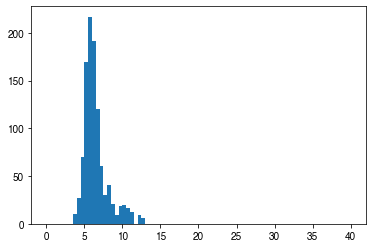

In [35]:
plt.hist(data_boots[i].mean(dim='year'), bins=bins)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   6.,   0.,   6.,   0.,   8.,   0.,  29.,   0., 114.,   0.,
         49.,   0.,  35.,   0.,  13.,   0.,   7.,   0., 180.,   0.,  60.,
          0.,  39.,   0.,  91.,   0., 124.,   0.,  87.,   0.,  82.,   0.,
          3.,   0.,  40.,   0.,   2.,   0.,   0.,   0.,   6.,   0.,  70.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
        22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
        27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
        33

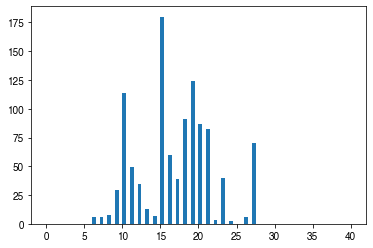

In [34]:
plt.hist(data_boots[i].max(dim='year'), bins=bins)

In [63]:
data_ar1_1151

[<xarray.DataArray 'droughts_2s2e' (n: 1000, year: 1151)>
 array([[nan, nan, nan, ..., nan,  8., nan],
        [nan, nan, nan, ..., nan, nan, 15.],
        [nan, nan, nan, ..., nan,  4., nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan,  2.]])
 Coordinates:
   * year      (year) int64 1 2 3 4 5 6 7 ... 1145 1146 1147 1148 1149 1150 1151
     quantile  float64 0.5
 Dimensions without coordinates: n]

In [99]:
np.shape(ar1_1151_0075.droughts_2s2e.values.flatten())

(1151000,)

In [111]:
y = ar1_1151_0075.droughts_2s2e.values.flatten()
np.shape(y)

(1151000,)

In [112]:
x = y[~np.isnan(y)]
np.shape(x)

(96394,)

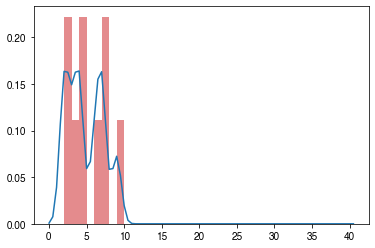

In [38]:
# density plot

from scipy.stats import gaussian_kde
density = gaussian_kde(bcc_precip_hist_mdb[drought_type].dropna(dim='year').values)
xs = np.arange(0,41,0.5) # np.linspace(0,40,40)

density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs, density(xs))
bins = np.arange(0,41,1)
plt.hist(bcc_precip_hist_mdb[drought_type].dropna(dim='year').values, bins=bins, color=histogram_fill_color_hist, alpha=0.5, density=True, cumulative=cumulative, log=log, label='Historical (1900–2000)')
plt.show()

# data = [bcc_precip_hist_mdb[drought_type].dropna(dim='year').values,
#         ccsm4_precip_hist_mdb[drought_type].dropna(dim='year').values,
#         csiro_mk3l_precip_hist_mdb[drought_type].dropna(dim='year').values,
#         fgoals_gl_precip_hist_mdb[drought_type].dropna(dim='year').values,
#         fgoals_s2_precip_hist_mdb[drought_type].dropna(dim='year').values,
#         giss_21_precip_hist_mdb[drought_type].dropna(dim='year').values,
#         hadcm3_precip_hist_mdb[drought_type].dropna(dim='year').values,
#         ipsl_precip_hist_mdb[drought_type].dropna(dim='year').values,
#         miroc_precip_hist_mdb[drought_type].dropna(dim='year').values,
#         mpi_precip_hist_mdb[drought_type].dropna(dim='year').values,
#         mri_precip_hist_mdb[drought_type].dropna(dim='year').values,
#         ff2_precip_hist_mdb[drought_type].dropna(dim='year').values,
#         awap_masked_annual_mdb[drought_type].dropna(dim='year').values]

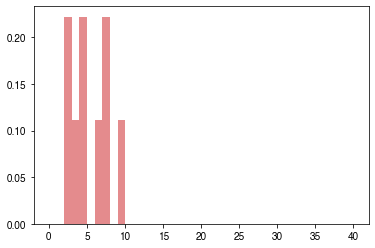

In [26]:
xs

array([ 0.        ,  0.20100503,  0.40201005,  0.60301508,  0.8040201 ,
        1.00502513,  1.20603015,  1.40703518,  1.6080402 ,  1.80904523,
        2.01005025,  2.21105528,  2.4120603 ,  2.61306533,  2.81407035,
        3.01507538,  3.2160804 ,  3.41708543,  3.61809045,  3.81909548,
        4.0201005 ,  4.22110553,  4.42211055,  4.62311558,  4.8241206 ,
        5.02512563,  5.22613065,  5.42713568,  5.6281407 ,  5.82914573,
        6.03015075,  6.23115578,  6.4321608 ,  6.63316583,  6.83417085,
        7.03517588,  7.2361809 ,  7.43718593,  7.63819095,  7.83919598,
        8.04020101,  8.24120603,  8.44221106,  8.64321608,  8.84422111,
        9.04522613,  9.24623116,  9.44723618,  9.64824121,  9.84924623,
       10.05025126, 10.25125628, 10.45226131, 10.65326633, 10.85427136,
       11.05527638, 11.25628141, 11.45728643, 11.65829146, 11.85929648,
       12.06030151, 12.26130653, 12.46231156, 12.66331658, 12.86432161,
       13.06532663, 13.26633166, 13.46733668, 13.66834171, 13.86

## PLOT

ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends
ar1 range
labels and legends


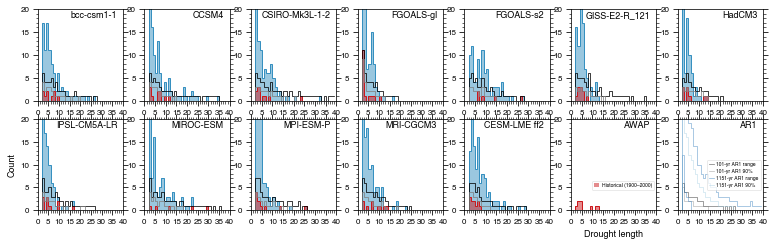

CPU times: user 2min 19s, sys: 11.6 s, total: 2min 30s
Wall time: 2min 31s


In [32]:
%%time

# plot histogram of drought lengths for historical
linewidth_border=0.75
mpl.rcParams['axes.linewidth'] = linewidth_border

fig = plt.figure(figsize=(13,3.7))
plt.subplots_adjust(wspace=0.25)

rows = 2
cols = 7

text_x = 0.93
text_y = 0.885
label_fontsize=9
tick_fontsize=8
histogram_fill_color_hist='#cb181d'
histogram_fill_color_lm='#3690c0'


# ---- data
drought_type = 'droughts_2s2e'

subplot_title = ['bcc-csm1-1', 'CCSM4', 'CSIRO-Mk3L-1-2', 'FGOALS-gl', 'FGOALS-s2', 'GISS-E2-R_121', 'HadCM3', 
                 'IPSL-CM5A-LR', 'MIROC-ESM',   'MPI-ESM-P', 'MRI-CGCM3', 'CESM-LME ff2', 'AWAP', 'AR1']

# NEED TO REPLACE GISS all and FF all lm with hist
# need to bring in awap
data = [bcc_precip_hist_mdb[drought_type].dropna(dim='year').values,
        ccsm4_precip_hist_mdb[drought_type].dropna(dim='year').values,
        csiro_mk3l_precip_hist_mdb[drought_type].dropna(dim='year').values,
        fgoals_gl_precip_hist_mdb[drought_type].dropna(dim='year').values,
        fgoals_s2_precip_hist_mdb[drought_type].dropna(dim='year').values,
        giss_21_precip_hist_mdb[drought_type].dropna(dim='year').values,
        hadcm3_precip_hist_mdb[drought_type].dropna(dim='year').values,
        ipsl_precip_hist_mdb[drought_type].dropna(dim='year').values,
        miroc_precip_hist_mdb[drought_type].dropna(dim='year').values,
        mpi_precip_hist_mdb[drought_type].dropna(dim='year').values,
        mri_precip_hist_mdb[drought_type].dropna(dim='year').values,
        ff2_precip_hist_mdb[drought_type].dropna(dim='year').values,
        awap_masked_annual_mdb[drought_type].dropna(dim='year').values]

data_lm = [bcc_precip_lm_mdb[drought_type].dropna(dim='year').values,
        ccsm4_precip_lm_mdb[drought_type].dropna(dim='year').values,
        csiro_mk3l_precip_lm_mdb[drought_type].dropna(dim='year').values,
        fgoals_gl_precip_lm_mdb[drought_type].dropna(dim='year').values,
        fgoals_s2_precip_lm_mdb[drought_type].dropna(dim='year').values,
        giss_21_precip_lm_mdb[drought_type].dropna(dim='year').values,
        hadcm3_precip_lm_mdb[drought_type].dropna(dim='year').values,
        ipsl_precip_lm_mdb[drought_type].dropna(dim='year').values,
        miroc_precip_lm_mdb[drought_type].dropna(dim='year').values,
        mpi_precip_lm_mdb[drought_type].dropna(dim='year').values,
        mri_precip_lm_mdb[drought_type].dropna(dim='year').values,
        ff2_precip_lm_mdb[drought_type].dropna(dim='year').values]

data_boots = [bcc_boot_mdb[drought_type], 
              ccsm4_boot_mdb[drought_type],
              csiro_mk3l_boot_mdb[drought_type],
              fgoals_gl_boot_mdb[drought_type],
              fgoals_s2_boot_mdb[drought_type],
              giss_21_boot_mdb[drought_type],
              hadcm3_boot_mdb[drought_type],
              ipsl_boot_mdb[drought_type],
              miroc_boot_mdb[drought_type],
              mpi_boot_mdb[drought_type],
              mri_boot_mdb[drought_type],
              ff2_boot_mdb[drought_type]]

data_ar1 = [ar1_101_0075[drought_type]]

data_ar1_1151 = [ar1_1151_0075[drought_type]]

# set bins
bins = np.arange(0,40,1)

density=False
cumulative=False
log=False
# 
def plot_things(i):
    
    # bootstrap plot
    if i <= 11:
        count_collection = []
        for j in range(len(data_boots[i][:,0])):
                hist = data_boots[i][j,:].dropna(dim='year').values
#                 ax.hist(hist, bins=bins, alpha=0.01, density=density, color='#bdbdbd')

                count, division = np.histogram(hist, bins=bins) 
                count_collection.append(count)
            
        count_collection = np.array(count_collection)
        mx = np.max(count_collection,0)
        mn = np.min(count_collection,0)
            
        n90 = np.quantile(count_collection, 0.9, axis=0)
        n10 = np.quantile(count_collection, 0.1, axis=0)
        
        # transform into step
        left,right = bins[:-1],bins[1:]
        X = np.array([left,right]).T.flatten()
        
        leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='k', linewidth=0.75, label='101-yr bootstrap range')
        ax.plot(X, np.array([mn,mn]).T.flatten(), color='k', linewidth=0.75)
        leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='grey', linewidth=0.75, label='101-yr bootstrap 90%')
    
    # lm plot
    if i <= 11:
        ax.hist(data_lm[i], bins=bins, color=histogram_fill_color_lm, alpha=0.5, density=density,  cumulative=cumulative, log=log, label='Last millennium (850–2000)')
        ax.hist(data_lm[i], bins=bins, histtype='step', color=histogram_fill_color_lm, alpha=1, density=density,  cumulative=cumulative, log=log)
    
    if i < 13:
        # historical plot
        ax.hist(data[i], bins=bins, color=histogram_fill_color_hist, alpha=0.5, density=density, cumulative=cumulative, log=log, label='Historical (1900–2000)')
        ax.hist(data[i], bins=bins, histtype='step', color=histogram_fill_color_hist, alpha=1, density=density,  cumulative=cumulative, log=log)
    
    print('ar1 range')
    # plot ar1 range
    if i >= 13:
        
        for k in range(len(data_ar1)):
            count_collection = []
            for j in range(len(data_ar1[k][0,:])):
                hist = data_ar1[k][j,:].dropna(dim='year').values
                count, division = np.histogram(hist, bins=bins) 
                count_collection.append(count)
            
            count_collection = np.array(count_collection)
            mx = np.max(count_collection,0)
            mn = np.min(count_collection,0)
                
            n90 = np.quantile(count_collection, 0.9, axis=0)
            n10 = np.quantile(count_collection, 0.1, axis=0)
            
            # transform into step
            left,right = bins[:-1],bins[1:]
            X = np.array([left,right]).T.flatten()
            
            leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='k', alpha=0.5, linewidth=0.75)
            ax.plot(X, np.array([mn,mn]).T.flatten(), color='k', alpha=0.5, linewidth=0.75)
            leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='grey', alpha=0.5, linewidth=0.75)
    if i >= 13:
        for l in range(len(data_ar1_1151)):
            count_collection = []
            for m in range(len(data_ar1_1151[l])):
                hist = data_ar1_1151[l][m,:].dropna(dim='year').values
                count, division = np.histogram(hist, bins=bins) 
                count_collection.append(count)
            
            count_collection = np.array(count_collection)
            mx = np.max(count_collection,0)
            mn = np.min(count_collection,0)
                
            n90 = np.quantile(count_collection, 0.9, axis=0)
            n10 = np.quantile(count_collection, 0.1, axis=0)
            
            # transform into step
            left,right = bins[:-1],bins[1:]
            X = np.array([left,right]).T.flatten()
            
            leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='#2171b5', alpha=0.5, linewidth=0.75)
            ax.plot(X, np.array([mn,mn]).T.flatten(), color='#2171b5', alpha=0.5, linewidth=0.75)
            leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='#9ecae1', alpha=0.5, linewidth=0.75)
    
    
    
    # xaxis
    plt.xlim(0,40)
    plt.xticks(np.arange(0, 45, 5), fontsize=tick_fontsize)
    xticks_minor_spacing = np.arange(0, 41, 1)
    ax.set_xticks(xticks_minor_spacing, minor=True)
    
    # yaxis
    plt.ylim(0,20)
    plt.yticks(np.arange(0, 25, 5), fontsize=tick_fontsize)
    yticks_minor_spacing = np.arange(0, 21, 1)
    ax.set_yticks(yticks_minor_spacing, minor=True)

#     plt.ylim(0,0.5)
#     plt.yticks(np.arange(0, 0.6, 0.1), fontsize=tick_fontsize)
#     yticks_minor_spacing = np.arange(0, 0.5, 0.05)
#     ax.set_yticks(yticks_minor_spacing, minor=True)
    
    # other things
    plt.tick_params(which = 'major', length=5)
    plt.tick_params(which = 'minor', length=2.5)
    
    if i == 7:
#         plt.xlabel("Drought length", fontsize=label_fontsize)  
        plt.ylabel("Count", fontsize=label_fontsize)
    elif i == 12:
        plt.xlabel("Drought length", fontsize=label_fontsize)  
    
    if i >= 7:
        ax.xaxis.set_ticks_position('both')
    
    if i != 4 or i != 9 or i != 13:
        ax.yaxis.set_ticks_position('both')
    
    title = ax.text(text_x, text_y, subplot_title[i], transform=ax.transAxes, 
                    horizontalalignment='right', verticalalignment='bottom', 
                    fontweight='normal', fontstyle='oblique', fontsize=label_fontsize)
    
    print('labels and legends')
    if i == 12:
#         leg_bmx, = ax.plot([0, 1],[0, 0], color='k', linewidth=0.75, label='101-yr bootstrap range')
#         leg_bn90, = ax.plot([0, 1],[0, 0], color='grey', linewidth=0.75, label='101-yr bootstrap 90%')
    
#         legend_elements=[(leg_hist, leg_hist_line), (leg_lm, leg_lm_line), leg_bmx, leg_bn90]
#         names = ['Historical (1900–2000)',
#          'Last millennium (850–2000)',
#          '101-yr bootstrap range',         
#          '101-yr bootstrap 90th percentile']
        leg = ax.legend(fontsize=5, 
                handlelength=1, handletextpad=0.5,  loc='lower right', 
                labelspacing=0.4, 
               bbox_to_anchor=(1,0.2))
        leg.get_frame().set_linewidth(0.5)
    if i == 13:
        leg_bmx, = ax.plot([0, -1],[0, 0], color='k', alpha=0.5, linewidth=0.75, label='101-yr AR1 range')
        leg_bn90, = ax.plot([0, -1],[0, 0], color='grey', alpha=0.5, linewidth=0.75, label='101-yr AR1 90%')
        leg_bmx, = ax.plot([0, -1],[0, 0], color='#2171b5', alpha=0.5, linewidth=0.75, label='1151-yr AR1 range')
        leg_bn90, = ax.plot([0, -1],[0, 0], color='#9ecae1', alpha=0.5, linewidth=0.75, label='1151-yr AR1 90%')

        leg = ax.legend(fontsize=5, 
                handlelength=1, handletextpad=0.5,  loc='lower right', 
                labelspacing=0.4, 
               bbox_to_anchor=(1,0.2))
        leg.get_frame().set_linewidth(0.5)        

# --- start plotting

for i in range(len(data) + 1):
    ax=plt.subplot(rows, cols, i + 1)
    plot_things(i)
    
    

plt.savefig('%s/MDB_%s_hist.pdf' % (input_dir, drought_type), dpi=300, bbox_inches='tight')
plt.savefig('%s/MDB_%s_hist.png' % (input_dir, drought_type), dpi=300, bbox_inches='tight')
plt.show()

In [26]:
%%time

# plot histogram of drought lengths for historical
linewidth_border=0.75
mpl.rcParams['axes.linewidth'] = linewidth_border

fig = plt.figure(figsize=(13,7))
plt.subplots_adjust(wspace=0.25)

rows = 3
cols = 5

text_x = 0.93
text_y = 0.885
label_fontsize=9
tick_fontsize=8
histogram_fill_color_hist='#cb181d'
histogram_fill_color_lm='#3690c0'


# ---- data
drought_type = 'droughts_median'

subplot_title = ['bcc-csm1-1', 'CCSM4', 'CSIRO-Mk3L-1-2', 'FGOALS-gl', 'FGOALS-s2', 'GISS-E2-R_121', 'HadCM3', 
                 'IPSL-CM5A-LR', 'MIROC-ESM',   'MPI-ESM-P', 'MRI-CGCM3', 'CESM-LME ff2', 'GISS-E2-R mean', 'CESM-LME mean', 'AWAP']

# NEED TO REPLACE GISS all and FF all lm with hist
# need to bring in awap
data = [bcc_precip_hist_southern_aus[drought_type].dropna(dim='year').values,
        ccsm4_precip_hist_southern_aus[drought_type].dropna(dim='year').values,
        csiro_mk3l_precip_hist_southern_aus[drought_type].values,
        fgoals_gl_precip_hist_southern_aus[drought_type].values,
        fgoals_s2_precip_hist_southern_aus[drought_type].values,
        giss_21_precip_hist_southern_aus[drought_type].values,
        hadcm3_precip_hist_southern_aus[drought_type].values,
        ipsl_precip_hist_southern_aus[drought_type].values,
        miroc_precip_hist_southern_aus[drought_type].values,
        mpi_precip_hist_southern_aus[drought_type].values,
        mri_precip_hist_southern_aus[drought_type].values,
        ff2_precip_hist_southern_aus[drought_type].values,
        giss_all_precip_hist_southern_aus[drought_type].values,
        ff_all_precip_hist_southern_aus[drought_type].values,
        awap_masked_annual_southern_aus[drought_type].values]

data_lm = [bcc_precip_lm_southern_aus[drought_type].dropna(dim='year').values,
        ccsm4_precip_lm_southern_aus[drought_type].dropna(dim='year').values,
        csiro_mk3l_precip_lm_southern_aus[drought_type].values,
        fgoals_gl_precip_lm_southern_aus[drought_type].values,
        fgoals_s2_precip_lm_southern_aus[drought_type].values,
        giss_21_precip_lm_southern_aus[drought_type].values,
        hadcm3_precip_lm_southern_aus[drought_type].values,
        ipsl_precip_lm_southern_aus[drought_type].values,
        miroc_precip_lm_southern_aus[drought_type].values,
        mpi_precip_lm_southern_aus[drought_type].values,
        mri_precip_lm_southern_aus[drought_type].values,
        ff2_precip_lm_southern_aus[drought_type].values,
        giss_all_precip_lm_southern_aus[drought_type].values,
        ff_all_precip_lm_southern_aus[drought_type].values]

data_boots = [bcc_boot_southern_aus[drought_type], 
              ccsm4_boot_southern_aus[drought_type],
              csiro_mk3l_boot_southern_aus[drought_type],
              fgoals_gl_boot_southern_aus[drought_type],
              fgoals_s2_boot_southern_aus[drought_type],
              giss_21_boot_southern_aus[drought_type],
              hadcm3_boot_southern_aus[drought_type],
              ipsl_boot_southern_aus[drought_type],
              miroc_boot_southern_aus[drought_type],
              mpi_boot_southern_aus[drought_type],
              mri_boot_southern_aus[drought_type],
              ff2_boot_southern_aus[drought_type],
              giss_all_boot_southern_aus[drought_type],
              ff_all_boot_southern_aus[drought_type]]

data_ar1 = [ar1_101_n1[drought_type],
            ar1_101_n075[drought_type],
            ar1_101_n05[drought_type],
            ar1_101_n025[drought_type],
            ar1_101_0[drought_type],
            ar1_101_025[drought_type],
            ar1_101_05[drought_type],
            ar1_101_075[drought_type],
            ar1_101_1[drought_type]]

data_ar1_1151 = [ar1_1151_n1[drought_type],
            ar1_1151_n075[drought_type],
            ar1_1151_n05[drought_type],
            ar1_1151_n025[drought_type],
            ar1_1151_0[drought_type],
            ar1_1151_025[drought_type],
            ar1_1151_05[drought_type],
            ar1_1151_075[drought_type],
            ar1_1151_1[drought_type]]

# set bins
bins = np.arange(0,40,1)

density=False
cumulative=False
log=False
# 
def plot_things(i):
    
#     print(data_boots[i,0])
    if i <= 13:
        count_collection = []
        for j in range(len(data_boots[i][:,0])):
                hist = data_boots[i][j,:].dropna(dim='year').values
#                 ax.hist(hist, bins=bins, alpha=0.01, density=density, color='#bdbdbd')

                count, division = np.histogram(hist, bins=bins) 
                count_collection.append(count)
            
        count_collection = np.array(count_collection)
        mx = np.max(count_collection,0)
        mn = np.min(count_collection,0)
            
        n90 = np.quantile(count_collection, 0.9, axis=0)
        n10 = np.quantile(count_collection, 0.1, axis=0)
        
        # transform into step
        left,right = bins[:-1],bins[1:]
        X = np.array([left,right]).T.flatten()
        
        leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='k', linewidth=0.75, label='101-yr bootstrap range')
        ax.plot(X, np.array([mn,mn]).T.flatten(), color='k', linewidth=0.75)
        leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='grey', linewidth=0.75, label='101-yr bootstrap 90%')
        
    if i <= 13:
        ax.hist(data_lm[i], bins=bins, color=histogram_fill_color_lm, alpha=0.5, density=density,  cumulative=cumulative, log=log, label='Last millennium (850–2000)')
        ax.hist(data_lm[i], bins=bins, histtype='step', color=histogram_fill_color_lm, alpha=1, density=density,  cumulative=cumulative, log=log)
    
    ax.hist(data[i], bins=bins, color=histogram_fill_color_hist, alpha=0.5, density=density, cumulative=cumulative, log=log, label='Historical (1900–2000)')
    ax.hist(data[i], bins=bins, histtype='step', color=histogram_fill_color_hist, alpha=1, density=density,  cumulative=cumulative, log=log)
    
    if i > 13:
        
        for k in range(len(data_ar1)):
            count_collection = []
            for j in range(len(data_ar1[k][0,:])):
                hist = data_ar1[k][j,:].dropna(dim='year').values
                count, division = np.histogram(hist, bins=bins) 
                count_collection.append(count)
            
            count_collection = np.array(count_collection)
            mx = np.max(count_collection,0)
            mn = np.min(count_collection,0)
                
            n90 = np.quantile(count_collection, 0.9, axis=0)
            n10 = np.quantile(count_collection, 0.1, axis=0)
            
            # transform into step
            left,right = bins[:-1],bins[1:]
            X = np.array([left,right]).T.flatten()
            
            leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='k', alpha=0.5, linewidth=0.75)
            ax.plot(X, np.array([mn,mn]).T.flatten(), color='k', alpha=0.5, linewidth=0.75)
            leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='grey', alpha=0.5, linewidth=0.75)

        for l in range(len(data_ar1_1151)):
            count_collection = []
            for m in range(len(data_ar1_1151[l])):
                hist = data_ar1_1151[l][m,:].dropna(dim='year').values
                count, division = np.histogram(hist, bins=bins) 
                count_collection.append(count)
            
            count_collection = np.array(count_collection)
            mx = np.max(count_collection,0)
            mn = np.min(count_collection,0)
                
            n90 = np.quantile(count_collection, 0.9, axis=0)
            n10 = np.quantile(count_collection, 0.1, axis=0)
            
            # transform into step
            left,right = bins[:-1],bins[1:]
            X = np.array([left,right]).T.flatten()
            
            leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='#2171b5', alpha=0.5, linewidth=0.75)
            ax.plot(X, np.array([mn,mn]).T.flatten(), color='#2171b5', alpha=0.5, linewidth=0.75)
            leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='#9ecae1', alpha=0.5, linewidth=0.75)

            
    
    
    # xaxis
    plt.xlim(0,40)
    plt.xticks(np.arange(0, 45, 5), fontsize=tick_fontsize)
    xticks_minor_spacing = np.arange(0, 41, 1)
    ax.set_xticks(xticks_minor_spacing, minor=True)
    
    # yaxis
    plt.ylim(0,20)
    plt.yticks(np.arange(0, 25, 5), fontsize=tick_fontsize)
    yticks_minor_spacing = np.arange(0, 21, 1)
    ax.set_yticks(yticks_minor_spacing, minor=True)

#     plt.ylim(0,0.5)
#     plt.yticks(np.arange(0, 0.6, 0.1), fontsize=tick_fontsize)
#     yticks_minor_spacing = np.arange(0, 0.5, 0.05)
#     ax.set_yticks(yticks_minor_spacing, minor=True)
    
    # other things
    plt.tick_params(which = 'major', length=5)
    plt.tick_params(which = 'minor', length=2.5)
    
    if i == 5:
#         plt.xlabel("Drought length", fontsize=label_fontsize)  
        plt.ylabel("Count", fontsize=label_fontsize)
    elif i == 12:
        plt.xlabel("Drought length", fontsize=label_fontsize)  
    
    if i >= 5:
        ax.xaxis.set_ticks_position('both')
    
    if i != 4 or i != 9 or i != 14:
        ax.yaxis.set_ticks_position('both')
    
    title = ax.text(text_x, text_y, subplot_title[i], transform=ax.transAxes, 
                    horizontalalignment='right', verticalalignment='bottom', 
                    fontweight='normal', fontstyle='oblique', fontsize=label_fontsize)
    

    if i == 13:
#         leg_bmx, = ax.plot([0, 1],[0, 0], color='k', linewidth=0.75, label='101-yr bootstrap range')
#         leg_bn90, = ax.plot([0, 1],[0, 0], color='grey', linewidth=0.75, label='101-yr bootstrap 90%')
    
#         legend_elements=[(leg_hist, leg_hist_line), (leg_lm, leg_lm_line), leg_bmx, leg_bn90]
#         names = ['Historical (1900–2000)',
#          'Last millennium (850–2000)',
#          '101-yr bootstrap range',         
#          '101-yr bootstrap 90th percentile']
        leg = ax.legend(fontsize=5, 
                handlelength=1, handletextpad=0.5,  loc='lower right', 
                labelspacing=0.4, 
               bbox_to_anchor=(1,0.2))
        leg.get_frame().set_linewidth(0.5)
    if i == 14:
        leg_bmx, = ax.plot([0, -1],[0, 0], color='k', alpha=0.5, linewidth=0.75, label='101-yr AR1 range')
        leg_bn90, = ax.plot([0, -1],[0, 0], color='grey', alpha=0.5, linewidth=0.75, label='101-yr AR1 90%')
        leg_bmx, = ax.plot([0, -1],[0, 0], color='#2171b5', alpha=0.5, linewidth=0.75, label='1151-yr AR1 range')
        leg_bn90, = ax.plot([0, -1],[0, 0], color='#9ecae1', alpha=0.5, linewidth=0.75, label='1151-yr AR1 90%')

        leg = ax.legend(fontsize=5, 
                handlelength=1, handletextpad=0.5,  loc='lower right', 
                labelspacing=0.4, 
               bbox_to_anchor=(1,0.2))
        leg.get_frame().set_linewidth(0.5)        

# --- start plotting

for i in range(len(data) + 1):
    ax=plt.subplot(rows, cols, i + 1)
    plot_things(i)
    
    

plt.savefig('%s/SouthernAustralia_%s_hist.pdf' % (input_dir, drought_type), dpi=300, bbox_inches='tight')
plt.savefig('%s/SouthernAustralia_%s_hist.png' % (input_dir, drought_type), dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'bcc_precip_hist_southern_aus' is not defined

<Figure size 936x504 with 0 Axes>

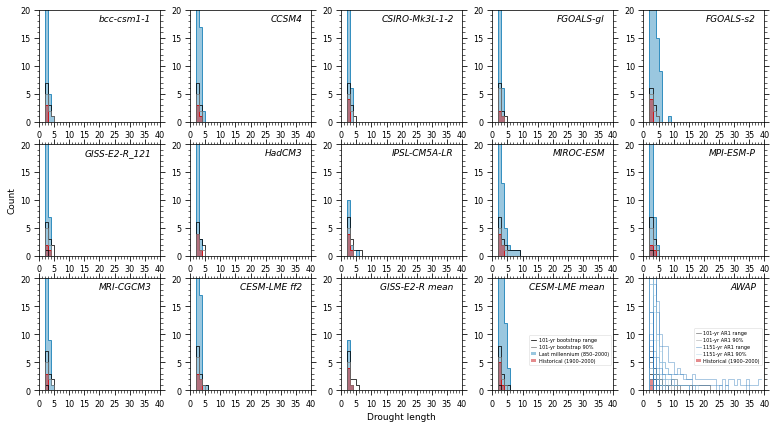

CPU times: user 57.6 s, sys: 128 ms, total: 57.7 s
Wall time: 59.3 s


In [15]:
%%time

# plot histogram of drought lengths for historical
linewidth_border=0.75
mpl.rcParams['axes.linewidth'] = linewidth_border

fig = plt.figure(figsize=(13,7))
plt.subplots_adjust(wspace=0.25)

rows = 2
cols = 7

text_x = 0.93
text_y = 0.885
label_fontsize=9
tick_fontsize=8
histogram_fill_color_hist='#cb181d'
histogram_fill_color_lm='#3690c0'


# ---- data
drought_type = 'droughts_2s2e'

subplot_title = ['bcc-csm1-1', 'CCSM4', 'CSIRO-Mk3L-1-2', 'FGOALS-gl', 'FGOALS-s2', 'GISS-E2-R_121', 'HadCM3', 
                 'IPSL-CM5A-LR', 'MIROC-ESM',   'MPI-ESM-P', 'MRI-CGCM3', 'CESM-LME ff2', 'GISS-E2-R mean', 'CESM-LME mean', 'AWAP']

# NEED TO REPLACE GISS all and FF all lm with hist
# need to bring in awap
data = [bcc_precip_hist_mdb[drought_type].dropna(dim='year').values,
        ccsm4_precip_hist_mdb[drought_type].dropna(dim='year').values,
        csiro_mk3l_precip_hist_mdb[drought_type].dropna(dim='year').values,
        fgoals_gl_precip_hist_mdb[drought_type].dropna(dim='year').values,
        fgoals_s2_precip_hist_mdb[drought_type].dropna(dim='year').values,
        giss_21_precip_hist_mdb[drought_type].dropna(dim='year').values,
        hadcm3_precip_hist_mdb[drought_type].dropna(dim='year').values,
        ipsl_precip_hist_mdb[drought_type].dropna(dim='year').values,
        miroc_precip_hist_mdb[drought_type].dropna(dim='year').values,
        mpi_precip_hist_mdb[drought_type].dropna(dim='year').values,
        mri_precip_hist_mdb[drought_type].dropna(dim='year').values,
        ff2_precip_hist_mdb[drought_type].dropna(dim='year').values,
        awap_masked_annual_mdb[drought_type].dropna(dim='year').values]

data_lm = [bcc_precip_lm_mdb[drought_type].dropna(dim='year').values,
        ccsm4_precip_lm_mdb[drought_type].dropna(dim='year').values,
        csiro_mk3l_precip_lm_mdb[drought_type].dropna(dim='year').values,
        fgoals_gl_precip_lm_mdb[drought_type].dropna(dim='year').values,
        fgoals_s2_precip_lm_mdb[drought_type].dropna(dim='year').values,
        giss_21_precip_lm_mdb[drought_type].dropna(dim='year').values,
        hadcm3_precip_lm_mdb[drought_type].dropna(dim='year').values,
        ipsl_precip_lm_mdb[drought_type].dropna(dim='year').values,
        miroc_precip_lm_mdb[drought_type].dropna(dim='year').values,
        mpi_precip_lm_mdb[drought_type].dropna(dim='year').values,
        mri_precip_lm_mdb[drought_type].dropna(dim='year').values,
        ff2_precip_lm_mdb[drought_type].dropna(dim='year').values]

data_boots = [bcc_boot_mdb[drought_type].dropna(dim='year'), 
              ccsm4_boot_mdb[drought_type].dropna(dim='year'),
              csiro_mk3l_boot_mdb[drought_type].dropna(dim='year'),
              fgoals_gl_boot_mdb[drought_type].dropna(dim='year'),
              fgoals_s2_boot_mdb[drought_type].dropna(dim='year'),
              giss_21_boot_mdb[drought_type].dropna(dim='year'),
              hadcm3_boot_mdb[drought_type].dropna(dim='year'),
              ipsl_boot_mdb[drought_type].dropna(dim='year'),
              miroc_boot_mdb[drought_type].dropna(dim='year'),
              mpi_boot_mdb[drought_type].dropna(dim='year'),
              mri_boot_mdb[drought_type].dropna(dim='year'),
              ff2_boot_mdb[drought_type].dropna(dim='year')]

data_ar1 = [ar1_101_n1[drought_type],
            ar1_101_n075[drought_type],
            ar1_101_n05[drought_type],
            ar1_101_n025[drought_type],
            ar1_101_0[drought_type],
            ar1_101_025[drought_type],
            ar1_101_05[drought_type],
            ar1_101_075[drought_type],
            ar1_101_1[drought_type]]

data_ar1_1151 = [ar1_1151_n1[drought_type],
            ar1_1151_n075[drought_type],
            ar1_1151_n05[drought_type],
            ar1_1151_n025[drought_type],
            ar1_1151_0[drought_type],
            ar1_1151_025[drought_type],
            ar1_1151_05[drought_type],
            ar1_1151_075[drought_type],
            ar1_1151_1[drought_type]]

# set bins
bins = np.arange(0,40,1)

density=False
cumulative=False
log=False
# 
def plot_things(i):
    
#     print(data_boots[i,0])
    if i <= 13:
        count_collection = []
        for j in range(len(data_boots[i][:,0])):
                hist = data_boots[i][j,:].dropna(dim='year').values
#                 ax.hist(hist, bins=bins, alpha=0.01, density=density, color='#bdbdbd')

                count, division = np.histogram(hist, bins=bins) 
                count_collection.append(count)
            
        count_collection = np.array(count_collection)
        mx = np.max(count_collection,0)
        mn = np.min(count_collection,0)
            
        n90 = np.quantile(count_collection, 0.9, axis=0)
        n10 = np.quantile(count_collection, 0.1, axis=0)
        
        # transform into step
        left,right = bins[:-1],bins[1:]
        X = np.array([left,right]).T.flatten()
        
        leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='k', linewidth=0.75, label='101-yr bootstrap range')
        ax.plot(X, np.array([mn,mn]).T.flatten(), color='k', linewidth=0.75)
        leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='grey', linewidth=0.75, label='101-yr bootstrap 90%')
        
    if i <= 13:
        ax.hist(data_lm[i], bins=bins, color=histogram_fill_color_lm, alpha=0.5, density=density,  cumulative=cumulative, log=log, label='Last millennium (850–2000)')
        ax.hist(data_lm[i], bins=bins, histtype='step', color=histogram_fill_color_lm, alpha=1, density=density,  cumulative=cumulative, log=log)
    
    ax.hist(data[i], bins=bins, color=histogram_fill_color_hist, alpha=0.5, density=density, cumulative=cumulative, log=log, label='Historical (1900–2000)')
    ax.hist(data[i], bins=bins, histtype='step', color=histogram_fill_color_hist, alpha=1, density=density,  cumulative=cumulative, log=log)
    
    if i > 13:
        
        for k in range(len(data_ar1)):
            count_collection = []
            for j in range(len(data_ar1[k][0,:])):
                hist = data_ar1[k][j,:].dropna(dim='year').values
                count, division = np.histogram(hist, bins=bins) 
                count_collection.append(count)
            
            count_collection = np.array(count_collection)
            mx = np.max(count_collection,0)
            mn = np.min(count_collection,0)
                
            n90 = np.quantile(count_collection, 0.9, axis=0)
            n10 = np.quantile(count_collection, 0.1, axis=0)
            
            # transform into step
            left,right = bins[:-1],bins[1:]
            X = np.array([left,right]).T.flatten()
            
            leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='k', alpha=0.5, linewidth=0.75)
            ax.plot(X, np.array([mn,mn]).T.flatten(), color='k', alpha=0.5, linewidth=0.75)
            leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='grey', alpha=0.5, linewidth=0.75)

        for l in range(len(data_ar1_1151)):
            count_collection = []
            for m in range(len(data_ar1_1151[l])):
                hist = data_ar1_1151[l][m,:].dropna(dim='year').values
                count, division = np.histogram(hist, bins=bins) 
                count_collection.append(count)
            
            count_collection = np.array(count_collection)
            mx = np.max(count_collection,0)
            mn = np.min(count_collection,0)
                
            n90 = np.quantile(count_collection, 0.9, axis=0)
            n10 = np.quantile(count_collection, 0.1, axis=0)
            
            # transform into step
            left,right = bins[:-1],bins[1:]
            X = np.array([left,right]).T.flatten()
            
            leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='#2171b5', alpha=0.5, linewidth=0.75)
            ax.plot(X, np.array([mn,mn]).T.flatten(), color='#2171b5', alpha=0.5, linewidth=0.75)
            leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='#9ecae1', alpha=0.5, linewidth=0.75)

            
    
    
    # xaxis
    plt.xlim(0,40)
    plt.xticks(np.arange(0, 45, 5), fontsize=tick_fontsize)
    xticks_minor_spacing = np.arange(0, 41, 1)
    ax.set_xticks(xticks_minor_spacing, minor=True)
    
    # yaxis
    plt.ylim(0,20)
    plt.yticks(np.arange(0, 25, 5), fontsize=tick_fontsize)
    yticks_minor_spacing = np.arange(0, 21, 1)
    ax.set_yticks(yticks_minor_spacing, minor=True)

#     plt.ylim(0,0.5)
#     plt.yticks(np.arange(0, 0.6, 0.1), fontsize=tick_fontsize)
#     yticks_minor_spacing = np.arange(0, 0.5, 0.05)
#     ax.set_yticks(yticks_minor_spacing, minor=True)
    
    # other things
    plt.tick_params(which = 'major', length=5)
    plt.tick_params(which = 'minor', length=2.5)
    
    if i == 5:
#         plt.xlabel("Drought length", fontsize=label_fontsize)  
        plt.ylabel("Count", fontsize=label_fontsize)
    elif i == 12:
        plt.xlabel("Drought length", fontsize=label_fontsize)  
    
    if i >= 5:
        ax.xaxis.set_ticks_position('both')
    
    if i != 4 or i != 9 or i != 14:
        ax.yaxis.set_ticks_position('both')
    
    title = ax.text(text_x, text_y, subplot_title[i], transform=ax.transAxes, 
                    horizontalalignment='right', verticalalignment='bottom', 
                    fontweight='normal', fontstyle='oblique', fontsize=label_fontsize)
    

    if i == 13:
#         leg_bmx, = ax.plot([0, 1],[0, 0], color='k', linewidth=0.75, label='101-yr bootstrap range')
#         leg_bn90, = ax.plot([0, 1],[0, 0], color='grey', linewidth=0.75, label='101-yr bootstrap 90%')
    
#         legend_elements=[(leg_hist, leg_hist_line), (leg_lm, leg_lm_line), leg_bmx, leg_bn90]
#         names = ['Historical (1900–2000)',
#          'Last millennium (850–2000)',
#          '101-yr bootstrap range',         
#          '101-yr bootstrap 90th percentile']
        leg = ax.legend(fontsize=5, 
                handlelength=1, handletextpad=0.5,  loc='lower right', 
                labelspacing=0.4, 
               bbox_to_anchor=(1,0.2))
        leg.get_frame().set_linewidth(0.5)
    if i == 14:
        leg_bmx, = ax.plot([0, -1],[0, 0], color='k', alpha=0.5, linewidth=0.75, label='101-yr AR1 range')
        leg_bn90, = ax.plot([0, -1],[0, 0], color='grey', alpha=0.5, linewidth=0.75, label='101-yr AR1 90%')
        leg_bmx, = ax.plot([0, -1],[0, 0], color='#2171b5', alpha=0.5, linewidth=0.75, label='1151-yr AR1 range')
        leg_bn90, = ax.plot([0, -1],[0, 0], color='#9ecae1', alpha=0.5, linewidth=0.75, label='1151-yr AR1 90%')

        leg = ax.legend(fontsize=5, 
                handlelength=1, handletextpad=0.5,  loc='lower right', 
                labelspacing=0.4, 
               bbox_to_anchor=(1,0.2))
        leg.get_frame().set_linewidth(0.5)        

# --- start plotting

for i in range(len(data)):
    ax=plt.subplot(rows, cols, i + 1)
    plot_things(i)
    
    

plt.savefig('%s/MDB_%s_distribution.pdf' % (input_dir, drought_type), dpi=300, bbox_inches='tight')
plt.savefig('%s/MDB_%s_distribution.png' % (input_dir, drought_type), dpi=300, bbox_inches='tight')
plt.show()

# more AR1s

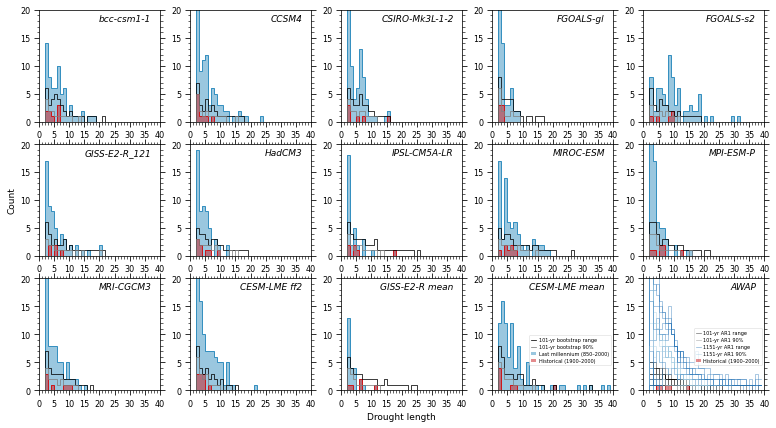

In [16]:

# plot histogram of drought lengths for historical
linewidth_border=0.75
mpl.rcParams['axes.linewidth'] = linewidth_border

fig = plt.figure(figsize=(13,7))
plt.subplots_adjust(wspace=0.25)

rows = 3
cols = 5

text_x = 0.93
text_y = 0.885
label_fontsize=9
tick_fontsize=8
histogram_fill_color_hist='#cb181d'
histogram_fill_color_lm='#3690c0'


# ---- data
drought_type = 'droughts_120pc_2med'

subplot_title = ['bcc-csm1-1', 'CCSM4', 'CSIRO-Mk3L-1-2', 'FGOALS-gl', 'FGOALS-s2', 'GISS-E2-R_121', 'HadCM3', 
                 'IPSL-CM5A-LR', 'MIROC-ESM',   'MPI-ESM-P', 'MRI-CGCM3', 'CESM-LME ff2', 'GISS-E2-R mean', 'CESM-LME mean', 'AWAP']

# NEED TO REPLACE GISS all and FF all lm with hist
# need to bring in awap
data = [bcc_precip_hist_southern_aus[drought_type].dropna(dim='year').values,
        ccsm4_precip_hist_southern_aus[drought_type].dropna(dim='year').values,
        csiro_mk3l_precip_hist_southern_aus[drought_type].values,
        fgoals_gl_precip_hist_southern_aus[drought_type].values,
        fgoals_s2_precip_hist_southern_aus[drought_type].values,
        giss_21_precip_hist_southern_aus[drought_type].values,
        hadcm3_precip_hist_southern_aus[drought_type].values,
        ipsl_precip_hist_southern_aus[drought_type].values,
        miroc_precip_hist_southern_aus[drought_type].values,
        mpi_precip_hist_southern_aus[drought_type].values,
        mri_precip_hist_southern_aus[drought_type].values,
        ff2_precip_hist_southern_aus[drought_type].values,
        giss_all_precip_hist_southern_aus[drought_type].values,
        ff_all_precip_hist_southern_aus[drought_type].values,
        awap_masked_annual_southern_aus[drought_type].values]

data_lm = [bcc_precip_lm_southern_aus[drought_type].dropna(dim='year').values,
        ccsm4_precip_lm_southern_aus[drought_type].dropna(dim='year').values,
        csiro_mk3l_precip_lm_southern_aus[drought_type].values,
        fgoals_gl_precip_lm_southern_aus[drought_type].values,
        fgoals_s2_precip_lm_southern_aus[drought_type].values,
        giss_21_precip_lm_southern_aus[drought_type].values,
        hadcm3_precip_lm_southern_aus[drought_type].values,
        ipsl_precip_lm_southern_aus[drought_type].values,
        miroc_precip_lm_southern_aus[drought_type].values,
        mpi_precip_lm_southern_aus[drought_type].values,
        mri_precip_lm_southern_aus[drought_type].values,
        ff2_precip_lm_southern_aus[drought_type].values,
        giss_all_precip_lm_southern_aus[drought_type].values,
        ff_all_precip_lm_southern_aus[drought_type].values]

data_boots = [bcc_boot_southern_aus[drought_type], 
              ccsm4_boot_southern_aus[drought_type],
              csiro_mk3l_boot_southern_aus[drought_type],
              fgoals_gl_boot_southern_aus[drought_type],
              fgoals_s2_boot_southern_aus[drought_type],
              giss_21_boot_southern_aus[drought_type],
              hadcm3_boot_southern_aus[drought_type],
              ipsl_boot_southern_aus[drought_type],
              miroc_boot_southern_aus[drought_type],
              mpi_boot_southern_aus[drought_type],
              mri_boot_southern_aus[drought_type],
              ff2_boot_southern_aus[drought_type],
              giss_all_boot_southern_aus[drought_type],
              ff_all_boot_southern_aus[drought_type]]

data_ar1 = [ar1_101_n1[drought_type],
            ar1_101_n075[drought_type],
            ar1_101_n05[drought_type],
            ar1_101_n025[drought_type],
            ar1_101_0[drought_type],
            ar1_101_025[drought_type],
            ar1_101_05[drought_type],
            ar1_101_075[drought_type],
            ar1_101_1[drought_type]]

data_ar1_1151 = [ar1_1151_n1[drought_type],
            ar1_1151_n075[drought_type],
            ar1_1151_n05[drought_type],
            ar1_1151_n025[drought_type],
            ar1_1151_0[drought_type],
            ar1_1151_025[drought_type],
            ar1_1151_05[drought_type],
            ar1_1151_075[drought_type],
            ar1_1151_1[drought_type]]

# set bins
bins = np.arange(0,40,1)

density=False
cumulative=False
log=False
# 
def plot_things(i):
    
#     print(data_boots[i,0])
    if i <= 13:
        count_collection = []
        for j in range(len(data_boots[i][:,0])):
                hist = data_boots[i][j,:].dropna(dim='year').values
#                 ax.hist(hist, bins=bins, alpha=0.01, density=density, color='#bdbdbd')

                count, division = np.histogram(hist, bins=bins) 
                count_collection.append(count)
            
        count_collection = np.array(count_collection)
        mx = np.max(count_collection,0)
        mn = np.min(count_collection,0)
            
        n90 = np.quantile(count_collection, 0.9, axis=0)
        n10 = np.quantile(count_collection, 0.1, axis=0)
        
        # transform into step
        left,right = bins[:-1],bins[1:]
        X = np.array([left,right]).T.flatten()
        
        leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='k', linewidth=0.75, label='101-yr bootstrap range')
        ax.plot(X, np.array([mn,mn]).T.flatten(), color='k', linewidth=0.75)
        leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='grey', linewidth=0.75, label='101-yr bootstrap 90%')
        
    if i <= 13:
        ax.hist(data_lm[i], bins=bins, color=histogram_fill_color_lm, alpha=0.5, density=density,  cumulative=cumulative, log=log, label='Last millennium (850–2000)')
        ax.hist(data_lm[i], bins=bins, histtype='step', color=histogram_fill_color_lm, alpha=1, density=density,  cumulative=cumulative, log=log)
    
    ax.hist(data[i], bins=bins, color=histogram_fill_color_hist, alpha=0.5, density=density, cumulative=cumulative, log=log, label='Historical (1900–2000)')
    ax.hist(data[i], bins=bins, histtype='step', color=histogram_fill_color_hist, alpha=1, density=density,  cumulative=cumulative, log=log)
    
    if i > 13:
        
        for k in range(len(data_ar1)):
            count_collection = []
            for j in range(len(data_ar1[k][0,:])):
                hist = data_ar1[k][j,:].dropna(dim='year').values
                count, division = np.histogram(hist, bins=bins) 
                count_collection.append(count)
            
            count_collection = np.array(count_collection)
            mx = np.max(count_collection,0)
            mn = np.min(count_collection,0)
                
            n90 = np.quantile(count_collection, 0.9, axis=0)
            n10 = np.quantile(count_collection, 0.1, axis=0)
            
            # transform into step
            left,right = bins[:-1],bins[1:]
            X = np.array([left,right]).T.flatten()
            
            leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='k', alpha=0.5, linewidth=0.75)
            ax.plot(X, np.array([mn,mn]).T.flatten(), color='k', alpha=0.5, linewidth=0.75)
            leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='grey', alpha=0.5, linewidth=0.75)

        for l in range(len(data_ar1_1151)):
            count_collection = []
            for m in range(len(data_ar1_1151[l])):
                hist = data_ar1_1151[l][m,:].dropna(dim='year').values
                count, division = np.histogram(hist, bins=bins) 
                count_collection.append(count)
            
            count_collection = np.array(count_collection)
            mx = np.max(count_collection,0)
            mn = np.min(count_collection,0)
                
            n90 = np.quantile(count_collection, 0.9, axis=0)
            n10 = np.quantile(count_collection, 0.1, axis=0)
            
            # transform into step
            left,right = bins[:-1],bins[1:]
            X = np.array([left,right]).T.flatten()
            
            leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='#2171b5', alpha=0.5, linewidth=0.75)
            ax.plot(X, np.array([mn,mn]).T.flatten(), color='#2171b5', alpha=0.5, linewidth=0.75)
            leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='#9ecae1', alpha=0.5, linewidth=0.75)

            
    
    
    # xaxis
    plt.xlim(0,40)
    plt.xticks(np.arange(0, 45, 5), fontsize=tick_fontsize)
    xticks_minor_spacing = np.arange(0, 41, 1)
    ax.set_xticks(xticks_minor_spacing, minor=True)
    
    # yaxis
    plt.ylim(0,20)
    plt.yticks(np.arange(0, 25, 5), fontsize=tick_fontsize)
    yticks_minor_spacing = np.arange(0, 21, 1)
    ax.set_yticks(yticks_minor_spacing, minor=True)

#     plt.ylim(0,0.5)
#     plt.yticks(np.arange(0, 0.6, 0.1), fontsize=tick_fontsize)
#     yticks_minor_spacing = np.arange(0, 0.5, 0.05)
#     ax.set_yticks(yticks_minor_spacing, minor=True)
    
    # other things
    plt.tick_params(which = 'major', length=5)
    plt.tick_params(which = 'minor', length=2.5)
    
    if i == 5:
#         plt.xlabel("Drought length", fontsize=label_fontsize)  
        plt.ylabel("Count", fontsize=label_fontsize)
    elif i == 12:
        plt.xlabel("Drought length", fontsize=label_fontsize)  
    
    if i >= 5:
        ax.xaxis.set_ticks_position('both')
    
    if i != 4 or i != 9 or i != 14:
        ax.yaxis.set_ticks_position('both')
    
    title = ax.text(text_x, text_y, subplot_title[i], transform=ax.transAxes, 
                    horizontalalignment='right', verticalalignment='bottom', 
                    fontweight='normal', fontstyle='oblique', fontsize=label_fontsize)
    

    if i == 13:
#         leg_bmx, = ax.plot([0, 1],[0, 0], color='k', linewidth=0.75, label='101-yr bootstrap range')
#         leg_bn90, = ax.plot([0, 1],[0, 0], color='grey', linewidth=0.75, label='101-yr bootstrap 90%')
    
#         legend_elements=[(leg_hist, leg_hist_line), (leg_lm, leg_lm_line), leg_bmx, leg_bn90]
#         names = ['Historical (1900–2000)',
#          'Last millennium (850–2000)',
#          '101-yr bootstrap range',         
#          '101-yr bootstrap 90th percentile']
        leg = ax.legend(fontsize=5, 
                handlelength=1, handletextpad=0.5,  loc='lower right', 
                labelspacing=0.4, 
               bbox_to_anchor=(1,0.2))
        leg.get_frame().set_linewidth(0.5)
    if i == 14:
        leg_bmx, = ax.plot([0, -1],[0, 0], color='k', alpha=0.5, linewidth=0.75, label='101-yr AR1 range')
        leg_bn90, = ax.plot([0, -1],[0, 0], color='grey', alpha=0.5, linewidth=0.75, label='101-yr AR1 90%')
        leg_bmx, = ax.plot([0, -1],[0, 0], color='#2171b5', alpha=0.5, linewidth=0.75, label='1151-yr AR1 range')
        leg_bn90, = ax.plot([0, -1],[0, 0], color='#9ecae1', alpha=0.5, linewidth=0.75, label='1151-yr AR1 90%')

        leg = ax.legend(fontsize=5, 
                handlelength=1, handletextpad=0.5,  loc='lower right', 
                labelspacing=0.4, 
               bbox_to_anchor=(1,0.2))
        leg.get_frame().set_linewidth(0.5)        

# --- start plotting

for i in range(len(data)):
    ax=plt.subplot(rows, cols, i + 1)
    plot_things(i)
    
    

plt.savefig('%s/SouthernAustralia_%s_hist.pdf' % (input_dir, drought_type), dpi=300, bbox_inches='tight')
plt.savefig('%s/SouthernAustralia_%s_hist.png' % (input_dir, drought_type), dpi=300, bbox_inches='tight')
plt.show()

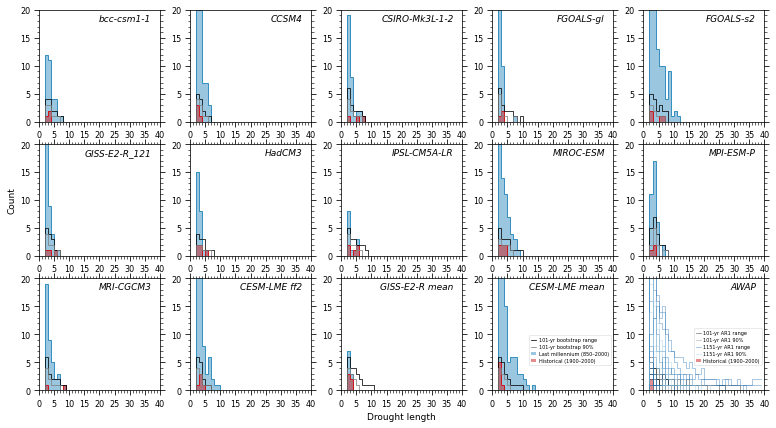

In [17]:
# plot histogram of drought lengths for historical
linewidth_border=0.75
mpl.rcParams['axes.linewidth'] = linewidth_border

fig = plt.figure(figsize=(13,7))
plt.subplots_adjust(wspace=0.25)

rows = 3
cols = 5

text_x = 0.93
text_y = 0.885
label_fontsize=9
tick_fontsize=8
histogram_fill_color_hist='#cb181d'
histogram_fill_color_lm='#3690c0'


# ---- data
drought_type = 'droughts_220pc_1med'

subplot_title = ['bcc-csm1-1', 'CCSM4', 'CSIRO-Mk3L-1-2', 'FGOALS-gl', 'FGOALS-s2', 'GISS-E2-R_121', 'HadCM3', 
                 'IPSL-CM5A-LR', 'MIROC-ESM',   'MPI-ESM-P', 'MRI-CGCM3', 'CESM-LME ff2', 'GISS-E2-R mean', 'CESM-LME mean', 'AWAP']

# NEED TO REPLACE GISS all and FF all lm with hist
# need to bring in awap
data = [bcc_precip_hist_southern_aus[drought_type].dropna(dim='year').values,
        ccsm4_precip_hist_southern_aus[drought_type].dropna(dim='year').values,
        csiro_mk3l_precip_hist_southern_aus[drought_type].values,
        fgoals_gl_precip_hist_southern_aus[drought_type].values,
        fgoals_s2_precip_hist_southern_aus[drought_type].values,
        giss_21_precip_hist_southern_aus[drought_type].values,
        hadcm3_precip_hist_southern_aus[drought_type].values,
        ipsl_precip_hist_southern_aus[drought_type].values,
        miroc_precip_hist_southern_aus[drought_type].values,
        mpi_precip_hist_southern_aus[drought_type].values,
        mri_precip_hist_southern_aus[drought_type].values,
        ff2_precip_hist_southern_aus[drought_type].values,
        giss_all_precip_hist_southern_aus[drought_type].values,
        ff_all_precip_hist_southern_aus[drought_type].values,
        awap_masked_annual_southern_aus[drought_type].values]

data_lm = [bcc_precip_lm_southern_aus[drought_type].dropna(dim='year').values,
        ccsm4_precip_lm_southern_aus[drought_type].dropna(dim='year').values,
        csiro_mk3l_precip_lm_southern_aus[drought_type].values,
        fgoals_gl_precip_lm_southern_aus[drought_type].values,
        fgoals_s2_precip_lm_southern_aus[drought_type].values,
        giss_21_precip_lm_southern_aus[drought_type].values,
        hadcm3_precip_lm_southern_aus[drought_type].values,
        ipsl_precip_lm_southern_aus[drought_type].values,
        miroc_precip_lm_southern_aus[drought_type].values,
        mpi_precip_lm_southern_aus[drought_type].values,
        mri_precip_lm_southern_aus[drought_type].values,
        ff2_precip_lm_southern_aus[drought_type].values,
        giss_all_precip_lm_southern_aus[drought_type].values,
        ff_all_precip_lm_southern_aus[drought_type].values]

data_boots = [bcc_boot_southern_aus[drought_type], 
              ccsm4_boot_southern_aus[drought_type],
              csiro_mk3l_boot_southern_aus[drought_type],
              fgoals_gl_boot_southern_aus[drought_type],
              fgoals_s2_boot_southern_aus[drought_type],
              giss_21_boot_southern_aus[drought_type],
              hadcm3_boot_southern_aus[drought_type],
              ipsl_boot_southern_aus[drought_type],
              miroc_boot_southern_aus[drought_type],
              mpi_boot_southern_aus[drought_type],
              mri_boot_southern_aus[drought_type],
              ff2_boot_southern_aus[drought_type],
              giss_all_boot_southern_aus[drought_type],
              ff_all_boot_southern_aus[drought_type]]

data_ar1 = [ar1_101_n1[drought_type],
            ar1_101_n075[drought_type],
            ar1_101_n05[drought_type],
            ar1_101_n025[drought_type],
            ar1_101_0[drought_type],
            ar1_101_025[drought_type],
            ar1_101_05[drought_type],
            ar1_101_075[drought_type],
            ar1_101_1[drought_type]]

data_ar1_1151 = [ar1_1151_n1[drought_type],
            ar1_1151_n075[drought_type],
            ar1_1151_n05[drought_type],
            ar1_1151_n025[drought_type],
            ar1_1151_0[drought_type],
            ar1_1151_025[drought_type],
            ar1_1151_05[drought_type],
            ar1_1151_075[drought_type],
            ar1_1151_1[drought_type]]

# set bins
bins = np.arange(0,40,1)

density=False
cumulative=False
log=False
# 
def plot_things(i):
    
#     print(data_boots[i,0])
    if i <= 13:
        count_collection = []
        for j in range(len(data_boots[i][:,0])):
                hist = data_boots[i][j,:].dropna(dim='year').values
#                 ax.hist(hist, bins=bins, alpha=0.01, density=density, color='#bdbdbd')

                count, division = np.histogram(hist, bins=bins) 
                count_collection.append(count)
            
        count_collection = np.array(count_collection)
        mx = np.max(count_collection,0)
        mn = np.min(count_collection,0)
            
        n90 = np.quantile(count_collection, 0.9, axis=0)
        n10 = np.quantile(count_collection, 0.1, axis=0)
        
        # transform into step
        left,right = bins[:-1],bins[1:]
        X = np.array([left,right]).T.flatten()
        
        leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='k', linewidth=0.75, label='101-yr bootstrap range')
        ax.plot(X, np.array([mn,mn]).T.flatten(), color='k', linewidth=0.75)
        leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='grey', linewidth=0.75, label='101-yr bootstrap 90%')
        
    if i <= 13:
        ax.hist(data_lm[i], bins=bins, color=histogram_fill_color_lm, alpha=0.5, density=density,  cumulative=cumulative, log=log, label='Last millennium (850–2000)')
        ax.hist(data_lm[i], bins=bins, histtype='step', color=histogram_fill_color_lm, alpha=1, density=density,  cumulative=cumulative, log=log)
    
    ax.hist(data[i], bins=bins, color=histogram_fill_color_hist, alpha=0.5, density=density, cumulative=cumulative, log=log, label='Historical (1900–2000)')
    ax.hist(data[i], bins=bins, histtype='step', color=histogram_fill_color_hist, alpha=1, density=density,  cumulative=cumulative, log=log)
    
    if i > 13:
        
        for k in range(len(data_ar1)):
            count_collection = []
            for j in range(len(data_ar1[k][0,:])):
                hist = data_ar1[k][j,:].dropna(dim='year').values
                count, division = np.histogram(hist, bins=bins) 
                count_collection.append(count)
            
            count_collection = np.array(count_collection)
            mx = np.max(count_collection,0)
            mn = np.min(count_collection,0)
                
            n90 = np.quantile(count_collection, 0.9, axis=0)
            n10 = np.quantile(count_collection, 0.1, axis=0)
            
            # transform into step
            left,right = bins[:-1],bins[1:]
            X = np.array([left,right]).T.flatten()
            
            leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='k', alpha=0.5, linewidth=0.75)
            ax.plot(X, np.array([mn,mn]).T.flatten(), color='k', alpha=0.5, linewidth=0.75)
            leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='grey', alpha=0.5, linewidth=0.75)

        for l in range(len(data_ar1_1151)):
            count_collection = []
            for m in range(len(data_ar1_1151[l])):
                hist = data_ar1_1151[l][m,:].dropna(dim='year').values
                count, division = np.histogram(hist, bins=bins) 
                count_collection.append(count)
            
            count_collection = np.array(count_collection)
            mx = np.max(count_collection,0)
            mn = np.min(count_collection,0)
                
            n90 = np.quantile(count_collection, 0.9, axis=0)
            n10 = np.quantile(count_collection, 0.1, axis=0)
            
            # transform into step
            left,right = bins[:-1],bins[1:]
            X = np.array([left,right]).T.flatten()
            
            leg_bmx, = ax.plot(X, np.array([mx,mx]).T.flatten(), color='#2171b5', alpha=0.5, linewidth=0.75)
            ax.plot(X, np.array([mn,mn]).T.flatten(), color='#2171b5', alpha=0.5, linewidth=0.75)
            leg_bn90, = ax.plot(X, np.array([n90, n90]).T.flatten(), color='#9ecae1', alpha=0.5, linewidth=0.75)

            
    
    
    # xaxis
    plt.xlim(0,40)
    plt.xticks(np.arange(0, 45, 5), fontsize=tick_fontsize)
    xticks_minor_spacing = np.arange(0, 41, 1)
    ax.set_xticks(xticks_minor_spacing, minor=True)
    
    # yaxis
    plt.ylim(0,20)
    plt.yticks(np.arange(0, 25, 5), fontsize=tick_fontsize)
    yticks_minor_spacing = np.arange(0, 21, 1)
    ax.set_yticks(yticks_minor_spacing, minor=True)

#     plt.ylim(0,0.5)
#     plt.yticks(np.arange(0, 0.6, 0.1), fontsize=tick_fontsize)
#     yticks_minor_spacing = np.arange(0, 0.5, 0.05)
#     ax.set_yticks(yticks_minor_spacing, minor=True)
    
    # other things
    plt.tick_params(which = 'major', length=5)
    plt.tick_params(which = 'minor', length=2.5)
    
    if i == 5:
#         plt.xlabel("Drought length", fontsize=label_fontsize)  
        plt.ylabel("Count", fontsize=label_fontsize)
    elif i == 12:
        plt.xlabel("Drought length", fontsize=label_fontsize)  
    
    if i >= 5:
        ax.xaxis.set_ticks_position('both')
    
    if i != 4 or i != 9 or i != 14:
        ax.yaxis.set_ticks_position('both')
    
    title = ax.text(text_x, text_y, subplot_title[i], transform=ax.transAxes, 
                    horizontalalignment='right', verticalalignment='bottom', 
                    fontweight='normal', fontstyle='oblique', fontsize=label_fontsize)
    

    if i == 13:
#         leg_bmx, = ax.plot([0, 1],[0, 0], color='k', linewidth=0.75, label='101-yr bootstrap range')
#         leg_bn90, = ax.plot([0, 1],[0, 0], color='grey', linewidth=0.75, label='101-yr bootstrap 90%')
    
#         legend_elements=[(leg_hist, leg_hist_line), (leg_lm, leg_lm_line), leg_bmx, leg_bn90]
#         names = ['Historical (1900–2000)',
#          'Last millennium (850–2000)',
#          '101-yr bootstrap range',         
#          '101-yr bootstrap 90th percentile']
        leg = ax.legend(fontsize=5, 
                handlelength=1, handletextpad=0.5,  loc='lower right', 
                labelspacing=0.4, 
               bbox_to_anchor=(1,0.2))
        leg.get_frame().set_linewidth(0.5)
    if i == 14:
        leg_bmx, = ax.plot([0, -1],[0, 0], color='k', alpha=0.5, linewidth=0.75, label='101-yr AR1 range')
        leg_bn90, = ax.plot([0, -1],[0, 0], color='grey', alpha=0.5, linewidth=0.75, label='101-yr AR1 90%')
        leg_bmx, = ax.plot([0, -1],[0, 0], color='#2171b5', alpha=0.5, linewidth=0.75, label='1151-yr AR1 range')
        leg_bn90, = ax.plot([0, -1],[0, 0], color='#9ecae1', alpha=0.5, linewidth=0.75, label='1151-yr AR1 90%')

        leg = ax.legend(fontsize=5, 
                handlelength=1, handletextpad=0.5,  loc='lower right', 
                labelspacing=0.4, 
               bbox_to_anchor=(1,0.2))
        leg.get_frame().set_linewidth(0.5)        

# --- start plotting

for i in range(len(data)):
    ax=plt.subplot(rows, cols, i + 1)
    plot_things(i)
    
    

plt.savefig('%s/SouthernAustralia_%s_hist.pdf' % (input_dir, drought_type), dpi=300, bbox_inches='tight')
plt.savefig('%s/SouthernAustralia_%s_hist.png' % (input_dir, drought_type), dpi=300, bbox_inches='tight')
plt.show()